# Τεχνητή Νοημοσύνη: Εργαστηριακή Άσκηση 3
Στην άσκηση αυτή θα υλοποιηθούν διάφοροι (σχετικά απλοί) αλγόριθμοι μηχανικής μάθησης για την αυτόματη αναγνώριση μεταξύ 3 μουσικών είδών απο τα δεδομένα που προσφέρει η υπηρεσία Spotify. Συγκεκριμένα, θα δίνονται δύο σύνολα δεδομένων $$Ζ_{train}=\{(x_1,y_1),\dots,(x_n,y_n)\}$$ $$Z_{test} = \{(x_j,y_j),\dots{,(x_k,y_k)}\}$$ όπου κάθε $x_i\in{\mathbb{R}^p}$ είναι ένα διάνυσμα με τα μουσικά χαρακτηριστικά κάθε κομματιού (όπως dancability, acousticness κ.α.) και $y_i$ είναι το είδος του κομματιού - ένας ακέραιος στο $[0,2]$. Σε κάθε περίπτωση καλείστε να σχεδιάσετε έναν ταξινομητή, δηλαδή μια απεικόνιση $$f:\mathbb{R}^p\rightarrow{[0,2]}$$

In [ ]:
from sklearn.model_selection import train_test_split
!pip install texttable &> /dev/null
from texttable import Texttable

# 1ο Μέρος: Αξιολόγηση
Στο πρώτο μέρος της άσκησης θα υλοποιηθούν συναρτήσεις που θα χρησιμοποιηθούν για την αξιολόγηση των ταξινομητών που θα χρησιμοποιηθούν στα επόμενα μέρη.

Παρακάτω σας δίνεται η κλάση Evaluate, η οποία υπολογίζει διάφορες μετρικές με τη μέθοδο get_metrics, εντοπίζει αντικείμενα που ταξινομήθηκαν λάθος και τα εμφανίζει (μέθοδος get_sample_of_wrong), και υπολογίζει τον πίνακα σύγχυσης (confusion matrix) όπου οπτικοποιούνται ανά κατηγορία οι προβλέψεις του ταξινομητή.

Για το μέρος αυτό καλείστε να υλοποιήσετε στη μέθοδο my_accuracy τη μετρική accuracy, η οποία ορίζεται ως:
$$accuracy = \frac{\#σωστών\_προβλέψεων}{\#δεδομένων}$$



In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from matplotlib import pyplot as plt
import numpy as np
import random

class Evaluate:
    def __init__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred

    def my_accuracy(self):
      y_true = np.array(self.y_true)              # convert lists to nnumpy arrays
      y_pred = np.array(self.y_pred)

      ##################
      ## Your code below
      #acc=1
      acc=np.sum(y_pred==y_true)/len(y_true)      # calaculate accuracy
      ## Your code above
      ##################
      return acc

    def get_metrics(self):
        precision = precision_score(self.y_true, self.y_pred, average = "macro")
        recall = recall_score(self.y_true, self.y_pred, average = "macro")
        f1 = f1_score(self.y_true, self.y_pred, average = "macro")
        results = {"precision": precision, "recall": recall, "f1": f1, "accuracy": self.my_accuracy()}
        return results

    def confusion_matrix(self):
        cm = confusion_matrix(self.y_true, self.y_pred)
        return cm

    def get_evaluation_report(self):
        metrics = self.get_metrics()
        for m in metrics:
            print(m + ': ' + str(metrics[m]))
        cm = self.confusion_matrix()
        print("Confusion matrix: ")
        print(cm)

Παράδειγμα χρήσης της κλάσης. Κανονικά στο x θα υπάρχουν τα δεδομένα από το dataset

In [ ]:
y_true = [1, 0, 1, 0, 0, 1, 1, 0]
y_pred = [1, 0, 1, 0, 1, 1, 0, 0]

eval = Evaluate(y_true, y_pred)
eval.get_evaluation_report()

precision: 0.75
recall: 0.75
f1: 0.75
accuracy: 0.75
Confusion matrix: 
[[3 1]
 [1 3]]


# Dataset

To dataset που σας δίνεται περιέχει πληθώρα μουσικών κομματιών για τα οποία έχουν καταγραφεί διάφορα χαρακτηριστικά τους, όπως επίσης και το μουσικό είδος στο οποίο ανήκουν. Στη συγκεκριμένη άσκηση θα δουλέψουμε με ένα υποσύνολο (αριθμητικών) χαρακτηριστικών, τα οποία συνεισφέρουν στον καθορισμό της μουσικής κατηγορίας κάθε κομματιού.  

Τα χαρακτηριστικά τα οποία θα μελετήσουμε στην παρούσα άσκηση είναι τα "acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness", ενώ οι κατηγορίες στις οποίες καλούμαστε να ταξινομήσουμε τα μουσικά κομμάτια είναι οι "Electronic", "Rock", και "Rap".  


In [ ]:
# Σύνδεση του Google Colab με το Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Θα χρησιμοποιήσουμε τα DataFrames της βιβλιοθήκης pandas για να χειριστούμε τα δεδομένα μας. Μπορείτε να βρείτε περισσότερες πληροφορίες για τα pandas DataFrames στο αντίστοιχο [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).

In [ ]:
import pandas as pd
from tqdm.notebook import tqdm

In [ ]:
# read data in the form of pandas DataFrame
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/artificial_intelligence/third/music_df_processed.csv")

# print the first 5 values of the DataFrame using .head() command
data.head()

instance_id           artist_name  ... valence  music_genre
0      32894.0              Röyksopp  ...   0.759   Electronic
1      46652.0  Thievery Corporation  ...   0.531   Electronic
2      30097.0        Dillon Francis  ...   0.333   Electronic
3      62177.0              Dubloadz  ...   0.270   Electronic
4      24907.0           What So Not  ...   0.323   Electronic

[5 rows x 18 columns]

In [ ]:
# What can we see here?
data.describe()

instance_id    popularity  ...         tempo       valence
count  45020.000000  45020.000000  ...  45020.000000  45020.000000
mean   55884.691892     44.263327  ...    119.952961      0.456394
std    20728.197040     15.553972  ...     30.641701      0.247161
min    20002.000000      0.000000  ...     34.347000      0.000000
25%    38000.750000     34.000000  ...     94.941500      0.257000
50%    55857.500000     45.000000  ...    119.879000      0.448000
75%    73856.500000     56.000000  ...    140.471250      0.648000
max    91759.000000     99.000000  ...    220.276000      0.992000

[8 rows x 12 columns]

## Επιλογή χαρακτηριστικών x και στόχων y.  

Για λόγους απλότητας επιλέγουμε τα χαρακτηριστικά (inputs) και τις κατηγορίες-στόχους (genres). Καλείστε να διαχωρίσετε τα δεδομένα σε train/test set. Ας θεωρήσουμε το διαχωρισμό 30% - test set, 70% - train set.

In [ ]:
# χαρακτηριστικά
inputs = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness"]

# κατηγορίες-στόχοι
output = "music_genre"
genres = ["Electronic", "Rock", "Rap"]

# φιλτράρουμε το DataFrame ώστε να διατηρήσουμε μόνο τις 3 κατηγορίες που μας ενδιαφέρουν.
data = data[data[output].isin(genres)]

# dictionary to map genre to label id
genres_to_id = {genre: i for i, genre in enumerate(genres)}

# εδώ πρέπει να διαχωρίσετε τα δεδομένα σε train (70% των δεδομένων)/test set (30% των δεδομένων)
# ονομάστε τις μεταβλητές ως εξής:
# τα χαρακτηριστικά του train set: x_train
# τις κατηγορίες-στόχους του train set: y_train
# τα χαρακτηριστικά του test set: x_test
# τις κατηγορίες-στόχους του test set: y_test
x_test, y_test, x_train, y_train = [], [], [], []
##################
## Your code below

data_reduced=data[inputs+["music_genre"]]      # keep only features and labels

data_numpy=data_reduced.to_numpy()             # convert dataframe to numpy
y=data_numpy[:,-1]                             # last column is labels
X = np.delete(data_numpy, -1, axis=1)          # features are all except last column
y=np.array([genres_to_id[i] for i in y])       # convert words of label to indexes


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)    # split randomly to train and test



## Your code above
##################

## Μορφή των δεδομένων  

Βεβαιωθείτε ότι τα δεδομένα σας έχουν τη σωστή μορφή εκτυπώνοντας τον αριθμό γραμμών και στηλών για τα x_test, y_test, x_train, y_train.

In [ ]:
# Shape of x_test, y_test, x_train, y_train

##################
## Your code below


print('Size of train feature array:', x_train.shape)
print('Size of train labels:', y_train.shape)
print('Size of test feature array:', x_test.shape)
print('Size of test labels:', y_test.shape)

## Your code above
##################

Size of train feature array: (9471, 6)
Size of train labels: (9471,)
Size of test feature array: (4060, 6)
Size of test labels: (4060,)


Αναφορικά με τις τιμές των χαρακτηριστικών, είναι σημαντικό να γνωρίζουμε το εύρος τους, δηλαδή τη μέγιστη και την ελάχιστη τιμή που λαμβάνει το κάθε χαρακτηριστικό. Εξερευνήστε το εύρος του κάθε χαρακτηριστικού στα train και test set.

In [ ]:
# Range of x_train, x_test columns

##################
## Your code below

print("____________________Train data:_______________________ ")
print()

t = Texttable()                                        # initialize table
columns=[['Feature','Max value', 'Min value']]         # column names
rows=inputs                                            # row names
for i in range(0,len(rows)):
  columns.append([rows[i],np.max(x_train,axis=0)[i],np.min(x_train,axis=0)[i]])   # add each row's values
t.add_rows(columns)
print(t.draw())

print()
print("____________________Test data:_______________________ ")
print()

t = Texttable()                                        # initialize table
columns=[['Feature','Max value', 'Min value']]         # column names
rows=inputs                                            # row names
for i in range(0,len(rows)):
  columns.append([rows[i],np.max(x_test,axis=0)[i],np.min(x_test,axis=0)[i]])   # add each row's values
t.add_rows(columns)
print(t.draw())

## Your code above
##################

____________________Train data:_______________________ 

+------------------+-----------+-----------+
|     Feature      | Max value | Min value |
+==================+===========+===========+
| acousticness     | 0.994     | 0.000     |
+------------------+-----------+-----------+
| danceability     | 0.977     | 0.065     |
+------------------+-----------+-----------+
| energy           | 0.998     | 0.021     |
+------------------+-----------+-----------+
| instrumentalness | 0.974     | 0         |
+------------------+-----------+-----------+
| liveness         | 0.989     | 0.017     |
+------------------+-----------+-----------+
| speechiness      | 0.922     | 0.022     |
+------------------+-----------+-----------+

____________________Test data:_______________________ 

+------------------+-----------+-----------+
|     Feature      | Max value | Min value |
+==================+===========+===========+
| acousticness     | 0.994     | 0.000     |
+------------------+-----------

Από την παραπάνω ανάλυση προκύπτουν κάποια ερωτήματα σημαντικά για τα επόμενα βήματα:
- Έχουν τα χαρακτηριστικά μας περίπου το ίδιο εύρος;

- Σε πολλές εφαρμογές είναι σημαντικό τα χαρακτηριστικά να βρίσκονται στο εύρος [0, 1]. Ισχύει αυτό στην περίπτωσή μας;

**Εύρος χαρακτηριστικών:**

Διαπιστώνουμε πως τα χαρακτηριστικά έχουν περίπου το ίδιο εύρος: Στο train set όλα έχουν μέγιστη τιμή μεταξύ 0.9 και 1.0, δηλαδή πολύ κοντά στο 1 και ελάχιστη τιμή μεταξύ 0.0 και 0.065, δηλαδή πολύ κοντά στο 0. Στο test set έχουμε ελαφρώς μεγαλύτερες διαφορές στο εύρος, αν και αυτό εξακολουθεί να είναι περίπου ίδιο. Αυτό είναι λογικό, αφού έχουμε λιγότερα δεδομένα στο test set και μπορεί ανάλογα με το split που πραγματοποιήθηκε να τύχει να μην έχουμε κάποιο από τα δείγματα με πολύ μικρή ελάχιστη ή πολύ μεγάλη μέγιστη τιμή για κάποιο χαρακτιριστικό.

**Εύρος [0,1]:**

Διαπιστώνουμε πως πράγματι τα χαρακτηριστικά μας ικανοποιούν την επιθυμητή ιδιότητα που αναφέρεται, δηλαδή κανένα χαρακτηριστικό δεν έχει τιμή μεγαλύτερη από 1 και μικρότερη από 0. Μάλιστα, παρατηρούμε πως έχουμε πολύ καλή κλιμάκωση, αφού όπως αναφέραμε η μέγιστη τιμή όλων των χαρακτηρηστικών είναι κοντά στο 1 και η ελάχιστη κοντά στο 0.


# 2o Μέρος: Υλοποίηση KNN
Στο δεύτερο μέρος της άσκησης θα υλοποιήσετε τον αλγόριθμο KNN για ταξινόμηση. Υπενθυμίζεται από τις διαφάνειες το πλάνο σχεδιασμού για τον ταξινομητή k κοντινότερων γειτόνων:
- Αποθηκεύουμε όλα τα δεδομένα ($Z_{train}$) στη μνήμη
  - Τα δεδομένα μπορούν αποθηκευτούν σε έναν πίνακα $n\times{p}$ με χρήση του numpy
- Συγκρίνουμε την είσοδο με τα δεδομένα και βρίσκουμε τα k κοντινότερα ($k<n$) με βάση κάποια απόσταση.
  - Όταν μας δίνεται ένα "φρέσκο" δείγμα ως διάνυσμα από χαρακτηριστικά $x_i$ χρειαζόμαστε μια συνάρτηση που να υπολογίζει την απόσταση $d(x_i,x_j)$, όπου $x_j$ είναι το διάνυσμα που αντιστοιχεί στα χαρακτηριστικά ενός δείγματος από τα δεδομένα εκπαίδευσης. Θα πειραματιστείτε με την ευκλείδια απόσταση και την απόσταση συνημιτόνου. Στη συνέχεια ταξινομούνται τα δεδομένα εκπαίδευσης ως προς την απόστασή τους από το $x_i$ και επιλέγονται τα $k$ κοντινότερα
- Δίνουμε στην έξοδο την κλάση στην οποία ανήκει η πλειοψηφία των k κοντινότερων δεδομένων.

Αφού κατασκευαστεί ο ταξινομητής θα αξιολογήσετε την επίδοσή του στα 100 πρώτα δείγματα του $Z_{test}$ για κάποιες τιμές του k που θα επιλέξετε εσείς, ξεκινώντας από $k=1$.

Στην πράξη πολύ σπάνια θα χρειαστεί να υλοποιήσετε έναν αλγόριθμο μηχανικής μάθησης από το μηδέν, αφού υπάρχουν έτοιμες υλοποιήσεις, π.χ. σε πακέτα της python, οι οποίες είναι βελτιστοποιημένες και εύχρηστες. Το τελευταίο ζητούμενο  στο 2ο μέρος είναι να επαναλάβετε το παραπάνω πείραμα με την έτοιμη υλοποίηση του KNN που παρέχει η βιβλιοθήκη sklearn. Καλείστε να συγκρίνετε τα αποτελέσματα και τους χρόνους εκτέλεσης.

 Σας δίνεται η κλάση KNN η οποία αρχικοποιείται με ένα σύνολο από δεδομένα x, ετικέτες y και το k για τον αλγόριθμο. Καλείστε να συμπληρώσετε τον κώδικα που λείπει στις μεθόδους distance, get_knn, και classify.

Η απόσταση συνημιτόνου μεταξύ δύο διανυσμάτων u,v ορίζεται ως: $$d(u,v)= 1 - \frac{u\cdot{v}}{||u||_2||v||_2}$$

In [ ]:
from numpy import linalg
class KNN:
    def __init__(self, x, y, k, distance = "euclidean"):
        self.x = x
        self.y = y
        self.k = k
        self.distance = distance

    ## Compute the distance between the two vectors (2 rows of the DataFrame)
    # hint: use np.linalg.norm for eucledian
    # hint: use equation given above for cosine
    def get_distance(self, row1, row2):
      if self.distance=='euclidean':
        ##################
        ## Your code below
        dist = np.linalg.norm(row1-row2)

        ## Your code above
        ##################
      elif self.distance=='cosine':
        ##################
        ## Your code below
        dist = 1- np.dot(row1,row2)/(np.linalg.norm(row1)*np.linalg.norm(row2))
        ## Your code above
        ##################
        pass

      return dist

    ## Given a DataFrame row as a vector, returns indexes of k nearest neighbors
    def get_knn(self, row):
      distances = list()
      x = self.x
      k = self.k

      ##################
      ## Your code below - populate the distances list
      # hint: you can use a for loop

      for sample in x:                                              # for all train samples
        distances.append(self.get_distance(sample,row))             # calculate distance of test and train sample

      ## Your code above
      ##################

      # Sort distances, and return the indexes of k first elements
      ans_indexes = np.argsort(distances)[:k]
      return ans_indexes

    ## Given a DataFrame row as a vector, classify it according to KNN
    # hint: we have a list of k labels and want to return the most common one
    def classify(self, row):
      y = self.y
      nn_labels = [y[i] for i in self.get_knn(row)]

      ##################
      ## Your code below

      prediction = max(nn_labels,key=nn_labels.count)
      ## Your code above
      ###################
      return prediction


knn = KNN(x_train, y_train, k=5, distance='euclidean')

Τώρα που είναι έτοιμος ο ταξινομητής ας δούμε τι προβλέπει σε μεμονωμένα δείγματα.

## Αξιολόγηση του KNN

In [ ]:
preds = [knn.classify(x_test[i]) for i in range(100)]
labels = [y_test[i] for i in range(100)]

In [ ]:
eval = Evaluate(labels, preds)
eval.get_evaluation_report()

precision: 0.7817755720981528
recall: 0.7710581006596188
f1: 0.7712391774891775
accuracy: 0.77
Confusion matrix: 
[[25  8  1]
 [ 3 25  3]
 [ 2  6 27]]


## Έτοιμος ΚΝΝ classifier

Όπως και με τους περισσότερους αλγορίθμους μηχανικής μάθησης, υπάρχουν έτοιμες βελτιστοποιημένες υλοποιήσεις. Παρακάτω δείχνουμε ένα παράδειγμα χρήσης του ταξινομητή ΚΝΝ που παρέχει η βιβλιοθήκη sklearn ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)).

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
knc = KNeighborsClassifier(n_neighbors = k)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

eval = Evaluate(y_test[:100], y_pred)
eval.get_evaluation_report()

precision: 0.772942455054524
recall: 0.7615342911358093
f1: 0.7614538239538239
accuracy: 0.76
Confusion matrix: 
[[25  8  1]
 [ 4 25  2]
 [ 3  6 26]]


## Σύγκριση υλοποιήσεων

Στα παρακάτω κελιά πειραματιστείτε με τις δύο υλοποιήσεις (τη δική σας και την έτοιμη). Βεβαιωθείτε πως προκύπτουν τα ίδια αποτελέσματα για διάφορες τιμές του k (για ευκλείδια απόσταση) και μετρήστε τους χρόνους εκτέλεσης.

Στην συνέχεια πειραματιζόμαστε με διαφορετικό πλήθος γειτόνων k για τους τρεις ταξινομητές KNN:

###k=1

In [ ]:
%%time
knn = KNN(x_train, y_train, k=1, distance='euclidean')
preds = [knn.classify(i) for i in x_test[:300]]
eval = Evaluate(y_test[:300], preds)
eval.get_evaluation_report()

precision: 0.6488038277511962
recall: 0.6502047352793532
f1: 0.6487419541686186
accuracy: 0.65
Confusion matrix: 
[[61 20 15]
 [22 60 21]
 [12 15 74]]
CPU times: user 21.9 s, sys: 42.9 ms, total: 21.9 s
Wall time: 22 s


In [ ]:
%%time
knn = KNN(x_train, y_train, k=1, distance='cosine')
preds = [knn.classify(i) for i in x_test[:300]]
eval = Evaluate(y_test[:300], preds)
eval.get_evaluation_report()

precision: 0.6346908790067944
recall: 0.6380754883740801
f1: 0.6354090354090354
accuracy: 0.6366666666666667
Confusion matrix: 
[[65 19 12]
 [24 54 25]
 [10 19 72]]
CPU times: user 36.9 s, sys: 83.9 ms, total: 37 s
Wall time: 37.1 s


In [ ]:
%%time
k=1
knc = KNeighborsClassifier(n_neighbors = k)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:300])

eval = Evaluate(y_test[:300], y_pred)
eval.get_evaluation_report()

precision: 0.6454771680975488
recall: 0.6469684893246607
f1: 0.645280478206052
accuracy: 0.6466666666666666
Confusion matrix: 
[[61 20 15]
 [22 59 22]
 [12 15 74]]
CPU times: user 39.6 ms, sys: 0 ns, total: 39.6 ms
Wall time: 41.4 ms


###k=3

In [ ]:
%%time
knn = KNN(x_train, y_train, k=3, distance='euclidean')
preds = [knn.classify(i) for i in x_test[:300]]
eval = Evaluate(y_test[:300], preds)
eval.get_evaluation_report()

precision: 0.7027864960566554
recall: 0.703656864472855
f1: 0.702581468799996
accuracy: 0.7033333333333334
Confusion matrix: 
[[67 14 15]
 [21 66 16]
 [ 7 16 78]]
CPU times: user 22.1 s, sys: 46.9 ms, total: 22.2 s
Wall time: 22.2 s


In [ ]:
%%time
knn = KNN(x_train, y_train, k=3, distance='cosine')
preds = [knn.classify(i) for i in x_test[:300]]
eval = Evaluate(y_test[:300], preds)
eval.get_evaluation_report()

precision: 0.6832624748265831
recall: 0.6789871644931483
f1: 0.6792247561168486
accuracy: 0.68
Confusion matrix: 
[[59 21 16]
 [17 69 17]
 [ 6 19 76]]
CPU times: user 37.6 s, sys: 96.9 ms, total: 37.7 s
Wall time: 37.8 s


In [ ]:
%%time
k=3
knc = KNeighborsClassifier(n_neighbors = k)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:300])

eval = Evaluate(y_test[:300], y_pred)
eval.get_evaluation_report()

precision: 0.6890253890253891
recall: 0.6878194190778301
f1: 0.6862636729994244
accuracy: 0.6866666666666666
Confusion matrix: 
[[69 14 13]
 [32 61 10]
 [10 15 76]]
CPU times: user 43.2 ms, sys: 1 ms, total: 44.2 ms
Wall time: 42.7 ms


###k=5

In [ ]:
%%time
knn = KNN(x_train, y_train, k=5, distance='euclidean')
preds = [knn.classify(i) for i in x_test[:300]]
eval = Evaluate(y_test[:300], preds)
eval.get_evaluation_report()

precision: 0.7645502645502645
recall: 0.7593372504726202
f1: 0.7603742589275141
accuracy: 0.76
Confusion matrix: 
[[69 15 12]
 [10 78 15]
 [ 5 15 81]]
CPU times: user 22.2 s, sys: 61.9 ms, total: 22.3 s
Wall time: 22.3 s


In [ ]:
%%time
knn = KNN(x_train, y_train, k=5, distance='cosine')
preds = [knn.classify(i) for i in x_test[:300]]
eval = Evaluate(y_test[:300], preds)
eval.get_evaluation_report()

precision: 0.7289530055004053
recall: 0.7253229570529869
f1: 0.7249653143490442
accuracy: 0.7266666666666667
Confusion matrix: 
[[62 16 18]
 [15 75 13]
 [ 5 15 81]]
CPU times: user 37.8 s, sys: 84 ms, total: 37.9 s
Wall time: 38 s


In [ ]:
%%time
k=5
knc = KNeighborsClassifier(n_neighbors = k)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:300])

eval = Evaluate(y_test[:300], y_pred)
eval.get_evaluation_report()

precision: 0.7649596221024794
recall: 0.7626172204599101
f1: 0.7631973484628736
accuracy: 0.7633333333333333
Confusion matrix: 
[[70 15 11]
 [13 81  9]
 [ 8 15 78]]
CPU times: user 41.4 ms, sys: 1 ms, total: 42.4 ms
Wall time: 41.1 ms


###k=8

In [ ]:
%%time
knn = KNN(x_train, y_train, k=8, distance='euclidean')
preds = [knn.classify(i) for i in x_test[:300]]
eval = Evaluate(y_test[:300], preds)
eval.get_evaluation_report()

precision: 0.7667245069119093
recall: 0.7622093520031615
f1: 0.7629885326271939
accuracy: 0.7633333333333333
Confusion matrix: 
[[68 14 14]
 [12 82  9]
 [ 5 17 79]]
CPU times: user 22.1 s, sys: 51 ms, total: 22.1 s
Wall time: 22.2 s


In [ ]:
%%time
knn = KNN(x_train, y_train, k=8, distance='cosine')
preds = [knn.classify(i) for i in x_test[:300]]
eval = Evaluate(y_test[:300], preds)
eval.get_evaluation_report()

precision: 0.7671788013560166
recall: 0.758629321670031
f1: 0.759689190642816
accuracy: 0.76
Confusion matrix: 
[[66 13 17]
 [10 81 12]
 [ 3 17 81]]
CPU times: user 37.2 s, sys: 95 ms, total: 37.3 s
Wall time: 37.3 s


In [ ]:
%%time
k=8
knc = KNeighborsClassifier(n_neighbors = k)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:300])

eval = Evaluate(y_test[:300], y_pred)
eval.get_evaluation_report()

precision: 0.7681441458864674
recall: 0.7663254189496621
f1: 0.7668914759801954
accuracy: 0.7666666666666667
Confusion matrix: 
[[72 12 12]
 [14 80  9]
 [ 6 17 78]]
CPU times: user 40 ms, sys: 0 ns, total: 40 ms
Wall time: 39.3 ms


###k=25

In [ ]:
%%time
knn = KNN(x_train, y_train, k=25, distance='euclidean')
preds = [knn.classify(i) for i in x_test[:300]]
eval = Evaluate(y_test[:300], preds)
eval.get_evaluation_report()

precision: 0.7845972957084069
recall: 0.7752184199002424
f1: 0.7767157493947274
accuracy: 0.7766666666666666
Confusion matrix: 
[[68 14 14]
 [12 85  6]
 [ 1 20 80]]
CPU times: user 22 s, sys: 50 ms, total: 22.1 s
Wall time: 22.1 s


In [ ]:
%%time
knn = KNN(x_train, y_train, k=25, distance='cosine')
preds = [knn.classify(i) for i in x_test[:300]]
eval = Evaluate(y_test[:300], preds)
eval.get_evaluation_report()

precision: 0.7662860762259589
recall: 0.7584574294808122
f1: 0.7591820460241513
accuracy: 0.76
Confusion matrix: 
[[65 16 15]
 [11 81 11]
 [ 3 16 82]]
CPU times: user 37.5 s, sys: 64.1 ms, total: 37.5 s
Wall time: 37.6 s


In [ ]:
%%time
k=25
knc = KNeighborsClassifier(n_neighbors = k)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:300])

eval = Evaluate(y_test[:300], y_pred)
eval.get_evaluation_report()

precision: 0.7916136559715202
recall: 0.7816909118096276
f1: 0.7830557989030437
accuracy: 0.7833333333333333
Confusion matrix: 
[[68 14 14]
 [12 87  4]
 [ 1 20 80]]
CPU times: user 43.1 ms, sys: 1 µs, total: 43.1 ms
Wall time: 43 ms


###k=45

In [ ]:
%%time
knn = KNN(x_train, y_train, k=45, distance='euclidean')
preds = [knn.classify(i) for i in x_test[:300]]
eval = Evaluate(y_test[:300], preds)
eval.get_evaluation_report()

precision: 0.7743728719338475
recall: 0.7616092313114807
f1: 0.7632275455192757
accuracy: 0.7633333333333333
Confusion matrix: 
[[66 15 15]
 [10 86  7]
 [ 2 22 77]]
CPU times: user 22.3 s, sys: 54.9 ms, total: 22.3 s
Wall time: 22.4 s


In [ ]:
%%time
knn = KNN(x_train, y_train, k=45, distance='cosine')
preds = [knn.classify(i) for i in x_test[:300]]
eval = Evaluate(y_test[:300], preds)
eval.get_evaluation_report()

precision: 0.7614410905550146
recall: 0.7518567694148056
f1: 0.7532361946996095
accuracy: 0.7533333333333333
Confusion matrix: 
[[65 17 14]
 [12 81 10]
 [ 2 19 80]]
CPU times: user 37.3 s, sys: 77.9 ms, total: 37.4 s
Wall time: 37.5 s


In [ ]:
%%time
k=45
knc = KNeighborsClassifier(n_neighbors = k)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:300])

eval = Evaluate(y_test[:300], y_pred)
eval.get_evaluation_report()

precision: 0.7672509289525885
recall: 0.7552445475130037
f1: 0.7570505944399749
accuracy: 0.7566666666666667
Confusion matrix: 
[[67 14 15]
 [11 85  7]
 [ 2 24 75]]
CPU times: user 45.1 ms, sys: 1 µs, total: 45.1 ms
Wall time: 45.3 ms


##Σύγριση χρόνων εκτέλεσης

Για τους χρόνους εκτέλεσης για k = 5 τρέχουμε τα 3 παρακάτω κελιά:

In [ ]:
%%time
knn = KNN(x_train, y_train, k = 5, distance = 'euclidean')
preds = [knn.classify(x_test[i]) for i in range(100)]

CPU times: user 7.29 s, sys: 16 ms, total: 7.3 s
Wall time: 7.31 s


In [ ]:
%%time
knn = KNN(x_train, y_train, k = 5, distance = 'euclidean')
preds = [knn.classify(x_test[i]) for i in range(1000)]

CPU times: user 1min 12s, sys: 152 ms, total: 1min 12s
Wall time: 1min 12s


In [ ]:
%%time
knn = KNN(x_train, y_train, k = 5, distance = 'cosine')
preds = [knn.classify(x_test[i]) for i in range(100)]

CPU times: user 12.6 s, sys: 35.8 ms, total: 12.6 s
Wall time: 12.7 s


In [ ]:
%%time
knn = KNN(x_train, y_train, k = 5, distance = 'cosine')
preds = [knn.classify(x_test[i]) for i in range(1000)]

CPU times: user 2min 2s, sys: 295 ms, total: 2min 2s
Wall time: 2min 2s


In [ ]:
%%time
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

CPU times: user 21.2 ms, sys: 0 ns, total: 21.2 ms
Wall time: 21.3 ms


In [ ]:
%%time
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:1000])

CPU times: user 64 ms, sys: 1 ms, total: 65 ms
Wall time: 69.4 ms


Για τους χρόνους εκτέλεσης για k = 50 τρέχουμε τα 3 παρακάτω κελιά:

In [ ]:
%%time
knn = KNN(x_train, y_train, k = 50, distance = 'euclidean')
preds = [knn.classify(x_test[i]) for i in range(100)]

CPU times: user 7.32 s, sys: 24 ms, total: 7.34 s
Wall time: 7.38 s


In [ ]:
%%time
knn = KNN(x_train, y_train, k = 50, distance = 'euclidean')
preds = [knn.classify(x_test[i]) for i in range(1000)]

CPU times: user 1min 12s, sys: 156 ms, total: 1min 12s
Wall time: 1min 12s


In [ ]:
%%time
knn = KNN(x_train, y_train, k = 50, distance = 'cosine')
preds = [knn.classify(x_test[i]) for i in range(100)]

CPU times: user 12.9 s, sys: 36.8 ms, total: 12.9 s
Wall time: 12.9 s


In [ ]:
%%time
knn = KNN(x_train, y_train, k = 50, distance = 'cosine')
preds = [knn.classify(x_test[i]) for i in range(1000)]

CPU times: user 2min 3s, sys: 242 ms, total: 2min 3s
Wall time: 2min 3s


In [ ]:
%%time
knc = KNeighborsClassifier(n_neighbors = 50)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

CPU times: user 25.4 ms, sys: 0 ns, total: 25.4 ms
Wall time: 25.9 ms


In [ ]:
%%time
knc = KNeighborsClassifier(n_neighbors = 50)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:1000])

CPU times: user 86 ms, sys: 1 ms, total: 87 ms
Wall time: 88.5 ms


##Σχολιασμός

**Σύγκριση επιδόσεων για διαφορετικό πλήθος γειτόνων**

Διαπιστώνουμε ότι το πλήθος γειτόνων επηρεάζει τις επιδόσεις των ταξινομητών. Συγκεκριμένα για πολύ λίγους γείτονες (k=1, k=3) όλες οι μετρικές (precision, recall, F1-score, accuracy) είναι χαμηλότερες. Αυξάνοντας το πλήθος γειτόνων έχουμε και καλύτερα αποτελέσματα στις μετρικές. Αυτό όμως δεν σημαίνει πως όσο περισσότερους γείτονες χρησιμοποιούμε θα έχουμε και καλύτερα αποτελέσματα. Συγκεκριμένα, για k=5 και πάνω για την ευκλείδια απόσταση και k=8 και πάνω για την απόσταση συνημιτόνου οι επιδόσεις που παρατηρούμε είναι παρόμοιες και η όποια αύξηση είναι αρκετά μικρή (της τάξης του 1%).

**Σύγκριση επιδόσεων διαφορετικών ταξινομητών**

Συγκρίνοντας τους δύο ταξινομητές που κατασκευάσαμε διαπιστώνουμε ότι ο ταξινομητής που χρησιμοποιεί την Ευκλείδια απόσταση έχει γενικά καλύτερα αποτελέσματα από αυτόν που χρησιμοποιεί την απόσταση συνημιτόνου (για κάποια k έχουμε υψηλότερες και για κάποια αντίστοιχες επιδόσεις). Οι διαφορές αυτές δεν είναι μεγάλες, καθιστούν όμως τον ταξινομητή με Ευκλείδεια απόσταση προτιμητέο. Όσον αφορά την έτοιμη υλοποίηση ταξινομητή, σημειώνουμε ότι αυτός, σύμφωνα με το documentation, χρησιμοποιεί Ευκλείδια απόσταση. Οι επιδόσεις του είναι γενικά παρόμοιες με τους ταξινομητές που δημιουργήσαμε εμείς, χωρίς όμως να ταυτίζονται πλήρως.

**Παρατηρήσεις σχετικά με το χρόνο εκτέλεσης**

Διαπιστώνουμε παρατηρώντας τους χρόνους εκτέλεσης πως αυτοί δεν επηρεάζονται γενικά από το πλήθος γειτόνων που χρησιμοποιούμε. Αυτό είναι λογικό αν αναλογιστούμε την υλοποίησή μας, όπου η τιμή του k δεν επηρεάζει σημαντικά την πολυπλοκότητα. Αντίθετα, παρατηρούμε ορισμένες διαφορές όσον αφορά τους  χρόνους που χρειάζονται οι διάφοροι ταξινομητές. Συγκεκριμένα η έτοιμη υλοποίηση είναι αισθητά πιο γρήγορη, γεγονός λογικό δεδομένου ότι πρόκειται για υλοποιήση βελτιστοποιημένη για τις βιβλιοθήκες τις python. Συγκρίνοντας τώρα τους δύο ταξινομητές που υλοποιήσαμε εμείς, διαπιστώνουμε ότι ο ταξινομητής που χρησιμοποιεί την απόσταση συνημιτόνου απαιτεί γενικά περισσότερο χρόνο από αυτόν που χρησιμοποιεί Ευκλείδεια απόσταση. Η διαφοροποίηση αυτή οφείλεται προφανώς στον υπολογισμό διαφορετικής απόστασης στους δύο ταξινομητές: Η απόσταση συνημιτόνου απαιτεί περισσότερες πράξεις από την Ευκλείδεια και έτσι τελικά και περισσότερο χρόνο. Τέλος, όσον αφορά τους χρόνους εκτέλεσης για διαφορετικό πλήθος δεδομένων test για τα οποία επιθυμούμε να λάβουμε προβλέψεις, παρατηρούμε ότι αυτοί πολλαπλασιάζονται καθώς αυξάνεται το πλήθος test δεδομένων.

# 3ο Μέρος: Naive Bayes
Στο τρίτο μέρος της άσκησης θα υλοποιήσετε τον αλγόριθμο Naive Bayes. Ας θυμηθούμε από τις διαφάνειες:

**Υποθέσεις:**
- Τα χαρακτηριστικά είναι boolean αντί για συνεχή, δηλαδή παίρνουν δύο τιμές 0 ή 1. Συνεπώς, χρειάζεται να τροποποιήσουμε τα χαρακτηριστικά του dataset μας.
  - Για το συγκεκριμένο πρόβλημα μπορούμε να 'σπάσουμε' τις τιμές κάθε χαρακτηριστικού σε N διαφορετικά bins. Για παράδειγμα, για ένα χαρακτηριστικό που οι τιμές του κυμαίνονται στο [0, 1], για Ν=5, θα έχουμε τα ακόλουθα bins: [0, 0.2), [0.2, 0.4), [0.4, 0.6), [0.6, 0.8), [0.8, 1]. (Γι αυτό το λόγο στα προηγούμενα βήματα αναφέραμε ότι είναι σημαντικό να έχουμε τα χαρακτηριστικά μας στο [0, 1]!)
  
- Η πιθανότητα ένα στοιχείο με χαρακτηριστικά x να ανήκει στην κλάση i δίνεται από τον τύπο:
$$p(i|x)=\frac{p(i)\cdot{\prod_{k=1}^p}p(x^{(k)}|i)}{\sum_{j=1}^pp(x^{(k)}|j)}$$
- Για να ταξινομήσουμε ένα διάνυσμα χαρακτηριστικών x σε μια κλάση i επιλέγουμε την κλάση που μεγιστοποιεί την παραπάνω πιθανότητα
  - Μπορούμε για τη σύγκριση να αγνοήσουμε τον παρονομαστή, αφού για όλες τις κλάσεις θα είναι ίδιος

In [ ]:
# κάνουμε κάθε μεταβλήτη του συνόλου εκπαίδευσης διακρίτη σε σε διαστήματα

def discretize(x, num_of_classes = 5):
    x_r = []
    for row in x:
        discrete = []
        for i, feature in enumerate(row):
            discrete_feature = [0] * num_of_classes
            for j, v in enumerate(np.linspace(0, 1, num_of_classes + 1)):
                if float(feature) < v:
                    break
            discrete_feature[j-1] = 1
            discrete += discrete_feature
        x_r.append(discrete)
    return np.array(x_r)

x_train_r = discretize(x_train)
x_test_r = discretize(x_test)

Παρακάτω σας δίνεται η κλάση NaiveBayes που υλοποιεί τον αλγόριθμο. Καλείστε αρχικά να υπολογίσετε την πιθανότητα $p(x^{(k)}|i)$ για διάνυσμα χαρακτηριστκών $x$ και κατηγορία $i$ στη μέθοδο compute_probabilities. Στη συνέχεια θα υπολογίσετε την πιθανότητα $p(i|x)$ στη μέθοδο predict.

In [ ]:
class NaiveBayes:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        ## pC is a vector with the probability of each class
        self.pC = np.zeros((len(genres),))
        ## pxC is an array with all probabilities p(xi|C)
        self.pxC = np.zeros((x.shape[-1], len(genres)))
        ## Compute the probabilities
        self.compute_probabilities()

    def compute_probabilities(self):
        ## Compute p(C) for each class
        for label in self.y: self.pC[label] += 1
        self.pC = self.pC / self.y.shape[0]

        ## Compute p(xi|C) for each feature xi and class C
        # hint: you can use one or more for loops
        ###################
        ## Your code below

        classes=set(self.y)                           # get all classes
        for class_ in classes:                        # for each class
          indexes=np.argwhere(self.y==class_)         # indexes of samples of the class
          indexes=indexes.flatten()
          samples=self.x[indexes]                     # get samples of the class
          for feature in range(0,samples.shape[1]):   # for each feature
            values=samples[:,feature]                 # get values of all samples for this feature
            times=np.sum(values)                      # features have the value of zero or one --> we count how many times the feature occured
            freq=times/len(values)                    # p(x_i=1/C)= (times_where_xi=1_in_C) / (number_of_samples_x_i_in_C)
            self.pxC[feature][class_]=freq            # set the correct element of probability array to the value computed

        ## Your code above
        ##################

    def predict(self, x):
        ## ~Probability of x belonging to each class
        ## (not actucal probability since we ignore denominator)
        pcX = np.ones((len(genres),))
        xsize = self.x.shape[-1]
        for i in range(len(genres)):
          # hint: We have probabilities p({x_j=1}|i) in self.pxC
          # We also need p({x_j=0}|i) for computing p(x|i)
          #################
          ## Your code below
          classes=set(self.y)                         # get all classes
          probabilites=np.zeros(len(classes))         # array to hold p(i/x) for each class i for sample x
          for class_ in classes:                      # for all classes
            product=1.0                               # variable to hold product
            for feature in range(0,xsize):            # for all features
              if x[feature]==1:                       # case of feature value=1
                product*=self.pxC[feature][class_]
              else:                                    # case of feature value =0
                product*=(1-self.pxC[feature][class_]) # p({x_j=0}|i)=1-p({x_j=1}|i)
            pcX[class_]=product*self.pC[class_]        # multiply with p(i)

          ## Your code above
          ##################

        return np.argmax(pcX)

## Αξιολόγηση του Naive Bayes

In [ ]:
nb = NaiveBayes(x_train_r, y_train)
preds = [nb.predict(i) for i in x_test_r[:300]]
eval = Evaluate(y_test[:300], preds)
eval.get_evaluation_report()

precision: 0.7592468906391098
recall: 0.7347519946169374
f1: 0.7363952386474185
accuracy: 0.7366666666666667
Confusion matrix: 
[[60 18 18]
 [ 6 77 20]
 [ 1 16 84]]


Παρατηρούμε πως ο ταξινομητής μας έχει αρκετά χαμηλές επιδόσεις σε όλες τις μετρικές. Θα τον συγκρίνουμε στην συνέχεια με την έτοιμη υλοποίηση προκειμένου να εξάγουμε τα συμπεράσματά μας.

## Έτοιμος Naive Bayes

Όπως με τους περισσότερους αλγορίθμους μηχανικής μάθησης, υπάρχουν έτοιμες βελτιστοποιημένες υλοποιήσεις για τον Naive Bayes. Παρακάτω ο Gaussian Naive Bayes από το Sklearn. Σε αντίθεση με τη δική μας υλοποίηση, ο συγκεκριμένος δουλεύει και με συνεχή δεδομένα, αφού πρώτα κάνει την υπόθεση πως κάθε χαρακτηριστικό ακολουθεί κανονική κατανομή ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)).

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test[:300])

eval = Evaluate(y_test[:300], y_pred)
eval.get_evaluation_report()

precision: 0.7847789650115232
recall: 0.7533100093989981
f1: 0.7515807277286352
accuracy: 0.7566666666666667
Confusion matrix: 
[[55 16 25]
 [ 5 83 15]
 [ 0 12 89]]


## Σύγκριση υλοποιήσεων

Όμοια με πριν θα συγκρίνετε τα αποτελέσματα και τους χρόνους εκτέλεσης για τις δύο υλοποιήσεις. Σχολιάστε την επίδοση σε κάθε περίπτωση. Ποιες από τις παραδοχές που κάναμε δεν ισχύουν;

###Αξιoλόγηση στο test set

In [ ]:
nb = NaiveBayes(x_train_r, y_train)
preds = [nb.predict(i) for i in x_test_r]
eval = Evaluate(y_test, preds)
eval.get_evaluation_report()

precision: 0.6901622413361558
recall: 0.6712152867288165
f1: 0.6673501493248728
accuracy: 0.6704433497536946
Confusion matrix: 
[[ 716  353  301]
 [ 133  942  263]
 [  38  250 1064]]


In [ ]:
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)

eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

precision: 0.7209350739448079
recall: 0.6899800445772755
f1: 0.6812033110568363
accuracy: 0.6886699507389162
Confusion matrix: 
[[ 647  405  318]
 [  83 1057  198]
 [  20  240 1092]]


###Αξιολόγηση στο train set

Η αξιολόγηση στο train set είναι σημαντικό να σημειωθεί πως δεν μας παρέχει ενδείξεις σχετικά με το πόσο καλός είναι ο ταξινομητής που υλοποιήσαμε, μας επιτρέπει όμως να συγκρίνουμε το πόσο καλά προσαρμόζεται το μοντέλο μας στα δεδομένα που του παρέχουμε με το πόσο καλά γενικεύει σε νέα δεδομένα που δεν "είδε" κατά την εκπαίδευσή του.

In [ ]:
nb = NaiveBayes(x_train_r, y_train)
preds = [nb.predict(i) for i in x_train_r[:2000]]
eval = Evaluate(y_train[:2000], preds)
eval.get_evaluation_report()

precision: 0.6716389088394825
recall: 0.6542156018249731
f1: 0.6544298796247922
accuracy: 0.6565
Confusion matrix: 
[[337 169 124]
 [ 81 482 149]
 [ 25 139 494]]


In [ ]:
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_train[:2000])

eval = Evaluate(y_train[:2000], y_pred)
eval.get_evaluation_report()

precision: 0.7129882026586096
recall: 0.6812431459156297
f1: 0.6795668037316962
accuracy: 0.6865
Confusion matrix: 
[[312 180 138]
 [ 48 555 109]
 [ 16 136 506]]


###Μέτρηση χρόνου

In [ ]:
%%time
nb = NaiveBayes(x_train_r,y_train)
preds = [ nb.predict(i) for i in x_test_r[:100]]

CPU times: user 400 ms, sys: 0 ns, total: 400 ms
Wall time: 405 ms


In [ ]:
%%time
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test[:100])

CPU times: user 9.99 ms, sys: 0 ns, total: 9.99 ms
Wall time: 14.3 ms


In [ ]:
%%time
nb = NaiveBayes(x_train_r,y_train)
preds = [ nb.predict(i) for i in x_test_r[:1000]]

CPU times: user 3.67 s, sys: 14.4 ms, total: 3.69 s
Wall time: 3.69 s


In [ ]:
%%time
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test[:1000])

CPU times: user 9.87 ms, sys: 1.01 ms, total: 10.9 ms
Wall time: 10.3 ms


## Σχολιασμός


**Παραδοχές/Υποθέσεις**

Τόσο στον ταξινομητή που υλοποιήσαμε όσο και στον έτοιμο ταξινομητή γίνεται η παραδοχή ανεξαρτησίας των χαρακτηριστικών στα δεδομένα μας. Κάτι τέτοιο διευκολύνει τους υπολογισμούς μας και οδηγεί σε απλούστερα μοντέλα στην κατανόηση και στην υλοποίηση, ωστόσο δεν ανταποκρίνεται συνήθως στην πραγματικότητα και ως αποτέλεσμα περιορίζει την ικανότητα μοντελοποίησης των δεδομένων μας, οδηγώντας σε χαμηλότερες επιδόσεις.

Επιπλέον, όσον αφορά τον έτοιμο ταξινομητή, θεωρείται επιπλέον πως η κατανομή που ακολουθεί κάθε χαρακτηριστικό είναι Γκαουσσιανή. Η Γκαουσσιανή κατανομή λαμβάνεται συχνά ως υπόθεση λόγω της αρκετά καλής μοντελοποίσης που προσφέρει δεδομένου της απλότητάς της, ενώ σημαντικό είναι ότι διαθέτει μόνο δύο παραμέτρους (μέση τιμή και διασπορά) που πρέπει να προσδιοριστούν με βάση τα δεδομένα μας, οδηγώντας σε απλότητα και ευκολότερη μοντελοποίηση ακόμα και για μικρότερους όγκους δεδομένων.

**Επιδόδεις του δικούς μας ταξινομητή / Επίδραση bining υπόθεσης**

Όπως διαπιστώνουμε από τα πειράματά μας στο test set, οι τιμές όλων των μετρικών για τον ταξινομητή που υλοποιήσαμε κυμαίνονται μεταξύ 0.66 και 0.70 (για όλα τα test δείγματα). (Για 300 δείγματα έχουμε επιδόσεις 0.73 με 0.76, αλλά αυτό δεν είναι εξίσου αντιπροσωπευτικό). Ο ταξινομητής μας έχει επομένως ικανοποιητική επίδοση, η οποία όμως σίγουρα δεν είναι βέλτιστη.

Η μη βέλτιστη επίδοση του ταξινομητή μας (θα θέλαμε μετρικές με τιμές της τάξης του 90%) μπορεί να αποδοθεί σε δύο λόγους: Ο πρώτος είναι η υπόθεση ανεξαρτησίας των χαρακτηριστικών που αναλύσαμε νωρίτερα. Ο δεύτερος λόγος αφορά την διακριτοποίηση των χαρακτηριστικών που πραγματοποιήσαμε. Συγεκριμένα, αντί για τα συνεχή χαρακτηριστικά που διαθέταμε, επεξεργαστήκαμε τα δεδομένα μας χωρίζοντας κάθε χαρακτηριστικό σε Ν (Ν=5) διαφορετικά binary χαρακτηριστικά, τα οποία αντιστοιχούν σε bins για τις τιμές από 0 έως 1 κάθε χαρακτηριστικού. Η υπόθεση αυτή θα μπορούσε να αυξάνει τα λάθη του ταξινομητή μας (βλέπουμε πως ο έτοιμος ταξινομητής που δουλεύει με συνεχή δεδομένα επιτυγχάνει λίγο υψηλότερη ακρίβεια). Κάτι τέτοιο είναι λογικό, καθώς τα bins που δημιουργούμε έχουν εύρος 0.2. Το εύρος αυτό είναι αρκετά μεγάλο, και χάνεται σίγουρα κάποια πληροφορία σε σχέση με την περίπτωση των συνεχών χαρακτηριστικών. Επίσης, με τον τρόπο αυτό καταλήγουμε σε 30 αντί για 6 χαρακτησιστικά που είχαμε στα δεδομένα μας. Η αύξηση αυτή του αριθμού χαρακτηριστικών μπορεί να συμβάλλει στο να προκύψουν χαμηλότερες επιδόσεις, ιδιαίτερα αν δεν έχουμε αρκετά δεδομένα σε σχέση με το πλήθος των χαρακτηριστικών μας.

Αξίζει επιπλέον να ανφέρουμε το εξής: Αξιολογώντας τον ταξινομητή μας πάνω στο train set, δηλαδή στα ίδια τα δεδομένα πάνω στα οποία τον εκπαιδεύσαμε διαπιστώνουμε πως έχει αντίστοιχες επιδόσεις με αυτές στο test set. Αυτό μας οδηγεί στο συμπέρασμα πως το μοντέλο μας δεν είναι ιδιαίτερα overfitted και γενικεύει καλά, αφού προβλέπει τις κλάσεις των νέων δεδομένων εξίσου καλά με αυτές των δεδομένων με βάση τα οποία εκπαιδεύτηκε.

**Επιδόσεις έτοιμου ταξινομητή και σύγκριση με τον δικό μας**

Από τα πειράματα μας διαπιστώνουμε ότι οι τιμές των μετρικών για τον έτοιμο ταξινομητή είναι περίπου 70% (68% με 78% εύρος, περίπου 68% με 72% για 2000 δείγματα test). Διαπιστώνουμε επομένως πως ο έτοιμος ταξινομητής είναι λίγο καλύτερος (με πολύ μικρή όμως διαφορά) από αυτόν που υλοποιήσαμε, γεγονός αναμενόμενο, δεδομένου ότι δεν χρησιμοποιεί διακριτά, αλλά συνεχή χαρακτηριστικά, και χρησιμοποιεί 6 και όχι 30 χαρακτηριστικά. Ένας άλλος παράγοντας που ενδεχομένως καθιστά τον έτοιμο ταξινομητή καλύτερο όσον αφορά τις επιδόσεις του θα μπορούσε να είναι και η υπόθεση Γκαουσσιανών κατανομών, αν η κατανομή των τιμών κάθε χαρακτηριστικού ταιριάζει με Γκαουσσιανή σχετικά καλά. Δεδομένου πάντως ότι οι δύο ταξινομητές έχουν πολύ μικρή διαφορά στις επιδόσεις τους μπορούμε να συμπεράνουμε ότι η διακριτοποίηση των δεδομένων, που είναι και η κύρια διαφορά μεταξύ των ταξινομητών, δεν είχε μεγάλη επίδραση στις επιδόσεις του ταξινομητή. Σχολιάζοντας τώρα γενικά τις επιδόσεις του έτοιμου ταξινομητή, μπορούμε να πούμε πως είναι αρκετά καλές δεδομένου της απλότητάς του, ωστόσο δεν είναι βέλτιστες (επιθυμητές θα ήταν επιδόσεις πάνω από 90%) γεγονός που οφείλεται στις υποθέσεις ανεξαρτησίας και Γκαουσσιαννής κατανομής, υποθέσεις οι οποίες κατά πάσα πιθανότητα δεν ανταποκρίνονται στην πραγματική φύση των δεδομένων πλήρως.

Όσον αφορά την αξιολόγηση του έτοιμου ταξινομητή στο train set με τον οποίο και τον εκπαιδεύσαμε, διαπιστώνουμε πως οι επιδόσεις είναι αντίστοιχες με αυτές στο test set, γεγονός που μας οδηγεί στο συμπέρασμα ότι, όπως και ο ταξινομητής που υλοποιήσαμε εμείς, ο έτοιμος ταξινομητής έχει καλή ικανότητα γενίκευσης.

**Σχολιασμός σχετικά με τον χρόνο εκτέλεσης**

Όσον αφορά τον χρόνο εκτέλεσης που απαιτείται από τους ταξινομητές, παρατηρούμε αρχικά πως ο έτοιμος ταξινομητής είναι πολύ πιο γρήγορος από τον δικός μας για μεγάλο πλήθος δεδομένων, γεγονός αναμενόμενο δεδομένου ότι είναι βελτιστοποιημένος για την επίτευξη την μεγαλύτερης δυνατής ταχύτητας. Παρατηρώντας τώρα τους χρόνους εκτέλεσης που χρειάζεται ο δικός μας ταξινομητής διαπιστώνουμε ότι ο χρόνος εκτέλεσης αυξάνεται όσο αυξάνεται το πλήθος δεδομένων για τα οποία θέλουμε να κάνουμε προβλέψεις. Αυτό είναι αρκετά λογικό, δεδομένου ότι η συνάρτηση predict του ταξινομητή μας περιλαμβάνει αρκετές πράξεις, και άρα απαιτεί περισσότερο χρόνο όσο πιο πολλές φορές καλείται.


# 4ο Μέρος: Multi-Layer Perceptron

Στο τέταρτο μέρος της άσκησης θα κατασκευάσετε ένα πολυεπίπεδο νευρωνικό δίκτυο. Ο ταξινομητής αυτός θα εκπαιδευτεί στο να ταξινομεί τα δείγματα των μουσικών κομματιών σε μια από τις 3 διαφορετικές κλάσεις που επιλέχθηκαν (Electronic, Rock, Rap). Αρχικά, θα υλοποιήσετε το μοντέλο αυτό χρησιμοποιώντας αποκλειστικά την βιβλιοθήκη numpy ενώ στην συνέχεια θα χρησιμοποιήσετε μια έτοιμη κλάση για την κατασκευή του ίδιου μοντέλου.

Ας θυμηθούμε από τις διαφάνειες:

Κάθε MLP αποτελείται από επίπεδα όπου το κάθε ένα από αυτά χωρίζεται στα παρακάτω μέρη:

$$ z(x) = w^Τx + b $$
$$ f(x) = a(z(x))$$

όπου $w$, $b$ είναι τα βάρη του επιπέδου.  Η έξοδος z(x) είναι η απόκριση κάθε νευρώνα πριν την συνάρτηση ενεργοποίησης ενώ η f(x) μετά.  Κάθε επίπεδο συνδέεται με ένα επόμενο του οποίου η είσοδός του αποτελεί την έξοδο (με την συνάρτηση ενεργοποίησης) του προηγούμενου.

Στο μέρος αυτό καλείστε να συμπληρώσετε ορισμένα σημεία κώδικα ώστε να επιτυγχάνεται αυτή η λειτουργικότητα. Στην συνέχεια θα υλοποιήσετε το ίδιο ακριβώς μοντέλο χρησιμοποιώντας όμως μια έτοιμη βιβλιοθήκη και θα συγκρίνετε τα αποτελέσματά τους (χρόνο, σκορ κ.α.).

Σε αυτό το σημείο της άσκησης θα επιλύσετε το παραπάνω πρόβλημα κατασκευάζοντας ένα πολυεπίπεδο νευρωνικό δίκτυο. Αρχικά θα υλοποιήσετε το νευρωνικό χωρίς να χρησιμοποιήσετε κάποια έτοιμη κλάση κάποιας βιβλιοθήκης (όπως scikit-learn, keras), ενώ στην συνέχεια θα κατασκευάσετε το ίδιο σύστημα με την χρήση της βιβλιοθήκης scikit-learn.

Στο παρακάτω κελί κώδικα σάς δίνεται η βασική δομή του επιπέδου ενός πολυεπίπεδου νευρωνικού δικτύου. Η παρακάτω κλάση δεν υλοποιεί κάποιο πραγματικό επίπεδο (όπως Dense) αλλά αυτή χρησιμοποιείται για την παρουσίαση των λειτουργιών κάθε επιπέδου.

Ουσιαστικά κάθε επίπεδο ενός νευρωνικού δικτύου πρέπει να είναι σε θέση να κάνει:


1.   Για μια είσοδο να υπολογίζει την έξοδο κάθε νευρώνα. Αυτό επιτυγχάνεται μέσω της μεθόδου forward η όποια δέχεται ως όρισμα μια είσοδο  και επιστρέφει έναν πίνακα με τις εξόδους κάθε νευρώνα του επιπέδου.

2.   Να υπολογίζει τις μεταβολές οι όποιες πρέπει να γίνουν στα βάρη κάθε επιπέδου, ανάλογα με το πόσο καλά-κοντινά ήταν τα αποτελέσματα του επιπέδου στα πραγματικά. Η λειτουργία αυτή θα μας βοηθήσει στην ανανέωση των βαρών του δικτύου και συνεπώς στη σωστή εκπαίδευσή του. Η λειτουργικότητα αυτή επιτυγχάνεται μέσω της μεθόδου backward.

  

Η λειτουργικότητα, συνεπώς, κάθε επιπέδου καθορίζεται από την συνάρτηση που υλοποιείται στην μέθοδο forward. Ένα instance της παρακάτω κλάσης, συνεπώς, επιστρέφει ως έξοδο την είσοδο κάθε νευρώνα (ταυτοτική συνάρτηση) όποτε δεν προσφέρει κάποια υψηλή λειτουργικότητα. Στην παρακάτω κλάση δεν έχετε να προσθέσετε κάτι, απλά να μελετήσετε και να καταλάβετε την δομή που πρέπει να έχει ένα επίπεδο.

In [ ]:
class Layer:
    def __init__(self):
        """Here we can initialize layer parameters (if any) and auxiliary stuff."""
        # A dummy layer does nothing
        pass

    def forward(self, input):
        """
        Takes input data of shape [batch, input_units], returns output data [batch, output_units]
        """
        # A dummy layer just returns whatever it gets as input.
        return input

    def backward(self, input, grad_output):
        # The gradient of a dummy layer is precisely grad_output, but we'll write it more explicitly
        num_units = input.shape[1]

        d_layer_d_input = np.eye(num_units)

        return np.dot(grad_output, d_layer_d_input) # chain rule

Στο σημείο αυτό αξίζει να αναφερθεί ότι για την σωστή εκπαίδευση του δικτύου (σε πρακτικό επίπεδο) πρέπει να διαχωριστεί η έξοδος κάθε νευρώνα πριν και μετά την συνάρτηση ενεργοποίησης. Έτσι η παραπάνω μέθοδος forward της κλάσης layer πρέπει να υπολογίζει την έξοδο του επιπέδου χωρίς την συνάρτηση ενεργοποίησης και κάποια άλλη κλάση να υπολογίζει το αποτέλεσμα με αυτή.  

  

Έκτος όμως από την εκπαίδευση του δικτύου, ο διαχωρισμός αυτός μας βοηθά σημαντικά και κατά την φάση σχεδιασμού της  αρχιτεκτονικής μιας και μας δίνει την δυνατότητα να αλλάζουμε την συνάρτηση ενεργοποίησης χωρίς κάθε φόρα να πρέπει να αλλάξουμε ολόκληρη την κλάση layer. Για τους παραπάνω λόγους θα χειριζόμαστε την συνάρτηση ενεργοποίησης σαν ένα ξεχωριστό επίπεδο με τις δικές της μεθόδους: forward, backward.  

  

Παρακάτω παρουσιάζεται η κλάση η όποια υλοποιεί την λειτουργικότητα της συνάρτησης ενεργοποίησης [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)).  

  

Με την ίδια λογική μπορούμε να υλοποιήσουμε οποιαδήποτε άλλη συνάρτηση ενεργοποίησης θέλουμε π.χ. sigmoid, tanh κ.ο.κ. και επιπλέον μπορούμε να τις εναλλάσσουμε μεταξύ επιπέδων χωρίς δυσκολία.

In [ ]:
class ReLU(Layer):
    def __init__(self):
        """ReLU layer simply applies elementwise rectified linear unit to all inputs"""
        pass

    def forward(self, input):
        """Apply elementwise ReLU to [batch, input_units] matrix"""
        relu_forward = np.maximum(0, input)
        return relu_forward

    def backward(self, input, grad_output):
        """Compute gradient of loss w.r.t. ReLU input"""
        relu_grad = input > 0
        return grad_output*relu_grad

Η κλάση Dense υλοποιεί ένα επίπεδο dense όπου η έξοδος κάθε νευρώνα (χωρίς τη  συνάρτηση ενεργοποίησης) υπολογίζεται από την παρακάτω εξίσωση:

  

  

$$ z(x) = w^Τx + b $$

  

όπου $w$, $b$ είναι τα βάρη του επιπέδου.   

  

Συνεπώς το δίκτυο είναι απαραίτητο να διατηρεί τους δυο πίνακες με τα βάρη οι οποίοι στην μέθοδο forward θα χρησιμοποιούνται για τον υπολογισμό της εξόδου και θα ανανεώνονται από την μέθοδο backward. Οι πίνακες αυτοί δημιουργούνται κατά την κατασκευή κάθε στιγμιότυπου και αρχικοποιούνται, ο πρώτος τυχαία και ο δεύτερος με μηδενικά.  Στο σημείο αυτό καλείστε να συμπληρώσετε την μέθοδο forward με κατάλληλο τρόπο ώστε να επιτυγχάνεται η επιθυμητή λειτουργικότητα.

In [ ]:
class Dense(Layer):
    def __init__(self, input_units, output_units, learning_rate = 0.1):
        self.input_units = input_units
        self.output_units = output_units

        self.learning_rate = learning_rate
        self.weights = np.random.normal(loc = 0.0,
                                        scale = np.sqrt(2 / (input_units + output_units)),
                                        size = (input_units, output_units))
        self.biases = np.zeros(output_units)

    def forward(self, input):
        """
        Perform an affine transformation:
        f(x) = <W*x> + b

        input shape: [number of inputs, input units]
        output shape: [number of inputs, output units]
        """
        ###################
        ## Your code below
        ## hint: numpy.dot

        output = np.dot(input, self.weights) + self.biases

        ## Your code above
        ##################
        return output

    def backward(self, input, grad_output):
        # compute d f / d x = d f / d dense * d dense / d x
        # where d dense/ d x = weights transposed
        grad_input = np.dot(grad_output, self.weights.T)

        # compute gradient w.r.t. weights and biases
        grad_weights = np.dot(input.T, grad_output)
        grad_biases = grad_output.mean(axis = 0) * input.shape[0]
        assert grad_weights.shape == self.weights.shape and grad_biases.shape == self.biases.shape

        # Here we perform a stochastic gradient descent step.
        self.weights = self.weights - self.learning_rate * grad_weights
        self.biases = self.biases - self.learning_rate * grad_biases
        return grad_input

Οι παρακάτω συναρτήσεις χρησιμοποιούνται για να μπορεί το δίκτυο να ελέγχει πόσο κοντά βρίσκονται τα αποτελέσματά του στα πραγματικά (Loss function). Όπως είναι λογικό υπάρχουν διαφορετικές τέτοιες συναρτήσεις ανάλογα το πρόβλημα που καλείται να λύσει το δίκτυο. Η παρακάτω συνάρτηση ονομάζεται [softmax](https://en.wikipedia.org/wiki/Softmax_function) και χρησιμοποιείται κατά κύριο λόγο σε προβλήματα ταξινόμησης όπως το συγκεκριμένο. Η softmax δέχεται σαν είσοδο τις ενεργοποιήσεις του τελευταίου επιπέδου και επιστρέφει μια κατανομή πιθανοτήτων για κάθε μια από τις κλάσεις εξόδου (π.χ. κλάση 0 έχει πιθανότητα 0.001,  η κλάση 1 έχει 0.9 κ.ο.κ.).  

In [ ]:
def softmax_crossentropy_with_logits(logits, reference_answers):
    logits_for_answers = logits[np.arange(len(logits)),reference_answers]
    xentropy = - logits_for_answers + np.log(np.sum(np.exp(logits),axis=-1))
    return xentropy

def grad_softmax_crossentropy_with_logits(logits, reference_answers):
    ones_for_answers = np.zeros_like(logits)
    ones_for_answers[np.arange(len(logits)),reference_answers] = 1
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    return (- ones_for_answers + softmax) / logits.shape[0]

Έχοντας υλοποιήσει τις κλάσεις Dense και ReLU μπορούμε πλέον να κατασκευάσουμε μια κλάση η όποια θα ορίζει ένα πολυεπίπεδο νευρωνικό δίκτυο (MLP). Το δίκτυο αυτό ουσιαστικά αποτελείται από μια ακολουθία Dense επιπέδων όπου το κάθε ένα (εκτός του τελευταίου) ακολουθείται από μια μη-γραμμική συνάρτηση ενεργοποίησης (ReLU). Όμοια με πριν, η κλάση αυτή πρέπει να περιέχει μια μέθοδο forward η όποια θα δέχεται μια είσοδο (εδώ μια εικόνα flatten) και θα επιστρέφει μια έξοδο (εδώ μια κατανομή 3 πιθανοτήτων). Παράλληλα πρέπει να περιέχει και μια μέθοδο fit, η όποια θα εκπαιδεύει το δίκτυο δεδομένου ενός τέτοιου συνόλου (εδώ του x_train). Στο σημείο αυτό χρησιμοποιούνται οι μέθοδοι backward που έχουν οριστεί για κάθε ένα επίπεδο (δεν χρειάζεται να συμπληρώσετε κάτι).  Τέλος θα ήταν βοηθητικό να έχουμε και μια μέθοδο η όποια θα μετατρέπει την κατανομή εξόδου στην επιστρεφόμενη κλάση (predict) για κάποιο ή κάποια στιγμιότυπα του συνόλου δεδομένων.   

Το δίκτυο όπως αναφέρθηκε και προηγουμένως αποτελείται από έναν αριθμό Dense επιπέδων κάθε ένα από τα όποια ακολουθείται από μια συνάρτηση ReLU. Η κατασκευή των επιπέδων γίνεται κατά την στιγμή δημιουργίας του δικτύου, όπου δίνεται ως είσοδος μια λίστα με το μέγεθος κάθε επιπέδου, μαζί με το μέγεθος εισόδου. Έτσι για παράδειγμα η παρακάτω γραμμή κώδικα:  
```
net = MLP([100, 200, 100, 10], 784)  
```  
κατασκευάζει ένα MLP το όποιο αποτελείται από 4 επίπεδα με μέγεθος 100, 200, 100, 10. Ο αριθμός των επιπέδων καθώς και του μεγέθους καθενός από αυτά είναι ελεύθερος να οριστεί από τον χρήστη.   
Στον constructor της κλάσης ουσιαστικά ορίζεται μια λίστα η όποια περιέχει κάθε ένα από τα επίπεδα που πρέπει να οριστούν, π.χ. για το παραπάνω παράδειγμα η μεταβλητή net.network περιέχει τα εξής στιγμιότυπα των κλάσεων:  

```
[Dense(100), ReLU(), Dense(200), ReLU(), Dense(100), ReLU(), Dense(10)]  
```  

Συνεπώς η λειτουργικότητα του δικτύου όπως και πριν πρέπει να οριστεί στην μέθοδο forward. Στο σημείο αυτό καλείστε να συμπληρώσετε την μέθοδο αυτή έτσι ώστε το δίκτυο να λειτουργεί όπως πρέπει, δηλαδή στο παράδειγμά μας η είσοδος να περνά από το επίπεδο Dense(100), μετά από το ReLU(), στην συνέχεια από το Dense(200) κ.ο.κ. μέχρι και το τελευταίο επίπεδο.  Ο αλγόριθμος αυτός παρουσιάζεται και σε ψευδοκώδικα στην διαφάνεια 33 του μαθήματος.

In [ ]:
class MLP:
    def __init__(self, shapes, input_dim):
        self.shapes = shapes
        self.network = [Dense(input_dim, shapes[0])]
        self.network.append(ReLU())
        for i in range(1, len(self.shapes) - 1):
            self.network.append(Dense(shapes[i-1], shapes[i]))
            self.network.append(ReLU())
        self.network.append(Dense(shapes[i], shapes[-1]))

    def forward(self, X):
        """
        Αγόριθμος διαφάνειας 33
        """
        activations = []
        input = X
        # Looping through each layer
        for l in self.network:
            ###################
            ## Your code below
            # hint: τροφοδοτούμε την έξοδο κάθε επιπέδου στο επόμενο

            activations.append(l.forward(input))  # append in activations the result of forward method of Dense or ReLU
            input = activations[-1]               # input for the next l will be the last output we calculated (hint)

            ## Your code above
            ##################
        assert len(activations) == len(self.network)
        return activations

    def predict(self,X):
        """
        Προβλέπει την έξοδο του δικτύου για ένα ή περισσότερα στιγμιότυπα εισόδου
        """
        logits = self.forward(X)[-1]
        return logits.argmax(axis = -1)

    def fit(self, X, y):
        # Get the layer activations
        layer_activations = self.forward(X)
        layer_inputs = [X]+layer_activations
        logits = layer_activations[-1]

        # Compute the loss and the initial gradient
        loss = softmax_crossentropy_with_logits(logits,y)
        loss_grad = grad_softmax_crossentropy_with_logits(logits,y)

        # Propagate gradients through the network
        # Reverse propogation as this is backprop
        for layer_index in range(len(self.network))[::-1]:
            layer = self.network[layer_index]
            loss_grad = layer.backward(layer_inputs[layer_index],loss_grad)
        return np.mean(loss)

## Αξιολόγηση ενός Multi-Layer Perceptron

Αφού έχουμε κατασκευάσει τα παραπάνω είμαστε πλέον σε θέση να εκπαιδεύσουμε το MLP. Αυτό γίνεται καλώντας την μέθοδο fit. Στο παρακάτω κελί κώδικα ορίζεται το MLP του παραπάνω παραδείγματος και εκπαιδεύεται για 25 εποχές. Στο τέλος κάθε εποχής παρουσιάζονται τα αποτελέσματα του μαζί με μια γραφική των train και test accuracy.

### Αριθμός Νευρώνων

Epoch 0
Train accuracy: 0.4198078344419808
Val accuracy: 0.4229064039408867


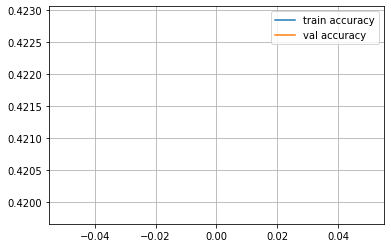

Epoch 1
Train accuracy: 0.4734452539330588
Val accuracy: 0.4751231527093596


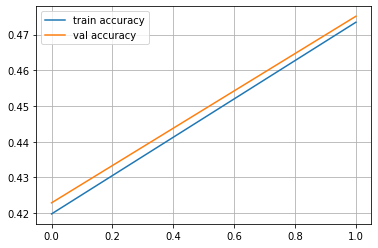

Epoch 2
Train accuracy: 0.4708056171470806
Val accuracy: 0.4677339901477833


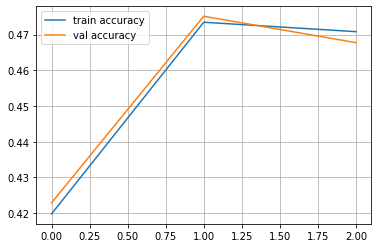

Epoch 3
Train accuracy: 0.47112237356139797
Val accuracy: 0.46945812807881776


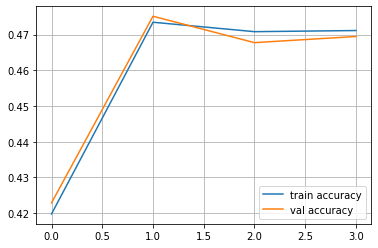

Epoch 4
Train accuracy: 0.4762960616619153
Val accuracy: 0.4761083743842365


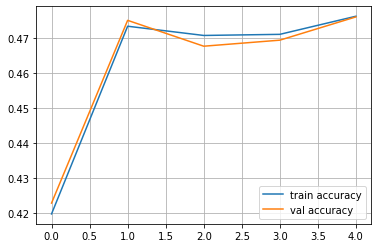

Epoch 5
Train accuracy: 0.48632668144863267
Val accuracy: 0.48177339901477834


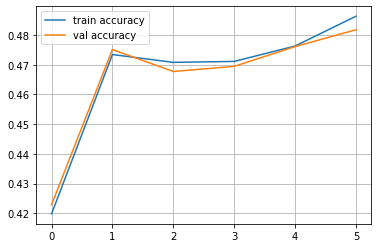

Epoch 6
Train accuracy: 0.493084151620737
Val accuracy: 0.4894088669950739


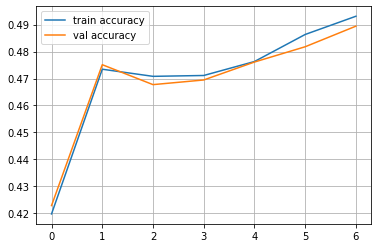

Epoch 7
Train accuracy: 0.49656847217822825
Val accuracy: 0.4921182266009852


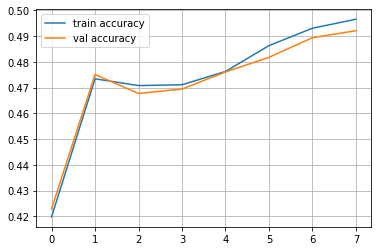

Epoch 8
Train accuracy: 0.49994720726428044
Val accuracy: 0.4958128078817734


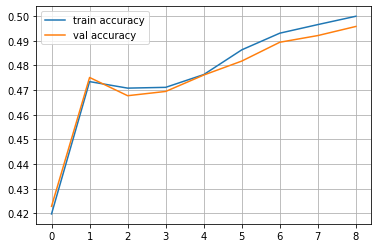

Epoch 9
Train accuracy: 0.5038538697075282
Val accuracy: 0.49975369458128077


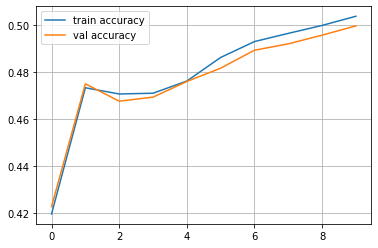

Epoch 10
Train accuracy: 0.5078661176222152
Val accuracy: 0.5046798029556651


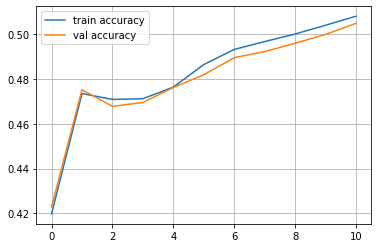

Epoch 11
Train accuracy: 0.5119839510083413
Val accuracy: 0.5083743842364532


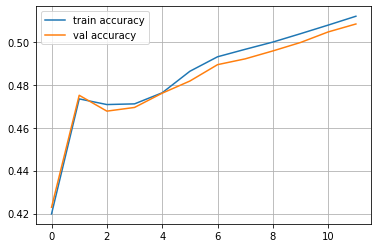

Epoch 12
Train accuracy: 0.5152571006229543
Val accuracy: 0.5113300492610837


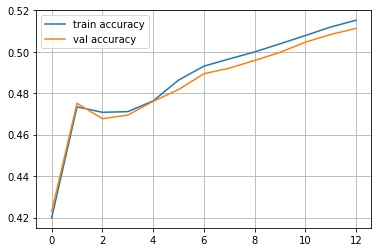

Epoch 13
Train accuracy: 0.5196916904233977
Val accuracy: 0.5147783251231527


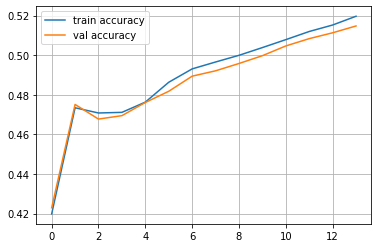

Epoch 14
Train accuracy: 0.5229648400380108
Val accuracy: 0.5179802955665025


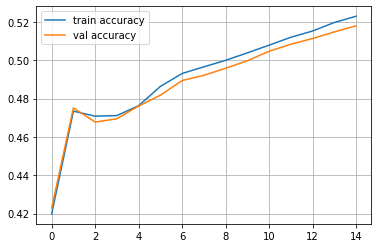

Epoch 15
Train accuracy: 0.5249709639953543
Val accuracy: 0.5194581280788177


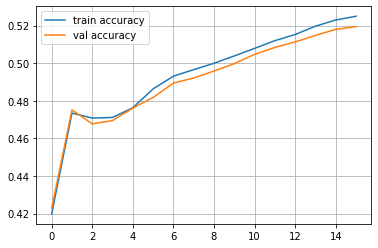

Epoch 16
Train accuracy: 0.5264491605955021
Val accuracy: 0.520935960591133


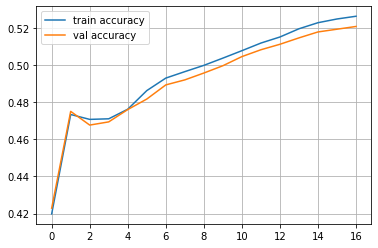

Epoch 17
Train accuracy: 0.5269770879526977
Val accuracy: 0.5219211822660098


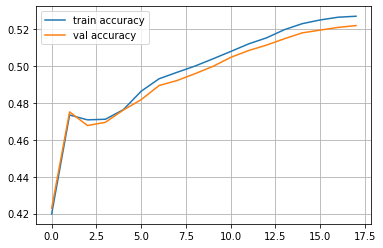

Epoch 18
Train accuracy: 0.5259212332383064
Val accuracy: 0.5224137931034483


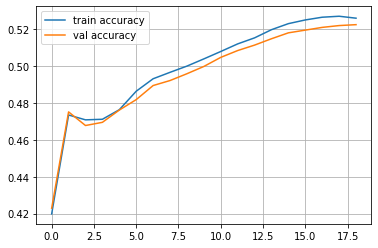

Epoch 19
Train accuracy: 0.5267659170098195
Val accuracy: 0.5231527093596059


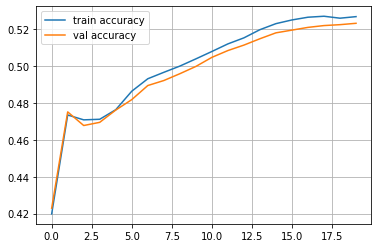

Epoch 20
Train accuracy: 0.5268715024812586
Val accuracy: 0.5233990147783252


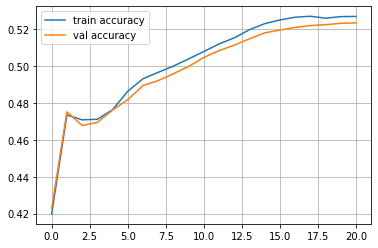

Epoch 21
Train accuracy: 0.5266603315383803
Val accuracy: 0.5248768472906404


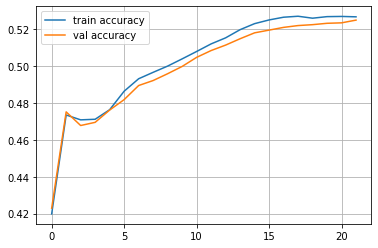

Epoch 22
Train accuracy: 0.5268715024812586
Val accuracy: 0.5246305418719212


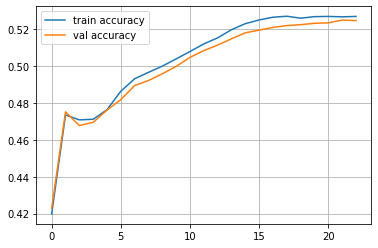

Epoch 23
Train accuracy: 0.5275050153098934
Val accuracy: 0.526847290640394


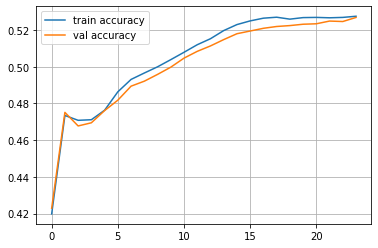

Epoch 24
Train accuracy: 0.5295111392672368
Val accuracy: 0.5293103448275862


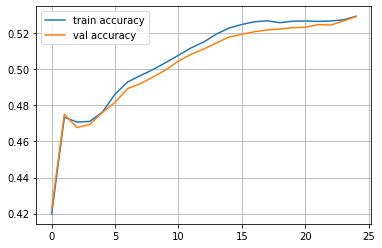

precision: 0.5721993277100804
recall: 0.5278017469242483
f1: 0.46524863125700405
accuracy: 0.5293103448275862
Confusion matrix: 
[[ 728   87  555]
 [ 239  127  972]
 [  32   26 1294]]


In [ ]:
from IPython.display import clear_output
import numpy as np

network = MLP([10, 15, 20, 3], len(inputs))

train_log = []
val_log = []

for epoch in range(25):
    network.fit(x_train.astype(float), y_train)
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test) == y_test))
    #clear_output()
    print("Epoch", epoch)
    print("Train accuracy:", train_log[-1])
    print("Val accuracy:", val_log[-1])
    plt.plot(train_log,label = 'train accuracy')
    plt.plot(val_log,label = 'val accuracy')
    plt.legend(loc = 'best')
    plt.grid()
    plt.show()

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

In [ ]:
%%time
from IPython.display import clear_output
import numpy as np

network = MLP([10, 15, 20, 3], len(inputs))

train_log = []
val_log = []

for epoch in range(25):
    network.fit(x_train.astype(float), y_train)
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test) == y_test))

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred)

CPU times: user 11.1 s, sys: 3.07 s, total: 14.2 s
Wall time: 10.9 s


Epoch 0
Train accuracy: 0.36215816703621584
Val accuracy: 0.3650246305418719


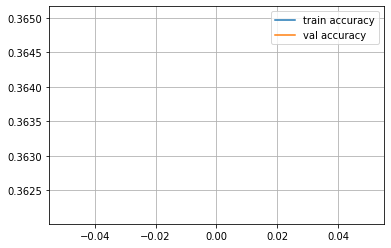

Epoch 1
Train accuracy: 0.3807412100095027
Val accuracy: 0.38399014778325125


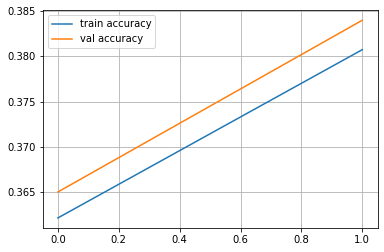

Epoch 2
Train accuracy: 0.40312532995459827
Val accuracy: 0.4022167487684729


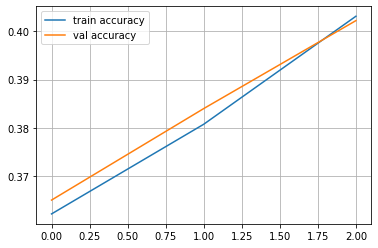

Epoch 3
Train accuracy: 0.42466476612818077
Val accuracy: 0.42266009852216746


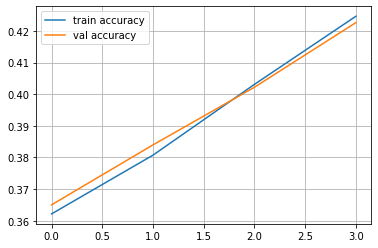

Epoch 4
Train accuracy: 0.4406081723154894
Val accuracy: 0.4458128078817734


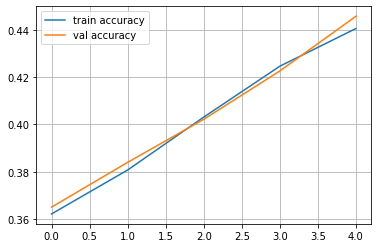

Epoch 5
Train accuracy: 0.45739626227431107
Val accuracy: 0.4640394088669951


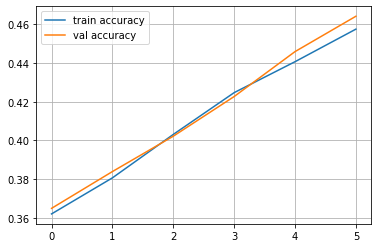

Epoch 6
Train accuracy: 0.47207264280435013
Val accuracy: 0.48300492610837437


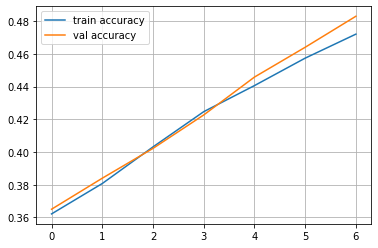

Epoch 7
Train accuracy: 0.48474289937704573
Val accuracy: 0.4928571428571429


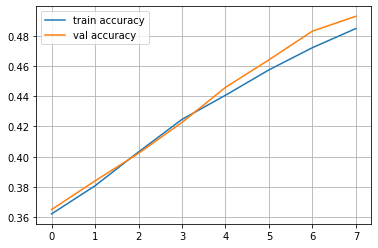

Epoch 8
Train accuracy: 0.49509027557808044
Val accuracy: 0.5004926108374385


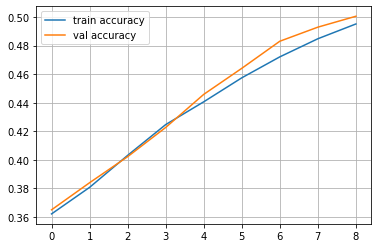

Epoch 9
Train accuracy: 0.5017421602787456
Val accuracy: 0.5064039408866995


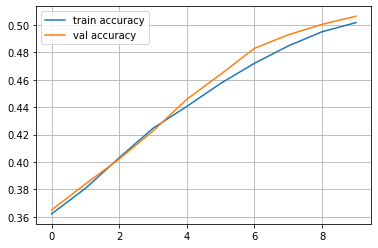

Epoch 10
Train accuracy: 0.5098722415795587
Val accuracy: 0.5160098522167488


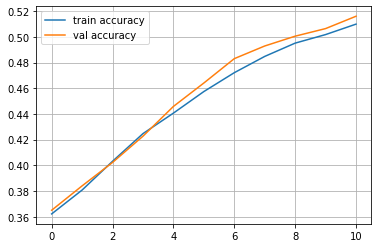

Epoch 11
Train accuracy: 0.5175799809946151
Val accuracy: 0.5229064039408867


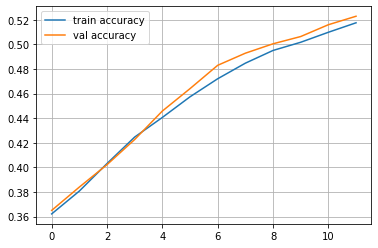

Epoch 12
Train accuracy: 0.5233871819237673
Val accuracy: 0.5307881773399015


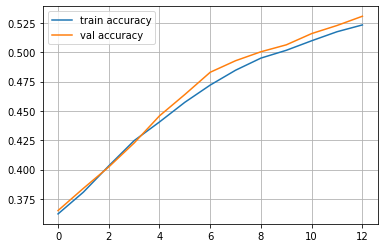

Epoch 13
Train accuracy: 0.5320451905817759
Val accuracy: 0.5391625615763547


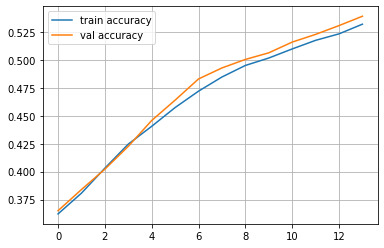

Epoch 14
Train accuracy: 0.5380635624538064
Val accuracy: 0.5438423645320197


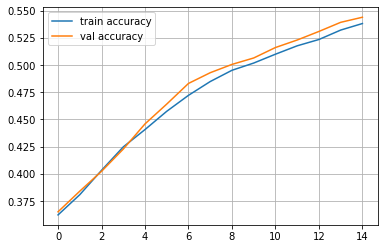

Epoch 15
Train accuracy: 0.5435540069686411
Val accuracy: 0.5492610837438424


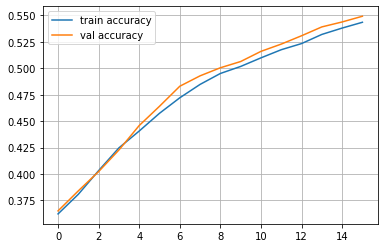

Epoch 16
Train accuracy: 0.5493612078977933
Val accuracy: 0.553448275862069


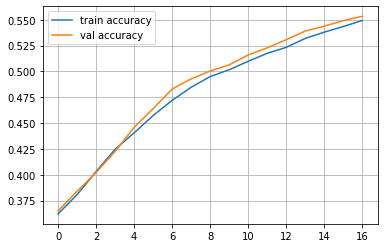

Epoch 17
Train accuracy: 0.5554851652412628
Val accuracy: 0.5586206896551724


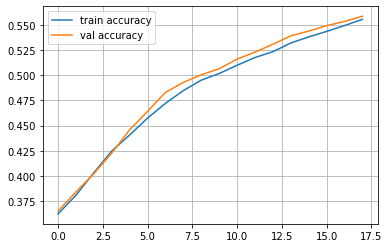

Epoch 18
Train accuracy: 0.5617147080561715
Val accuracy: 0.5600985221674877


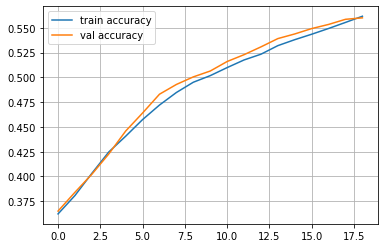

Epoch 19
Train accuracy: 0.5661492978566149
Val accuracy: 0.562807881773399


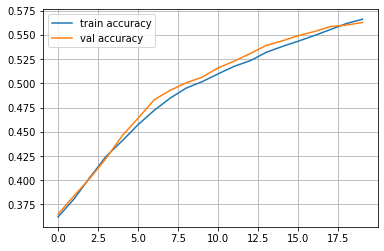

Epoch 20
Train accuracy: 0.5706894731284975
Val accuracy: 0.5667487684729065


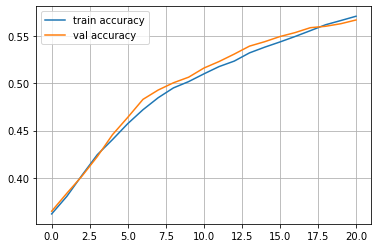

Epoch 21
Train accuracy: 0.5725900116144018
Val accuracy: 0.5729064039408867


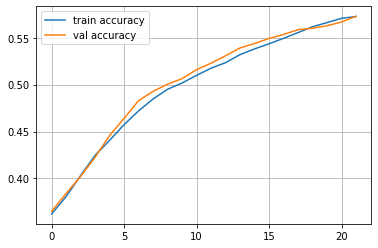

Epoch 22
Train accuracy: 0.5748073065146236
Val accuracy: 0.5768472906403941


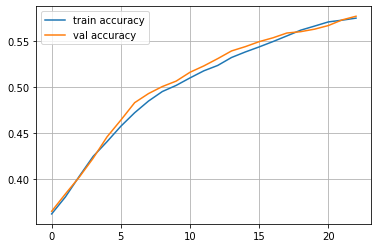

Epoch 23
Train accuracy: 0.5768134304719671
Val accuracy: 0.5802955665024631


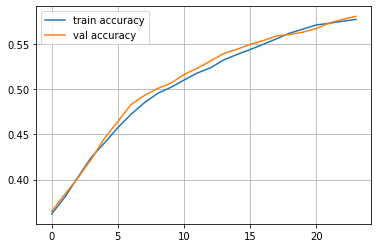

Epoch 24
Train accuracy: 0.5789251399007497
Val accuracy: 0.5839901477832512


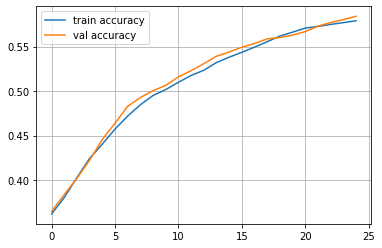

precision: 0.6442548767042532
recall: 0.5841790258519661
f1: 0.5783681927305143
accuracy: 0.5839901477832512
Confusion matrix: 
[[ 622  222  526]
 [  93  631  614]
 [  20  214 1118]]


In [ ]:
from IPython.display import clear_output
import numpy as np

network = MLP([20, 30, 40, 3], len(inputs))

train_log = []
val_log = []

for epoch in range(25):
    network.fit(x_train.astype(float), y_train)
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test) == y_test))
    #clear_output()
    print("Epoch", epoch)
    print("Train accuracy:", train_log[-1])
    print("Val accuracy:", val_log[-1])
    plt.plot(train_log,label = 'train accuracy')
    plt.plot(val_log,label = 'val accuracy')
    plt.legend(loc = 'best')
    plt.grid()
    plt.show()

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

In [ ]:
%%time
from IPython.display import clear_output
import numpy as np

network = MLP([20, 30, 40, 3], len(inputs))

train_log = []
val_log = []

for epoch in range(25):
    network.fit(x_train.astype(float), y_train)
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test) == y_test))

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred)

CPU times: user 31.6 s, sys: 3.64 s, total: 35.2 s
Wall time: 31.6 s


Epoch 0
Train accuracy: 0.3626860943934115
Val accuracy: 0.3566502463054187


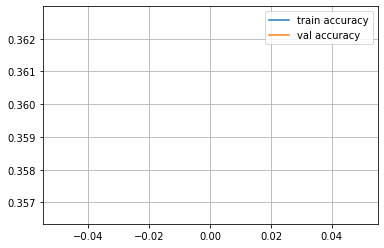

Epoch 1
Train accuracy: 0.3995354239256678
Val accuracy: 0.387192118226601


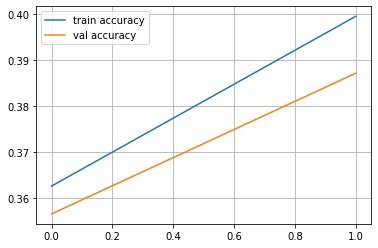

Epoch 2
Train accuracy: 0.4091437018266287
Val accuracy: 0.4017241379310345


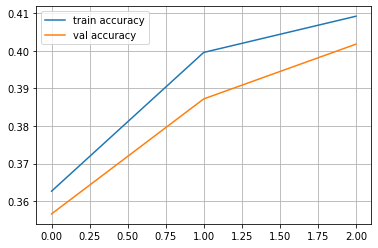

Epoch 3
Train accuracy: 0.4178017104846373
Val accuracy: 0.41600985221674874


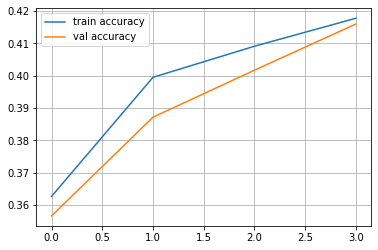

Epoch 4
Train accuracy: 0.4237144968852286
Val accuracy: 0.42635467980295566


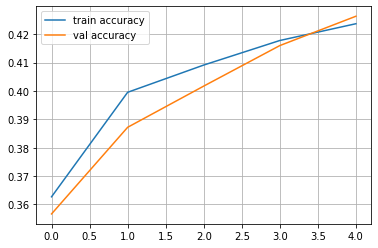

Epoch 5
Train accuracy: 0.4292049414000634
Val accuracy: 0.432512315270936


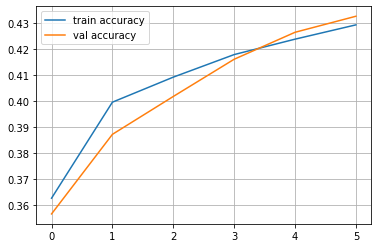

Epoch 6
Train accuracy: 0.4393411466582198
Val accuracy: 0.44655172413793104


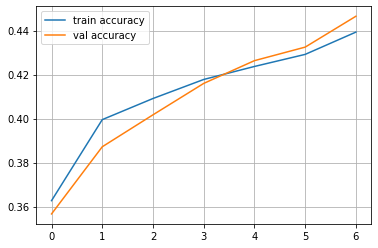

Epoch 7
Train accuracy: 0.4547566254883328
Val accuracy: 0.4603448275862069


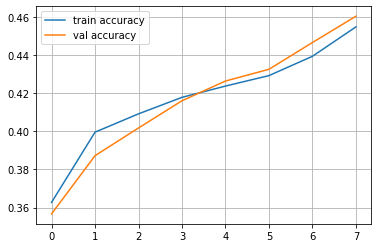

Epoch 8
Train accuracy: 0.4734452539330588
Val accuracy: 0.47758620689655173


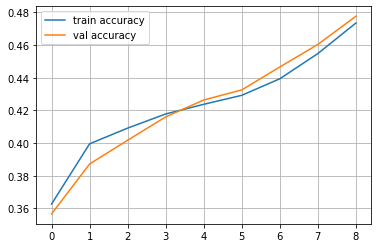

Epoch 9
Train accuracy: 0.4924506387921022
Val accuracy: 0.4945812807881773


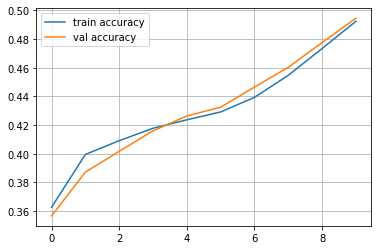

Epoch 10
Train accuracy: 0.5176855664660542
Val accuracy: 0.5199507389162562


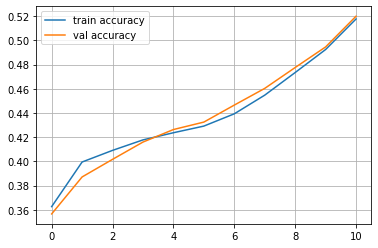

Epoch 11
Train accuracy: 0.5386970752824412
Val accuracy: 0.5401477832512315


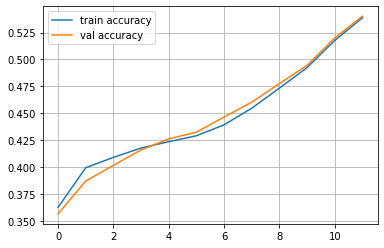

Epoch 12
Train accuracy: 0.5546404814697498
Val accuracy: 0.5544334975369458


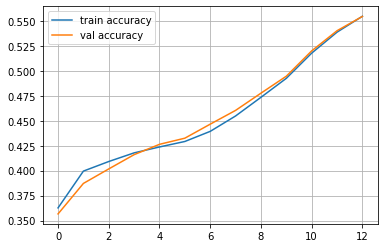

Epoch 13
Train accuracy: 0.5660437123851758
Val accuracy: 0.56871921182266


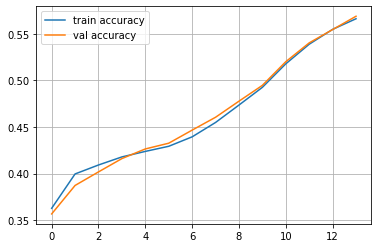

Epoch 14
Train accuracy: 0.5757575757575758
Val accuracy: 0.5780788177339902


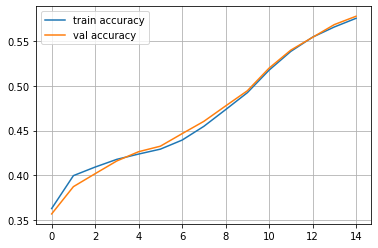

Epoch 15
Train accuracy: 0.5818815331010453
Val accuracy: 0.583743842364532


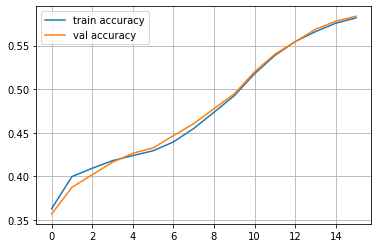

Epoch 16
Train accuracy: 0.58737197761588
Val accuracy: 0.5896551724137931


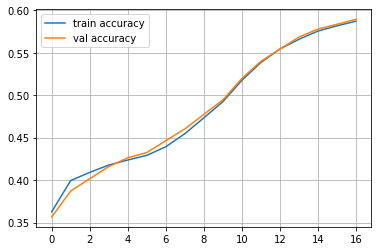

Epoch 17
Train accuracy: 0.5915953964734453
Val accuracy: 0.5938423645320197


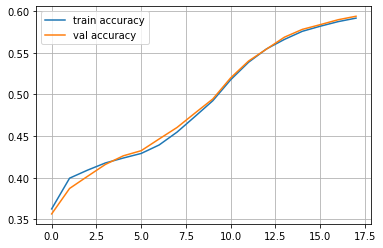

Epoch 18
Train accuracy: 0.5941294477879844
Val accuracy: 0.5997536945812808


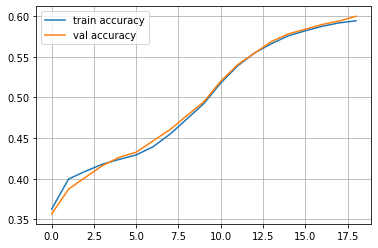

Epoch 19
Train accuracy: 0.5948685460880583
Val accuracy: 0.6017241379310345


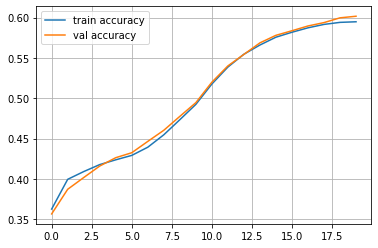

Epoch 20
Train accuracy: 0.5980361102312322
Val accuracy: 0.6029556650246305


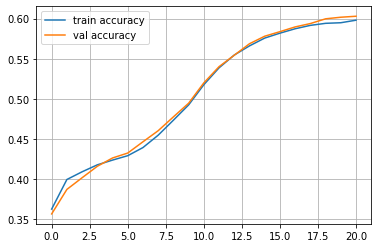

Epoch 21
Train accuracy: 0.6010980889029669
Val accuracy: 0.6044334975369459


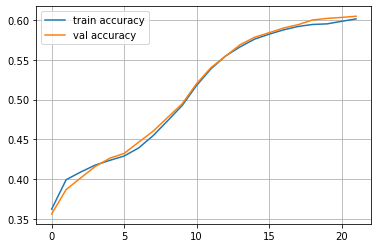

Epoch 22
Train accuracy: 0.6054270932319713
Val accuracy: 0.6056650246305418


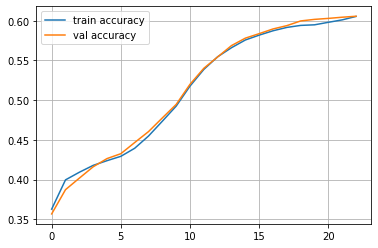

Epoch 23
Train accuracy: 0.6082779009608278
Val accuracy: 0.6083743842364532


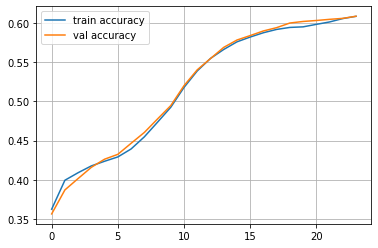

Epoch 24
Train accuracy: 0.611762221518319
Val accuracy: 0.6137931034482759


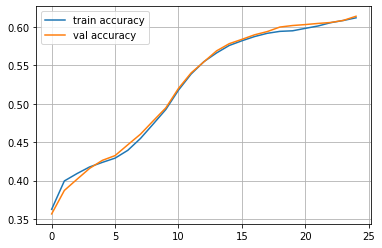

precision: 0.6753484562009705
recall: 0.6142875212099939
f1: 0.6079739872153377
accuracy: 0.6137931034482759
Confusion matrix: 
[[ 614  222  534]
 [  81  728  529]
 [  13  189 1150]]


In [ ]:
from IPython.display import clear_output
import numpy as np

network = MLP([50, 75, 100, 3], len(inputs))

train_log = []
val_log = []

for epoch in range(25):
    network.fit(x_train.astype(float), y_train)
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test) == y_test))
    #clear_output()
    print("Epoch", epoch)
    print("Train accuracy:", train_log[-1])
    print("Val accuracy:", val_log[-1])
    plt.plot(train_log,label = 'train accuracy')
    plt.plot(val_log,label = 'val accuracy')
    plt.legend(loc = 'best')
    plt.grid()
    plt.show()

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

In [ ]:
%%time
from IPython.display import clear_output
import numpy as np

network = MLP([50, 75, 100, 3], len(inputs))

train_log = []
val_log = []

for epoch in range(25):
    network.fit(x_train.astype(float), y_train)
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test) == y_test))

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred)

CPU times: user 2min 55s, sys: 5.94 s, total: 3min 1s
Wall time: 2min 56s


Epoch 0
Train accuracy: 0.39964100939710695
Val accuracy: 0.3913793103448276


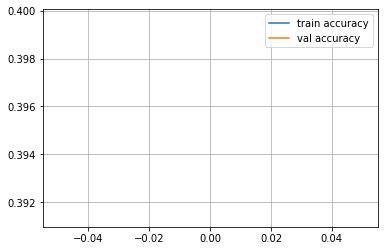

Epoch 1
Train accuracy: 0.42783233027135464
Val accuracy: 0.42438423645320195


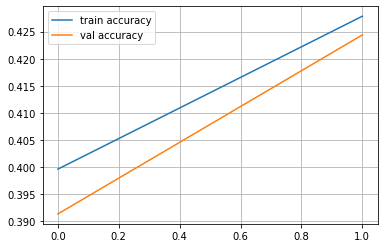

Epoch 2
Train accuracy: 0.44124168514412415
Val accuracy: 0.43866995073891624


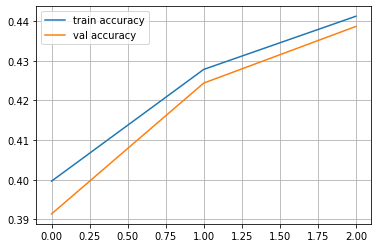

Epoch 3
Train accuracy: 0.46098616830324146
Val accuracy: 0.45985221674876847


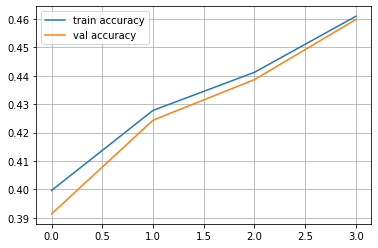

Epoch 4
Train accuracy: 0.49846901066413263
Val accuracy: 0.4933497536945813


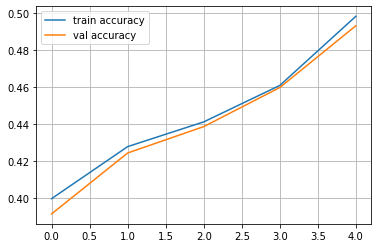

Epoch 5
Train accuracy: 0.5544293105268715
Val accuracy: 0.5507389162561577


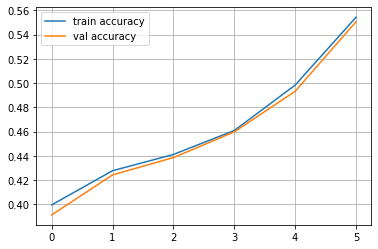

Epoch 6
Train accuracy: 0.5961355717453278
Val accuracy: 0.5903940886699507


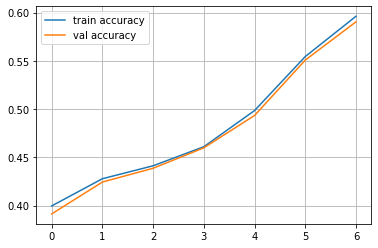

Epoch 7
Train accuracy: 0.6145074437757364
Val accuracy: 0.6103448275862069


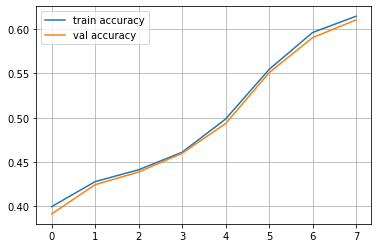

Epoch 8
Train accuracy: 0.6282335550628233
Val accuracy: 0.6261083743842365


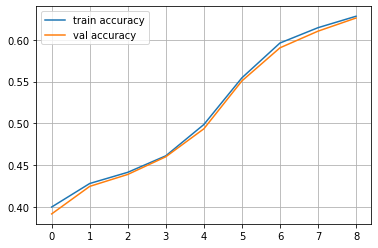

Epoch 9
Train accuracy: 0.6363636363636364
Val accuracy: 0.6376847290640394


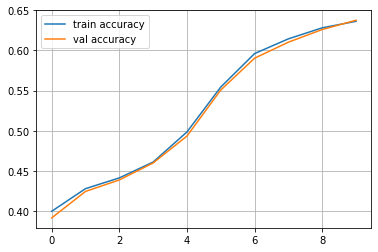

Epoch 10
Train accuracy: 0.6414317389927146
Val accuracy: 0.6421182266009853


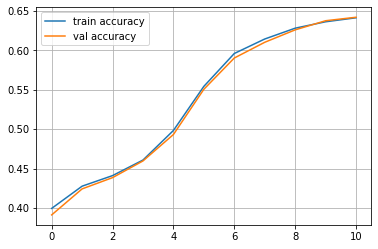

Epoch 11
Train accuracy: 0.643332277478619
Val accuracy: 0.6450738916256158


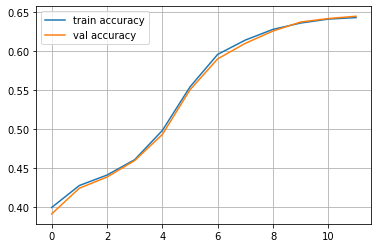

Epoch 12
Train accuracy: 0.6460774997360363
Val accuracy: 0.6458128078817734


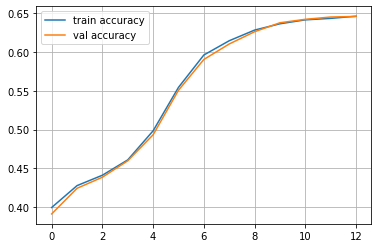

Epoch 13
Train accuracy: 0.6458663287931581
Val accuracy: 0.6460591133004926


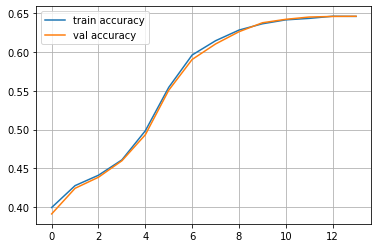

Epoch 14
Train accuracy: 0.6488227219934537
Val accuracy: 0.6463054187192119


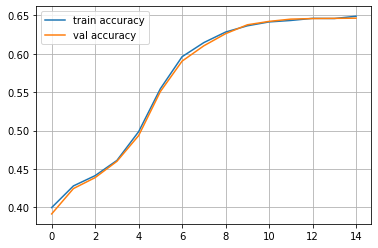

Epoch 15
Train accuracy: 0.6503009185936015
Val accuracy: 0.6460591133004926


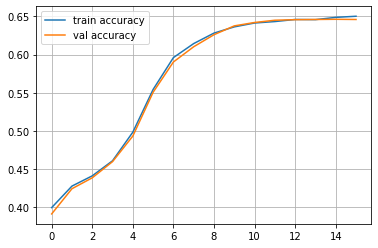

Epoch 16
Train accuracy: 0.6518847006651884
Val accuracy: 0.6470443349753695


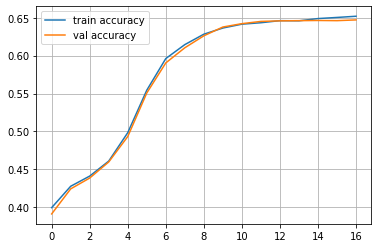

Epoch 17
Train accuracy: 0.6532573117938971
Val accuracy: 0.6477832512315271


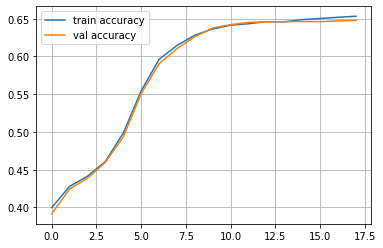

Epoch 18
Train accuracy: 0.6558969485798755
Val accuracy: 0.6502463054187192


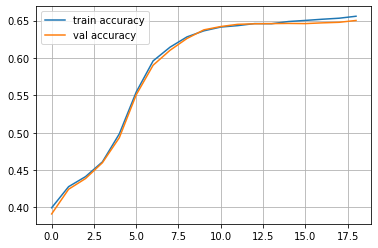

Epoch 19
Train accuracy: 0.6569528032942668
Val accuracy: 0.6522167487684729


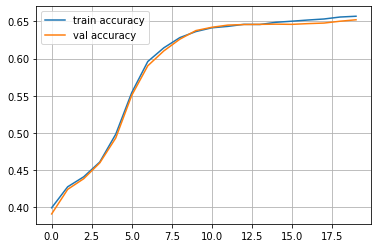

Epoch 20
Train accuracy: 0.6584309998944146
Val accuracy: 0.6541871921182266


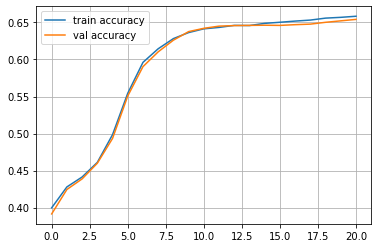

Epoch 21
Train accuracy: 0.6594868546088059
Val accuracy: 0.6561576354679803


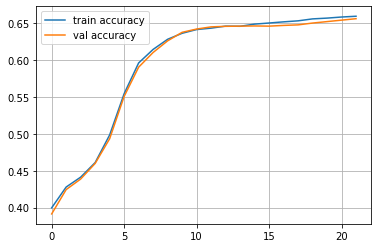

Epoch 22
Train accuracy: 0.6609650512089537
Val accuracy: 0.656896551724138


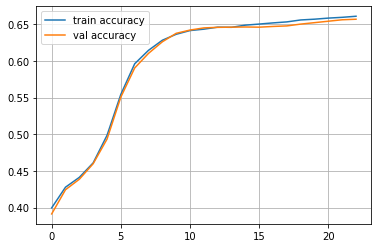

Epoch 23
Train accuracy: 0.6623376623376623
Val accuracy: 0.656896551724138


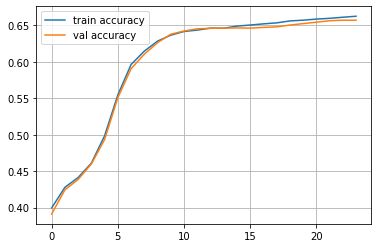

Epoch 24
Train accuracy: 0.6636046879949319
Val accuracy: 0.6588669950738916


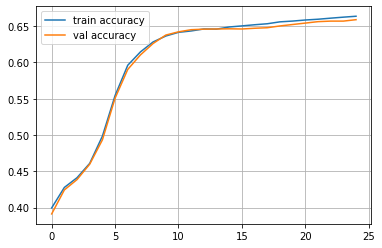

precision: 0.6947305095150399
recall: 0.659871783788916
f1: 0.6528335523661631
accuracy: 0.6588669950738916
Confusion matrix: 
[[ 639  319  412]
 [  96  940  302]
 [  15  241 1096]]


In [ ]:
from IPython.display import clear_output
import numpy as np

network = MLP([100, 150, 200, 3], len(inputs))

train_log = []
val_log = []

for epoch in range(25):
    network.fit(x_train.astype(float), y_train)
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test) == y_test))
    #clear_output()
    print("Epoch", epoch)
    print("Train accuracy:", train_log[-1])
    print("Val accuracy:", val_log[-1])
    plt.plot(train_log,label = 'train accuracy')
    plt.plot(val_log,label = 'val accuracy')
    plt.legend(loc = 'best')
    plt.grid()
    plt.show()

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

In [ ]:
%%time
from IPython.display import clear_output
import numpy as np

network = MLP([100, 150, 200, 3], len(inputs))

train_log = []
val_log = []

for epoch in range(25):
    network.fit(x_train.astype(float), y_train)
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test) == y_test))

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred)

CPU times: user 12min 27s, sys: 11.1 s, total: 12min 38s
Wall time: 12min 29s


### Αριθμός ενδιάμεσων επιπέδων

Epoch 0
Train accuracy: 0.19871185724844262
Val accuracy: 0.20911330049261084


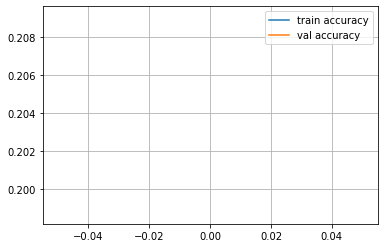

Epoch 1
Train accuracy: 0.20525815647766868
Val accuracy: 0.21921182266009853


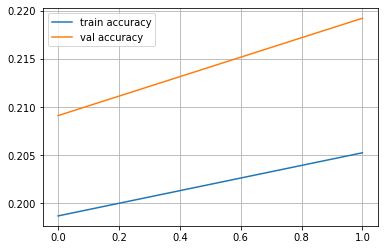

Epoch 2
Train accuracy: 0.21898426776475557
Val accuracy: 0.2332512315270936


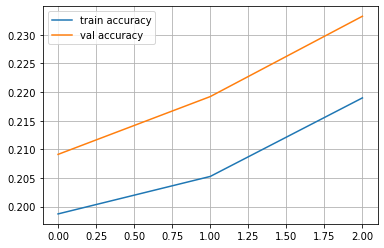

Epoch 3
Train accuracy: 0.2441136099672685
Val accuracy: 0.2522167487684729


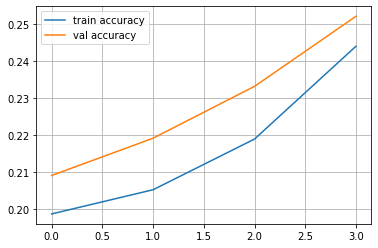

Epoch 4
Train accuracy: 0.2698764649984162
Val accuracy: 0.27635467980295564


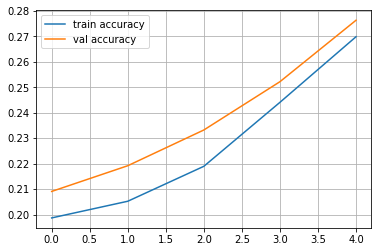

Epoch 5
Train accuracy: 0.2887762643860205
Val accuracy: 0.29384236453201973


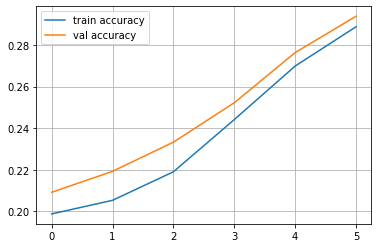

Epoch 6
Train accuracy: 0.3068313800021117
Val accuracy: 0.30935960591133005


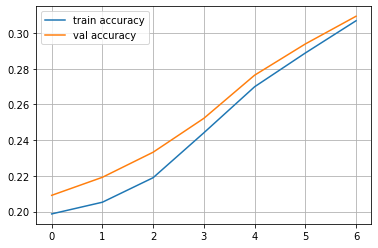

Epoch 7
Train accuracy: 0.328159645232816
Val accuracy: 0.33399014778325126


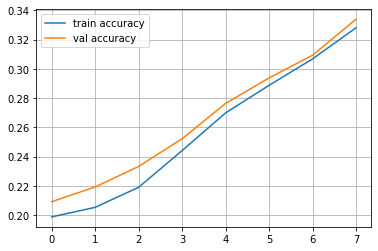

Epoch 8
Train accuracy: 0.35909618836448104
Val accuracy: 0.36182266009852215


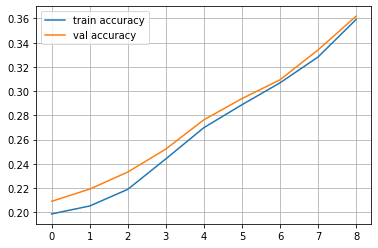

Epoch 9
Train accuracy: 0.3853869707528244
Val accuracy: 0.39088669950738913


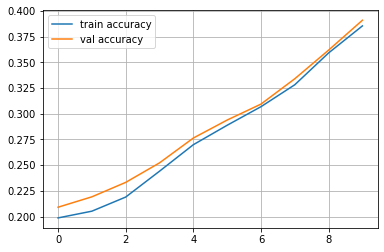

Epoch 10
Train accuracy: 0.41516207369865904
Val accuracy: 0.4142857142857143


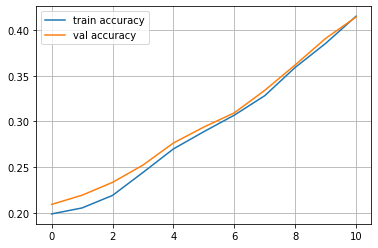

Epoch 11
Train accuracy: 0.4764016471333545
Val accuracy: 0.47413793103448276


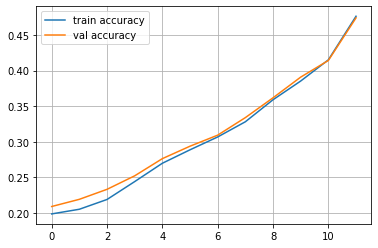

Epoch 12
Train accuracy: 0.5131453911941717
Val accuracy: 0.508128078817734


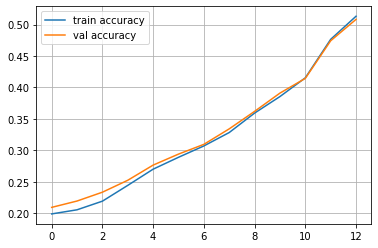

Epoch 13
Train accuracy: 0.5351071692535108
Val accuracy: 0.533743842364532


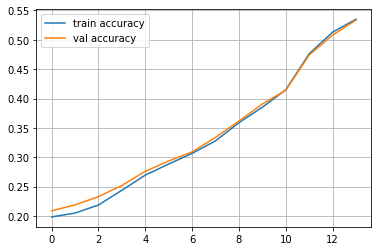

Epoch 14
Train accuracy: 0.5511561609122585
Val accuracy: 0.5544334975369458


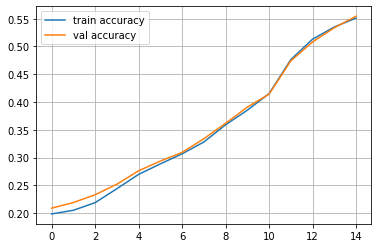

Epoch 15
Train accuracy: 0.5615035371132933
Val accuracy: 0.5665024630541872


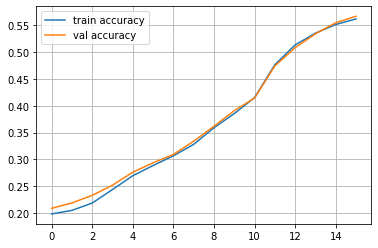

Epoch 16
Train accuracy: 0.571111815014254
Val accuracy: 0.5751231527093597


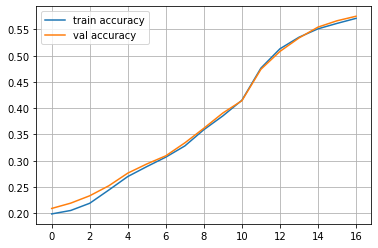

Epoch 17
Train accuracy: 0.5762855031147714
Val accuracy: 0.5780788177339902


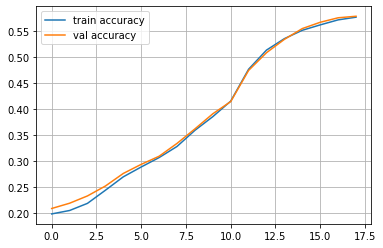

Epoch 18
Train accuracy: 0.578397212543554
Val accuracy: 0.5807881773399015


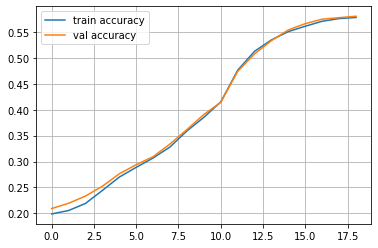

Epoch 19
Train accuracy: 0.5781860416006758
Val accuracy: 0.5805418719211822


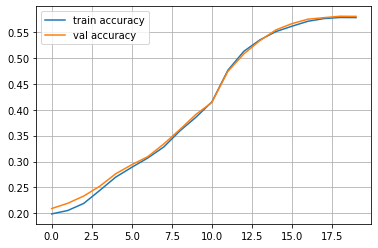

Epoch 20
Train accuracy: 0.5779748706577975
Val accuracy: 0.5805418719211822


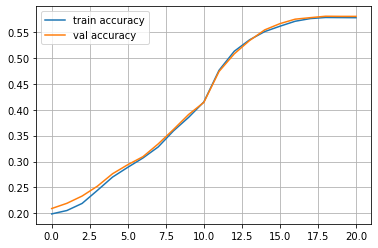

Epoch 21
Train accuracy: 0.5780804561292366
Val accuracy: 0.5815270935960591


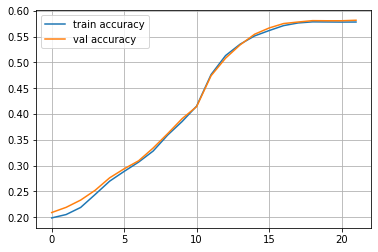

Epoch 22
Train accuracy: 0.5794530672579453
Val accuracy: 0.5795566502463054


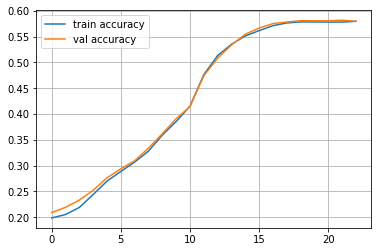

Epoch 23
Train accuracy: 0.5791363108436279
Val accuracy: 0.5793103448275863


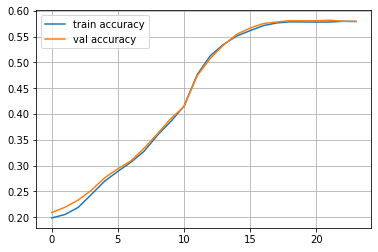

Epoch 24
Train accuracy: 0.5788195544293105
Val accuracy: 0.5800492610837439


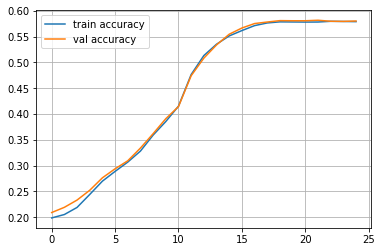

precision: 0.6203035757658644
recall: 0.5811727605391668
f1: 0.572883798928557
accuracy: 0.5800492610837439
Confusion matrix: 
[[ 701  479  190]
 [ 116 1094  128]
 [ 142  650  560]]


In [ ]:
from IPython.display import clear_output
import numpy as np

network = MLP([10, 15, 15, 20, 3], len(inputs))

train_log = []
val_log = []

for epoch in range(25):
    network.fit(x_train.astype(float), y_train)
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test) == y_test))
    #clear_output()
    print("Epoch", epoch)
    print("Train accuracy:", train_log[-1])
    print("Val accuracy:", val_log[-1])
    plt.plot(train_log,label = 'train accuracy')
    plt.plot(val_log,label = 'val accuracy')
    plt.legend(loc = 'best')
    plt.grid()
    plt.show()

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

In [ ]:
%%time
from IPython.display import clear_output
import numpy as np

network = MLP([10, 15, 15, 20, 3], len(inputs))

train_log = []
val_log = []

for epoch in range(25):
    network.fit(x_train.astype(float), y_train)
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test) == y_test))

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred)

CPU times: user 14 s, sys: 2.97 s, total: 16.9 s
Wall time: 13.5 s


Epoch 0
Train accuracy: 0.32678703410410725
Val accuracy: 0.3374384236453202


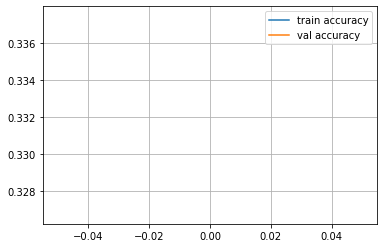

Epoch 1
Train accuracy: 0.32678703410410725
Val accuracy: 0.3376847290640394


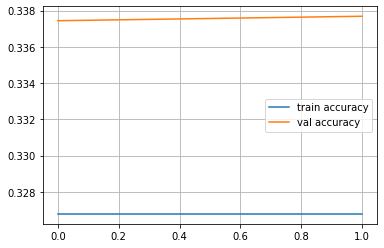

Epoch 2
Train accuracy: 0.3269982050469855
Val accuracy: 0.3389162561576355


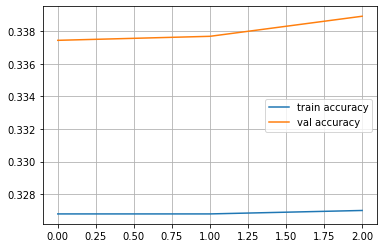

Epoch 3
Train accuracy: 0.33090486749023335
Val accuracy: 0.34261083743842363


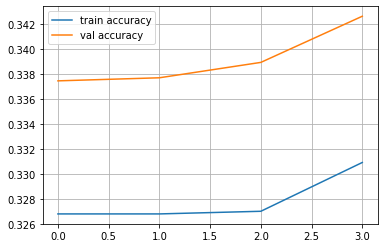

Epoch 4
Train accuracy: 0.34790412839193324
Val accuracy: 0.3568965517241379


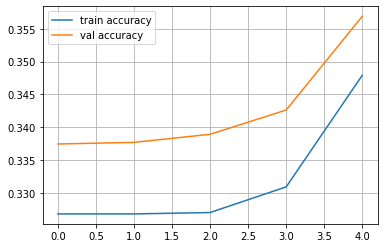

Epoch 5
Train accuracy: 0.37113293210854187
Val accuracy: 0.38201970443349753


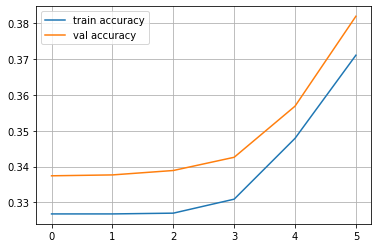

Epoch 6
Train accuracy: 0.39446732129658957
Val accuracy: 0.41083743842364534


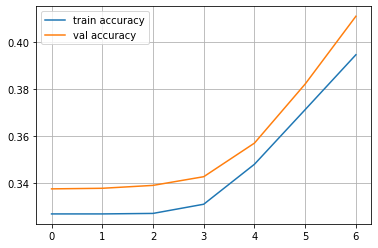

Epoch 7
Train accuracy: 0.4185408087847112
Val accuracy: 0.4315270935960591


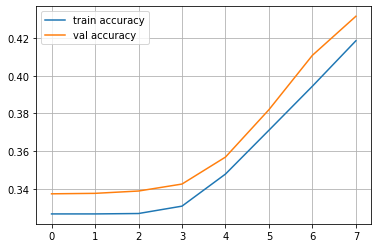

Epoch 8
Train accuracy: 0.44050258684405025
Val accuracy: 0.45123152709359604


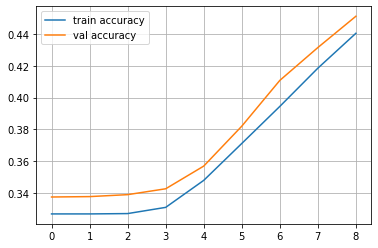

Epoch 9
Train accuracy: 0.4579241896315067
Val accuracy: 0.4630541871921182


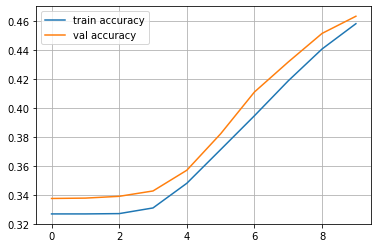

Epoch 10
Train accuracy: 0.4716503009185936
Val accuracy: 0.47413793103448276


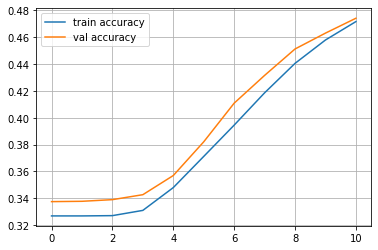

Epoch 11
Train accuracy: 0.48284236089114135
Val accuracy: 0.48300492610837437


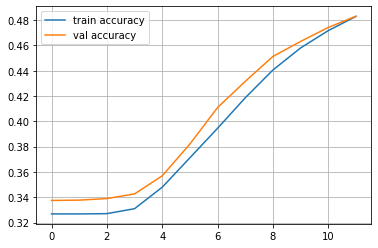

Epoch 12
Train accuracy: 0.4892830746489283
Val accuracy: 0.4876847290640394


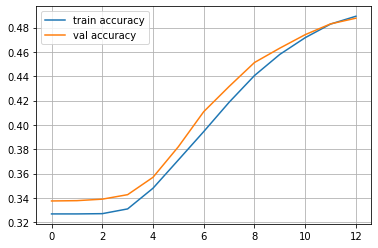

Epoch 13
Train accuracy: 0.49403442086368915
Val accuracy: 0.49088669950738917


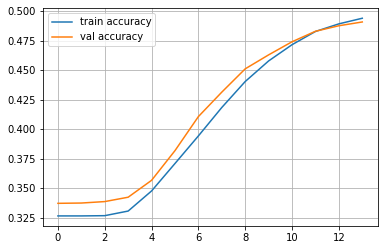

Epoch 14
Train accuracy: 0.4957237884067152
Val accuracy: 0.4928571428571429


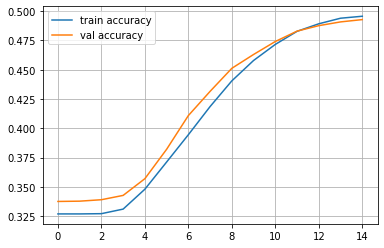

Epoch 15
Train accuracy: 0.4957237884067152
Val accuracy: 0.4928571428571429


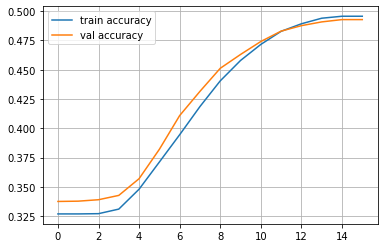

Epoch 16
Train accuracy: 0.49392883539225
Val accuracy: 0.4916256157635468


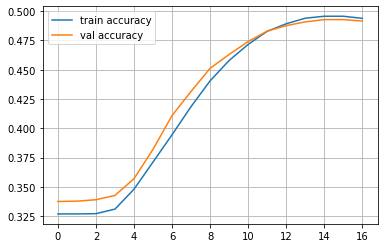

Epoch 17
Train accuracy: 0.4945623482208848
Val accuracy: 0.4903940886699507


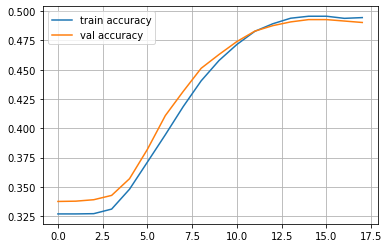

Epoch 18
Train accuracy: 0.4956182029352761
Val accuracy: 0.49482758620689654


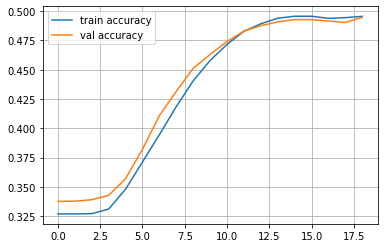

Epoch 19
Train accuracy: 0.4995248653785239
Val accuracy: 0.49729064039408866


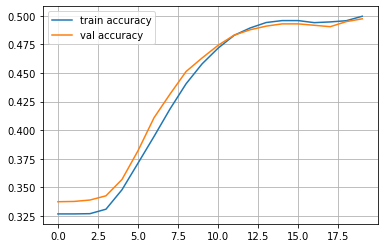

Epoch 20
Train accuracy: 0.5024812585788195
Val accuracy: 0.5007389162561576


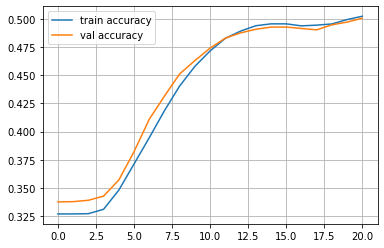

Epoch 21
Train accuracy: 0.5060711646077499
Val accuracy: 0.5049261083743842


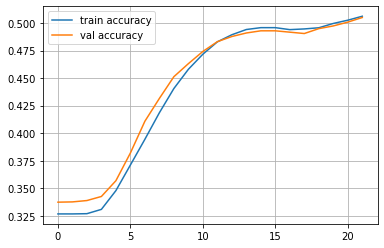

Epoch 22
Train accuracy: 0.512617463836976
Val accuracy: 0.5088669950738917


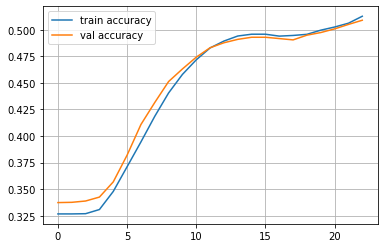

Epoch 23
Train accuracy: 0.5173688100517368
Val accuracy: 0.5145320197044335


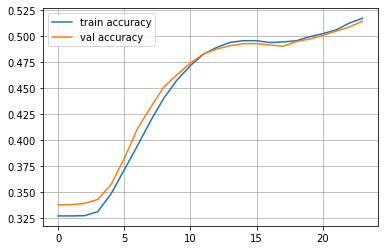

Epoch 24
Train accuracy: 0.5220145707950586
Val accuracy: 0.5201970443349754


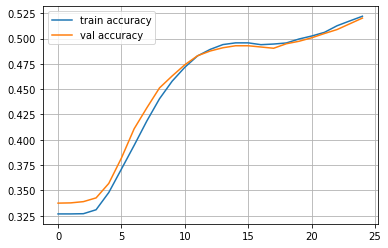

precision: 0.6800560737749991
recall: 0.5214673097792245
f1: 0.4651480897981934
accuracy: 0.5201970443349754
Confusion matrix: 
[[ 741  620    9]
 [ 104 1224   10]
 [ 171 1034  147]]


In [ ]:
from IPython.display import clear_output
import numpy as np

network = MLP([50, 75, 75, 100, 3], len(inputs))

train_log = []
val_log = []

for epoch in range(25):
    network.fit(x_train.astype(float), y_train)
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test) == y_test))
    #clear_output()
    print("Epoch", epoch)
    print("Train accuracy:", train_log[-1])
    print("Val accuracy:", val_log[-1])
    plt.plot(train_log,label = 'train accuracy')
    plt.plot(val_log,label = 'val accuracy')
    plt.legend(loc = 'best')
    plt.grid()
    plt.show()

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

In [ ]:
%%time
from IPython.display import clear_output
import numpy as np

network = MLP([50, 75, 75, 100, 3], len(inputs))

train_log = []
val_log = []

for epoch in range(25):
    network.fit(x_train.astype(float), y_train)
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test) == y_test))

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred)

CPU times: user 4min 13s, sys: 6.51 s, total: 4min 20s
Wall time: 4min 14s


### Αριθμός εποχών

Epoch 0
Train accuracy: 0.37841832963784183
Val accuracy: 0.3665024630541872


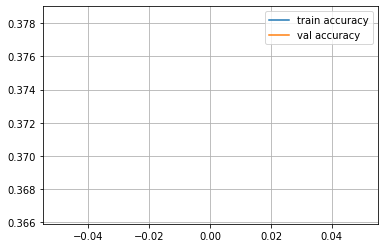

Epoch 1
Train accuracy: 0.39826839826839827
Val accuracy: 0.3830049261083744


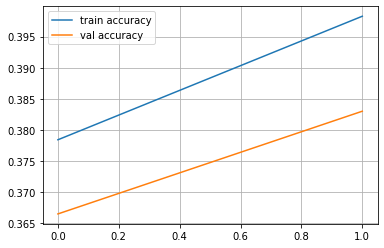

Epoch 2
Train accuracy: 0.40935487276950694
Val accuracy: 0.39532019704433496


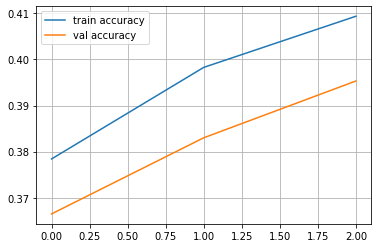

Epoch 3
Train accuracy: 0.41526765917009817
Val accuracy: 0.404679802955665


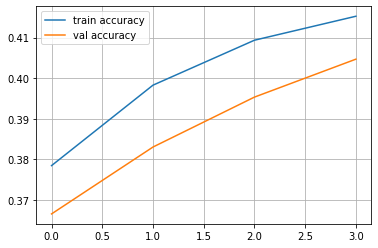

Epoch 4
Train accuracy: 0.4221307148136416
Val accuracy: 0.4142857142857143


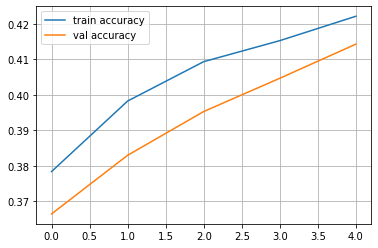

Epoch 5
Train accuracy: 0.42751557385703726
Val accuracy: 0.41921182266009854


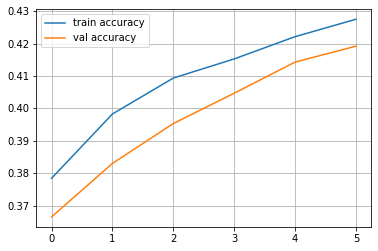

Epoch 6
Train accuracy: 0.4329004329004329
Val accuracy: 0.42438423645320195


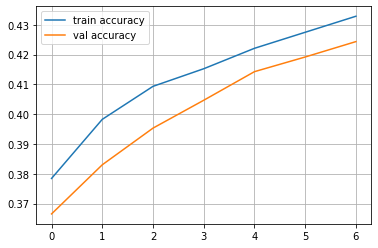

Epoch 7
Train accuracy: 0.437018266286559
Val accuracy: 0.4288177339901478


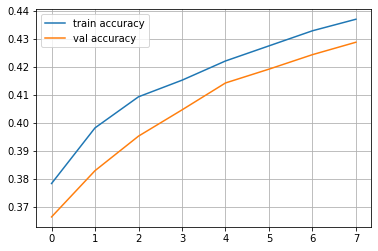

Epoch 8
Train accuracy: 0.44124168514412415
Val accuracy: 0.432512315270936


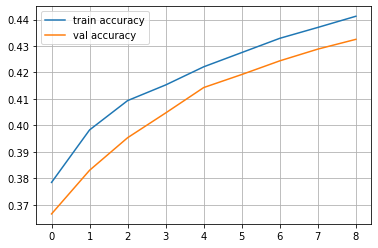

Epoch 9
Train accuracy: 0.44324780910146766
Val accuracy: 0.4362068965517241


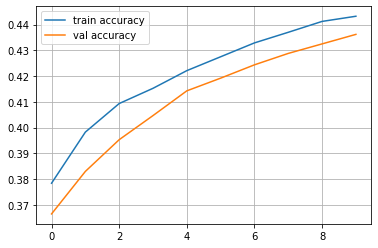

Epoch 10
Train accuracy: 0.44578186041600676
Val accuracy: 0.4396551724137931


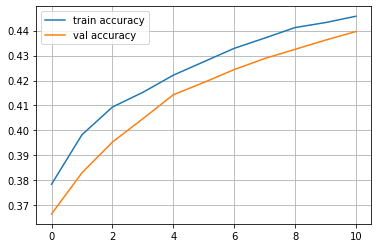

Epoch 11
Train accuracy: 0.448421497201985
Val accuracy: 0.4421182266009852


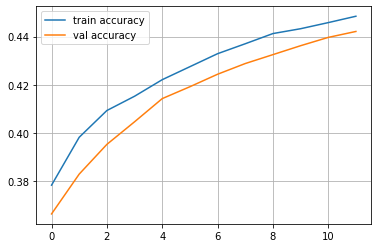

Epoch 12
Train accuracy: 0.45275050153098934
Val accuracy: 0.4455665024630542


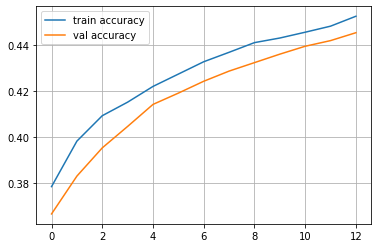

Epoch 13
Train accuracy: 0.45739626227431107
Val accuracy: 0.4504926108374384


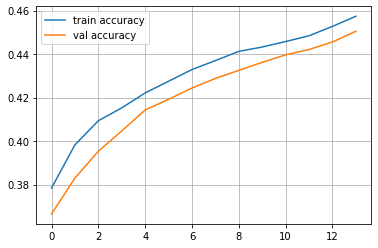

Epoch 14
Train accuracy: 0.46278112131770666
Val accuracy: 0.45788177339901476


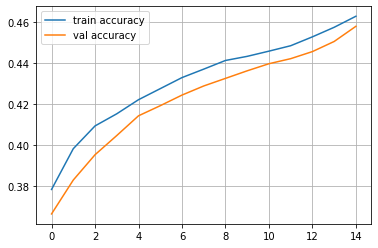

precision: 0.47557800567444736
recall: 0.45944485730858076
f1: 0.3899632623372376
accuracy: 0.45788177339901476
Confusion matrix: 
[[ 595  748   27]
 [  79 1178   81]
 [ 380  886   86]]


In [ ]:
from IPython.display import clear_output
import numpy as np

network = MLP([10, 15, 20, 3], len(inputs))

train_log = []
val_log = []

for epoch in range(15):
    network.fit(x_train.astype(float), y_train)
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test) == y_test))
    #clear_output()
    print("Epoch", epoch)
    print("Train accuracy:", train_log[-1])
    print("Val accuracy:", val_log[-1])
    plt.plot(train_log,label = 'train accuracy')
    plt.plot(val_log,label = 'val accuracy')
    plt.legend(loc = 'best')
    plt.grid()
    plt.show()

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

In [ ]:
%%time
from IPython.display import clear_output
import numpy as np

network = MLP([10, 15, 20, 3], len(inputs))

train_log = []
val_log = []

for epoch in range(15):
    network.fit(x_train.astype(float), y_train)
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test) == y_test))

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred)

CPU times: user 6.52 s, sys: 1.8 s, total: 8.32 s
Wall time: 6.29 s


Epoch 0
Train accuracy: 0.35360574384964627
Val accuracy: 0.36551724137931035


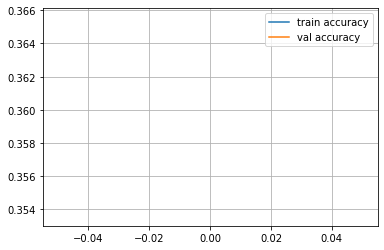

Epoch 1
Train accuracy: 0.36015204307887233
Val accuracy: 0.37364532019704433


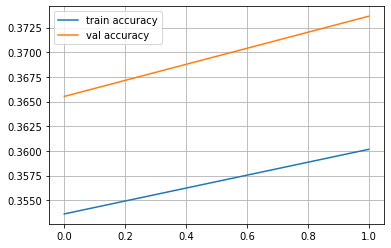

Epoch 2
Train accuracy: 0.36553690212226797
Val accuracy: 0.37807881773399016


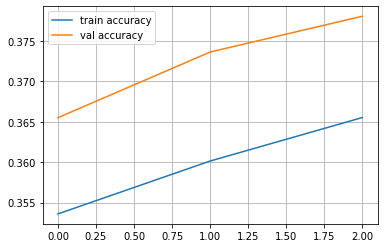

Epoch 3
Train accuracy: 0.3726111287086897
Val accuracy: 0.38694581280788176


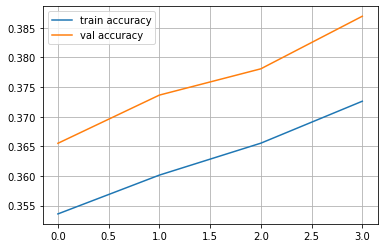

Epoch 4
Train accuracy: 0.37746806039488967
Val accuracy: 0.3889162561576355


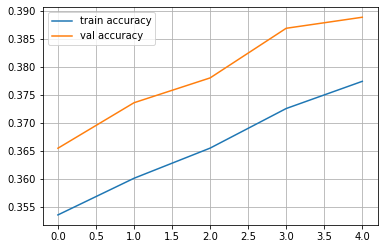

Epoch 5
Train accuracy: 0.381797064723894
Val accuracy: 0.39285714285714285


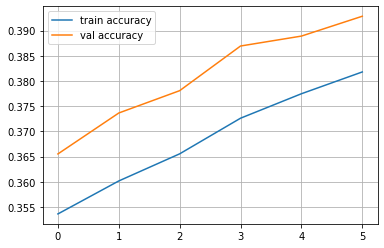

Epoch 6
Train accuracy: 0.3839087741526766
Val accuracy: 0.3955665024630542


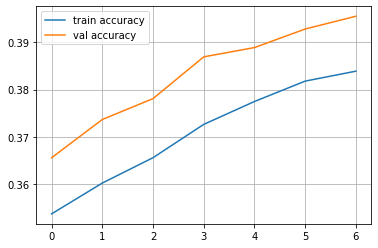

Epoch 7
Train accuracy: 0.38591489811002005
Val accuracy: 0.39827586206896554


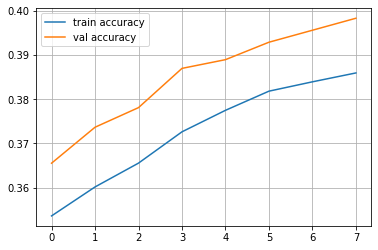

Epoch 8
Train accuracy: 0.3887657058388766
Val accuracy: 0.39876847290640394


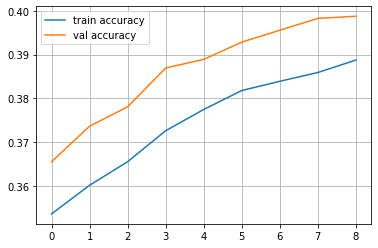

Epoch 9
Train accuracy: 0.3914053426248548
Val accuracy: 0.4002463054187192


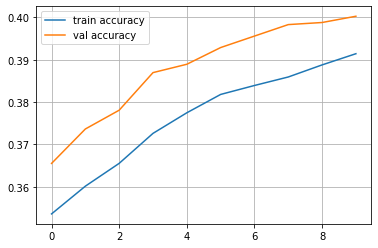

Epoch 10
Train accuracy: 0.3927779537535635
Val accuracy: 0.40246305418719214


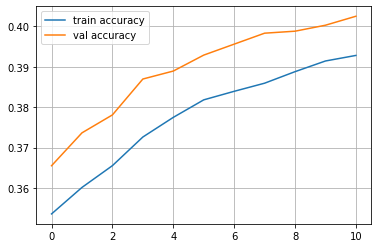

Epoch 11
Train accuracy: 0.3946784922394678
Val accuracy: 0.4022167487684729


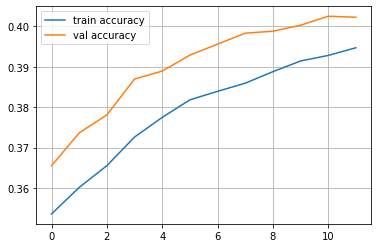

Epoch 12
Train accuracy: 0.39710695808256785
Val accuracy: 0.4027093596059113


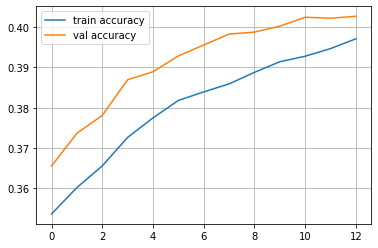

Epoch 13
Train accuracy: 0.39890191109703305
Val accuracy: 0.4044334975369458


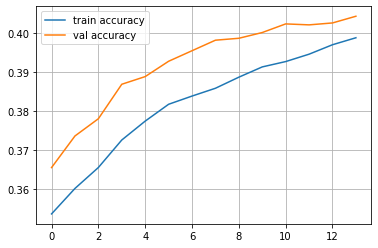

Epoch 14
Train accuracy: 0.40080244958293737
Val accuracy: 0.4056650246305419


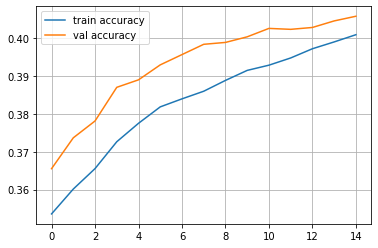

Epoch 15
Train accuracy: 0.4033365008974765
Val accuracy: 0.40763546798029554


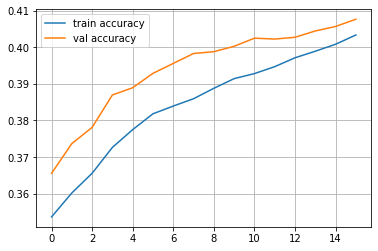

Epoch 16
Train accuracy: 0.40639847956921127
Val accuracy: 0.41083743842364534


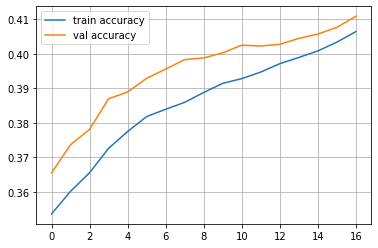

Epoch 17
Train accuracy: 0.41305036426987646
Val accuracy: 0.4189655172413793


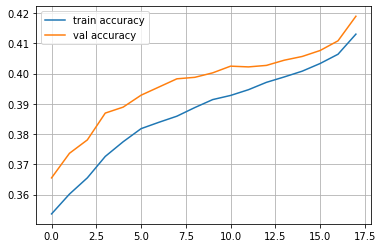

Epoch 18
Train accuracy: 0.4198078344419808
Val accuracy: 0.42684729064039406


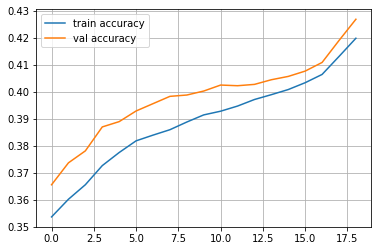

Epoch 19
Train accuracy: 0.4277267447999155
Val accuracy: 0.43349753694581283


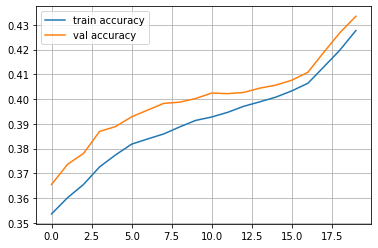

Epoch 20
Train accuracy: 0.4340618730862633
Val accuracy: 0.44113300492610835


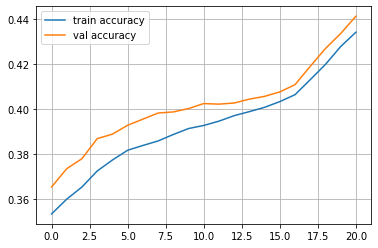

Epoch 21
Train accuracy: 0.44050258684405025
Val accuracy: 0.4463054187192118


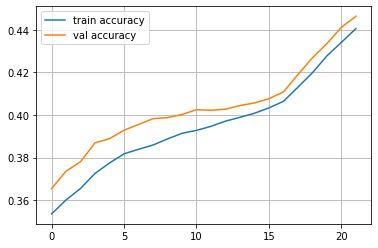

Epoch 22
Train accuracy: 0.44578186041600676
Val accuracy: 0.4539408866995074


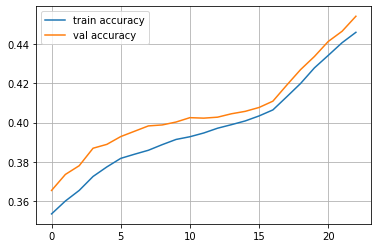

Epoch 23
Train accuracy: 0.4501108647450111
Val accuracy: 0.45935960591133007


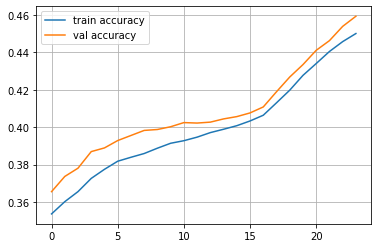

Epoch 24
Train accuracy: 0.4554957237884067
Val accuracy: 0.4645320197044335


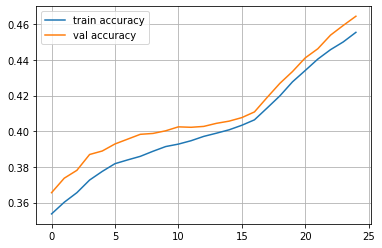

Epoch 25
Train accuracy: 0.4594023862316545
Val accuracy: 0.4665024630541872


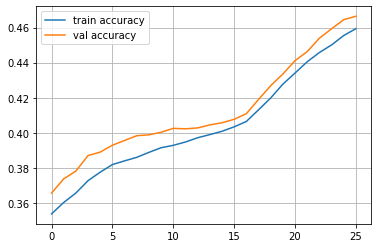

Epoch 26
Train accuracy: 0.46404814697497626
Val accuracy: 0.4689655172413793


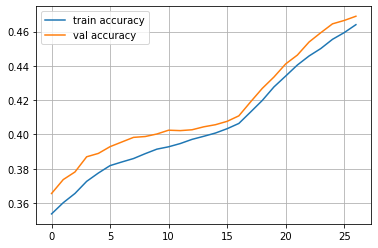

Epoch 27
Train accuracy: 0.4682715658325414
Val accuracy: 0.47339901477832513


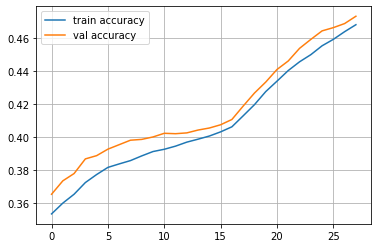

Epoch 28
Train accuracy: 0.4712279590328371
Val accuracy: 0.47463054187192116


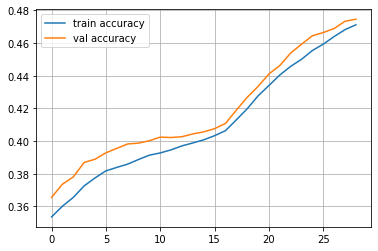

Epoch 29
Train accuracy: 0.47502903600464574
Val accuracy: 0.47832512315270936


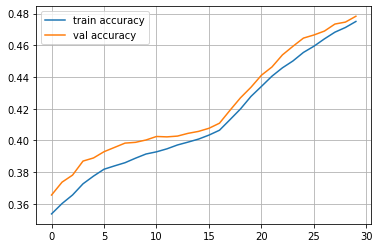

Epoch 30
Train accuracy: 0.4783021856192588
Val accuracy: 0.48004926108374385


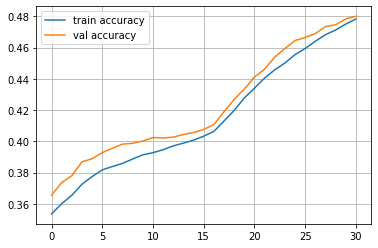

Epoch 31
Train accuracy: 0.4823144335339457
Val accuracy: 0.48201970443349756


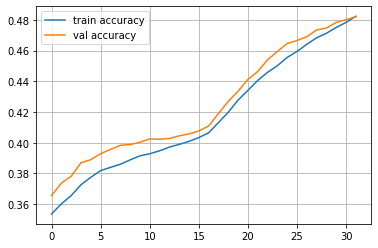

Epoch 32
Train accuracy: 0.4845317284341675
Val accuracy: 0.4834975369458128


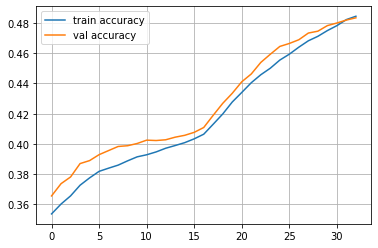

Epoch 33
Train accuracy: 0.4865378523915109
Val accuracy: 0.48423645320197045


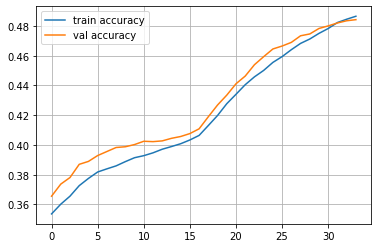

Epoch 34
Train accuracy: 0.4893886601203674
Val accuracy: 0.4886699507389163


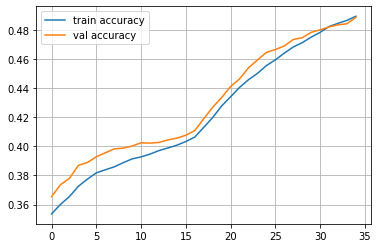

Epoch 35
Train accuracy: 0.49181712596346744
Val accuracy: 0.491871921182266


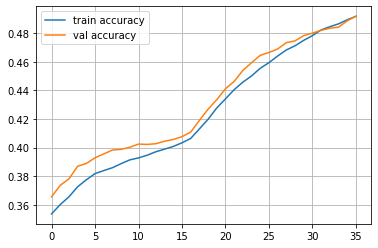

Epoch 36
Train accuracy: 0.4946679336923239
Val accuracy: 0.4933497536945813


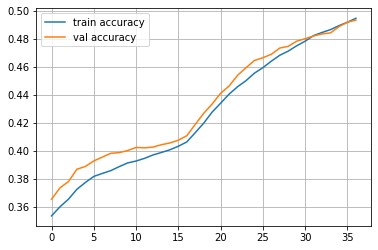

Epoch 37
Train accuracy: 0.49656847217822825
Val accuracy: 0.4963054187192118


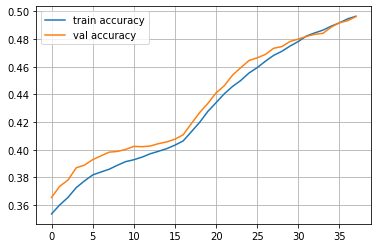

Epoch 38
Train accuracy: 0.49846901066413263
Val accuracy: 0.4982758620689655


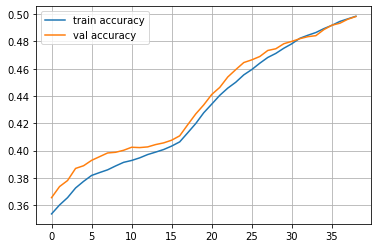

Epoch 39
Train accuracy: 0.5007918910357935
Val accuracy: 0.49975369458128077


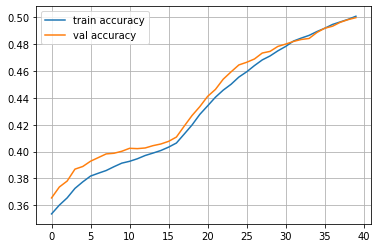

Epoch 40
Train accuracy: 0.5021645021645021
Val accuracy: 0.5022167487684729


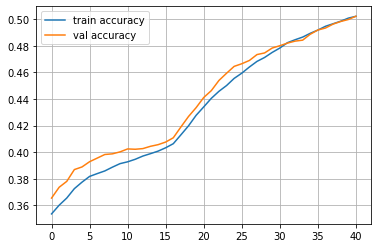

Epoch 41
Train accuracy: 0.5040650406504065
Val accuracy: 0.5039408866995074


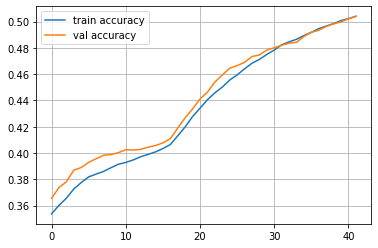

Epoch 42
Train accuracy: 0.5056488227219934
Val accuracy: 0.5056650246305419


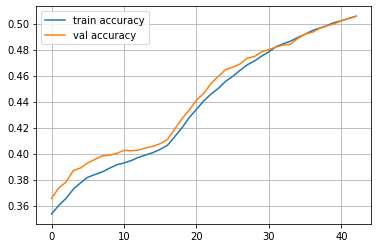

Epoch 43
Train accuracy: 0.5072326047935805
Val accuracy: 0.5066502463054188


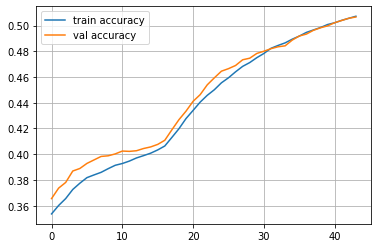

Epoch 44
Train accuracy: 0.5088163868651674
Val accuracy: 0.5071428571428571


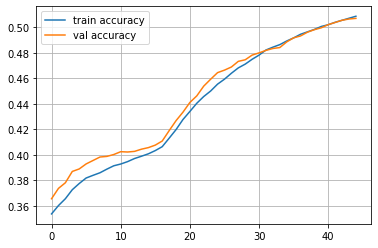

Epoch 45
Train accuracy: 0.5107169253510717
Val accuracy: 0.506896551724138


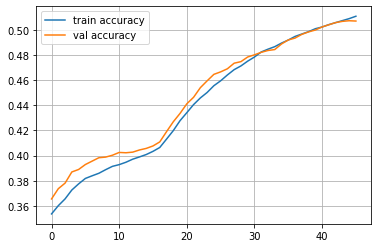

Epoch 46
Train accuracy: 0.5110336817653891
Val accuracy: 0.5078817733990147


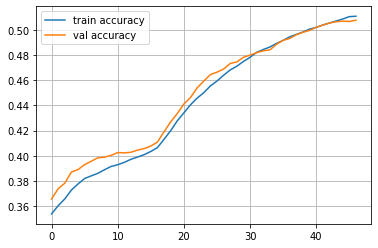

Epoch 47
Train accuracy: 0.5123007074226587
Val accuracy: 0.5088669950738917


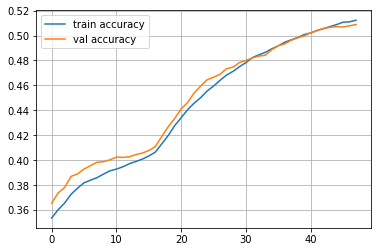

Epoch 48
Train accuracy: 0.5138844894942456
Val accuracy: 0.5105911330049261


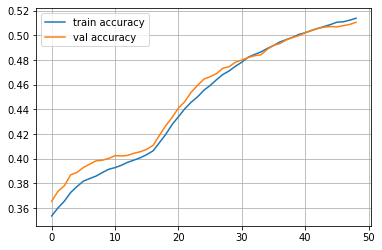

Epoch 49
Train accuracy: 0.5151515151515151
Val accuracy: 0.5110837438423645


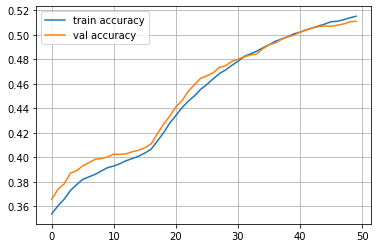

precision: 0.5091800738162889
recall: 0.5103399568706005
f1: 0.508481948166476
accuracy: 0.5110837438423645
Confusion matrix: 
[[871 233 266]
 [223 610 505]
 [429 329 594]]


In [ ]:
from IPython.display import clear_output
import numpy as np

network = MLP([10, 15, 20, 3], len(inputs))

train_log = []
val_log = []

for epoch in range(50):
    network.fit(x_train.astype(float), y_train)
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test) == y_test))
    #clear_output()
    print("Epoch", epoch)
    print("Train accuracy:", train_log[-1])
    print("Val accuracy:", val_log[-1])
    plt.plot(train_log,label = 'train accuracy')
    plt.plot(val_log,label = 'val accuracy')
    plt.legend(loc = 'best')
    plt.grid()
    plt.show()

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

In [ ]:
%%time
from IPython.display import clear_output
import numpy as np

network = MLP([10, 15, 20, 3], len(inputs))

train_log = []
val_log = []

for epoch in range(50):
    network.fit(x_train.astype(float), y_train)
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test) == y_test))

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred)

CPU times: user 20.4 s, sys: 6.03 s, total: 26.5 s
Wall time: 19.7 s


Epoch 0
Train accuracy: 0.3234082990180551
Val accuracy: 0.33423645320197043


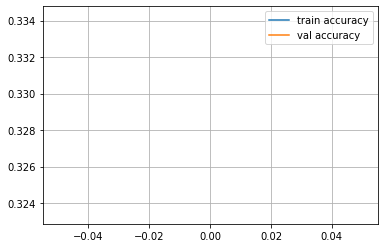

Epoch 1
Train accuracy: 0.3221412733607856
Val accuracy: 0.33251231527093594


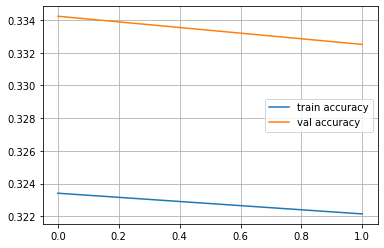

Epoch 2
Train accuracy: 0.3218245169464682
Val accuracy: 0.33201970443349754


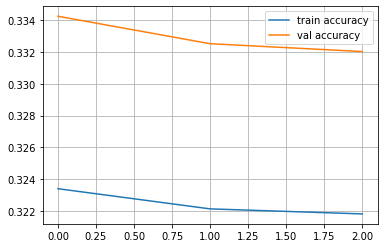

Epoch 3
Train accuracy: 0.3300601837187203
Val accuracy: 0.33916256157635466


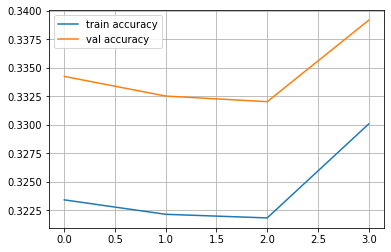

Epoch 4
Train accuracy: 0.3508605215922289
Val accuracy: 0.361576354679803


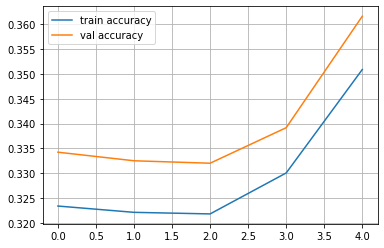

Epoch 5
Train accuracy: 0.36733185513673317
Val accuracy: 0.38152709359605913


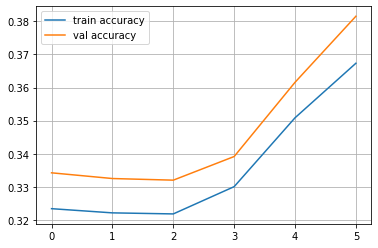

Epoch 6
Train accuracy: 0.3821138211382114
Val accuracy: 0.40295566502463054


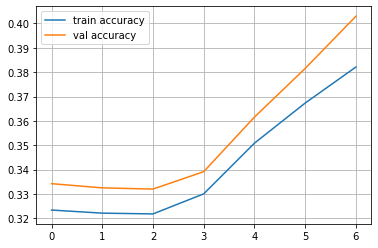

Epoch 7
Train accuracy: 0.39847956921127653
Val accuracy: 0.4142857142857143


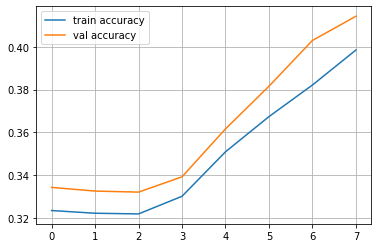

Epoch 8
Train accuracy: 0.4103051420124591
Val accuracy: 0.42142857142857143


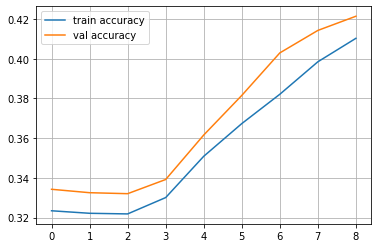

Epoch 9
Train accuracy: 0.4195966634991025
Val accuracy: 0.4273399014778325


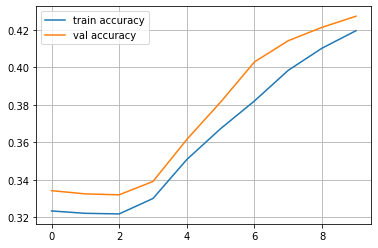

Epoch 10
Train accuracy: 0.4299440397001373
Val accuracy: 0.4396551724137931


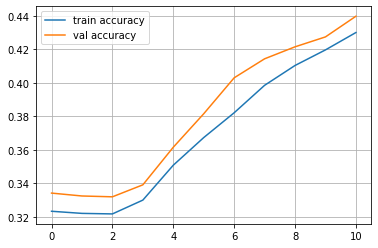

Epoch 11
Train accuracy: 0.4399746594868546
Val accuracy: 0.44852216748768475


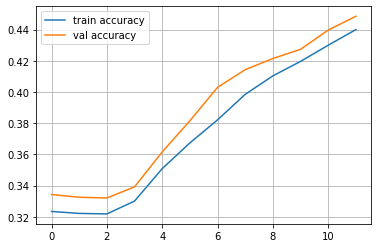

Epoch 12
Train accuracy: 0.448421497201985
Val accuracy: 0.458128078817734


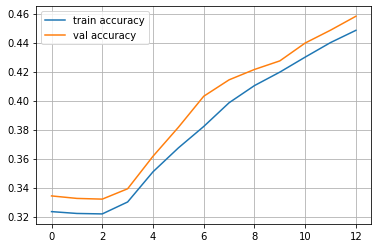

Epoch 13
Train accuracy: 0.4568683349171154
Val accuracy: 0.4677339901477833


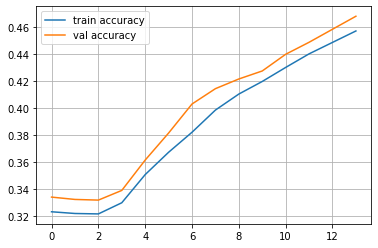

Epoch 14
Train accuracy: 0.4641537324464154
Val accuracy: 0.47635467980295565


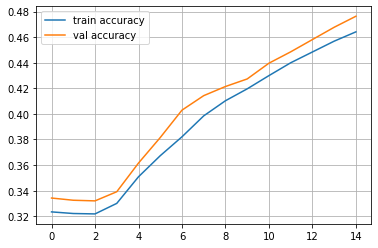

Epoch 15
Train accuracy: 0.47355083940449794
Val accuracy: 0.4862068965517241


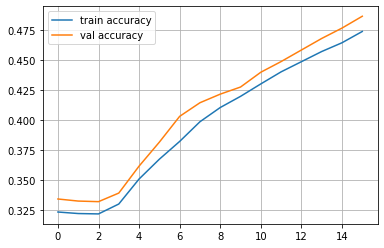

Epoch 16
Train accuracy: 0.4812585788195544
Val accuracy: 0.496551724137931


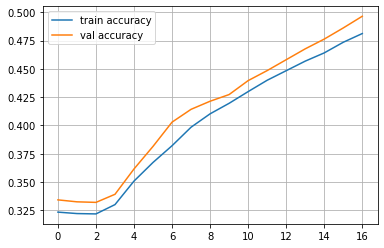

Epoch 17
Train accuracy: 0.48907190370605
Val accuracy: 0.5039408866995074


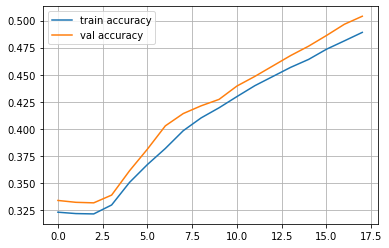

Epoch 18
Train accuracy: 0.49445676274944567
Val accuracy: 0.5078817733990147


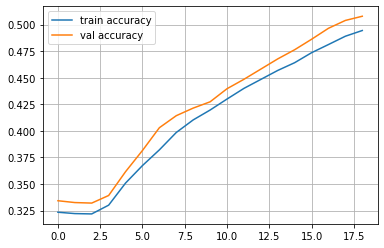

Epoch 19
Train accuracy: 0.4976243268926196
Val accuracy: 0.5118226600985222


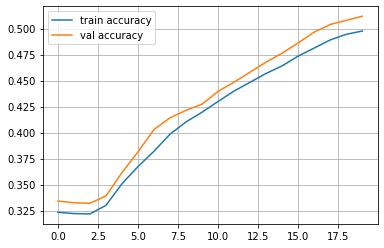

Epoch 20
Train accuracy: 0.49994720726428044
Val accuracy: 0.5113300492610837


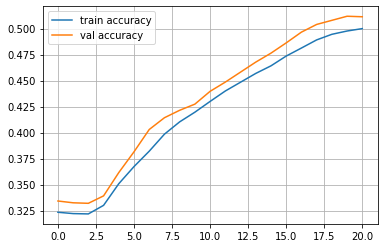

Epoch 21
Train accuracy: 0.502903600464576
Val accuracy: 0.5110837438423645


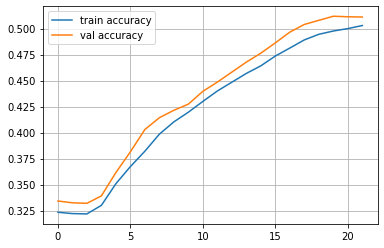

Epoch 22
Train accuracy: 0.5054376517791151
Val accuracy: 0.5135467980295566


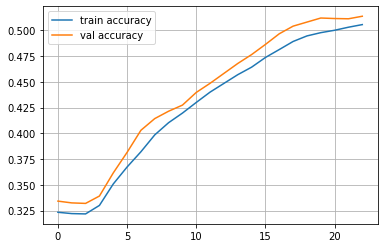

Epoch 23
Train accuracy: 0.5090275578080456
Val accuracy: 0.517487684729064


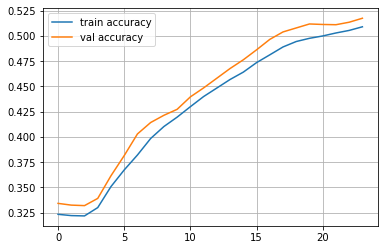

Epoch 24
Train accuracy: 0.5096610706366804
Val accuracy: 0.5197044334975369


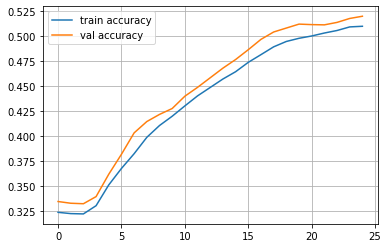

Epoch 25
Train accuracy: 0.5115616091225847
Val accuracy: 0.5194581280788177


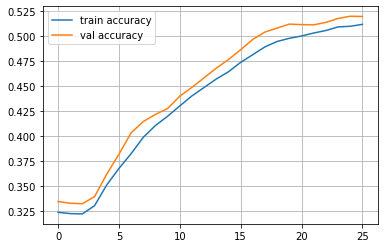

Epoch 26
Train accuracy: 0.5128286347798543
Val accuracy: 0.5204433497536946


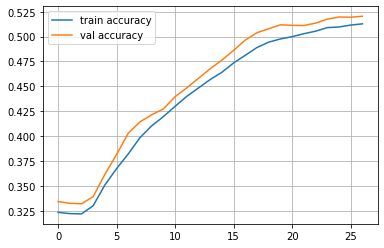

Epoch 27
Train accuracy: 0.5157850279801499
Val accuracy: 0.5251231527093596


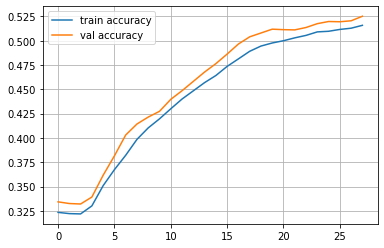

Epoch 28
Train accuracy: 0.5170520536374195
Val accuracy: 0.5263546798029557


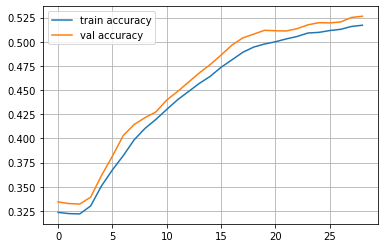

Epoch 29
Train accuracy: 0.5197972758948368
Val accuracy: 0.529064039408867


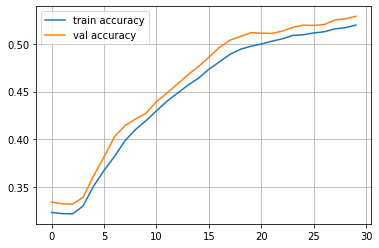

Epoch 30
Train accuracy: 0.5213810579664239
Val accuracy: 0.530295566502463


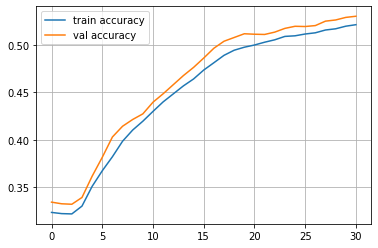

Epoch 31
Train accuracy: 0.5237039383380847
Val accuracy: 0.5288177339901478


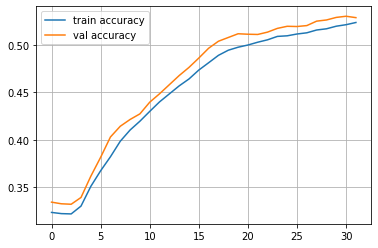

Epoch 32
Train accuracy: 0.5251821349382325
Val accuracy: 0.5305418719211823


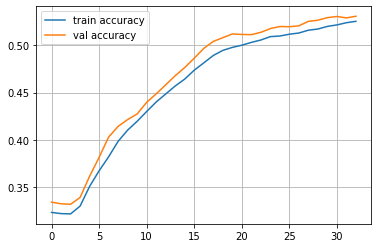

Epoch 33
Train accuracy: 0.5284552845528455
Val accuracy: 0.5330049261083744


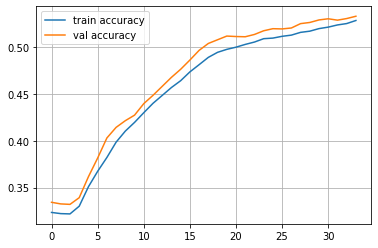

Epoch 34
Train accuracy: 0.5303558230387498
Val accuracy: 0.533743842364532


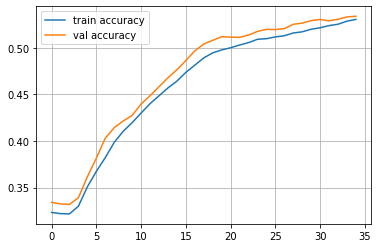

Epoch 35
Train accuracy: 0.5317284341674585
Val accuracy: 0.5347290640394089


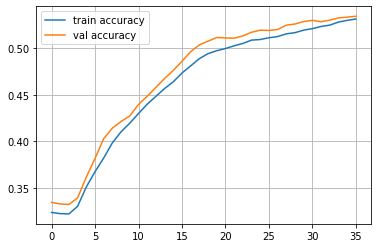

Epoch 36
Train accuracy: 0.5329954598247281
Val accuracy: 0.5349753694581281


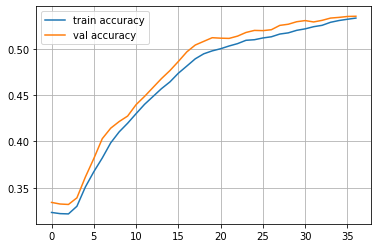

Epoch 37
Train accuracy: 0.5345792418963151
Val accuracy: 0.5369458128078818


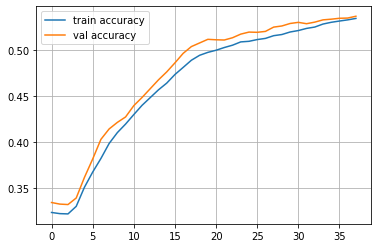

Epoch 38
Train accuracy: 0.5350015837820716
Val accuracy: 0.5391625615763547


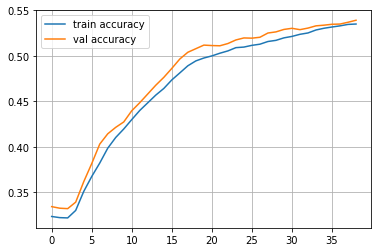

Epoch 39
Train accuracy: 0.5363741949107803
Val accuracy: 0.5403940886699508


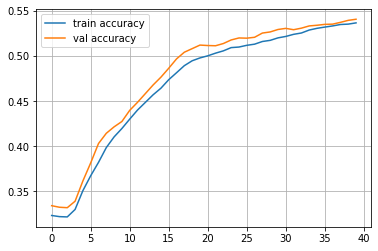

Epoch 40
Train accuracy: 0.5378523915109281
Val accuracy: 0.5406403940886699


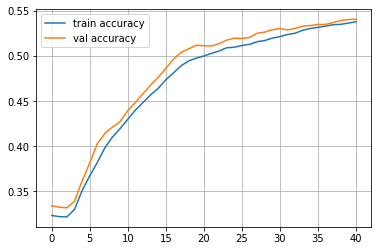

Epoch 41
Train accuracy: 0.5380635624538064
Val accuracy: 0.5411330049261084


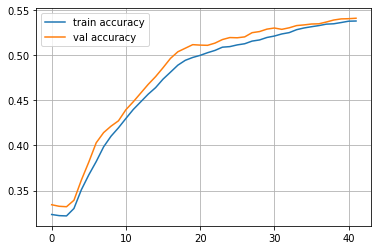

Epoch 42
Train accuracy: 0.5390138316967585
Val accuracy: 0.5428571428571428


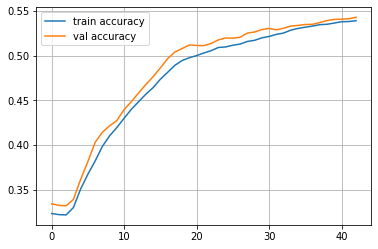

Epoch 43
Train accuracy: 0.5404920282969063
Val accuracy: 0.5426108374384236


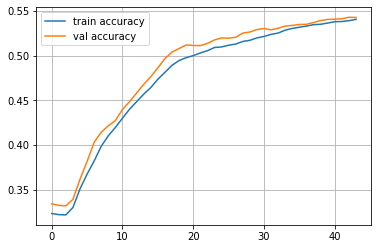

Epoch 44
Train accuracy: 0.5424981522542498
Val accuracy: 0.545320197044335


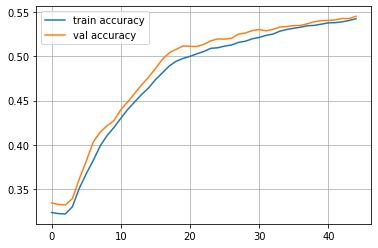

Epoch 45
Train accuracy: 0.5441875197972759
Val accuracy: 0.5470443349753694


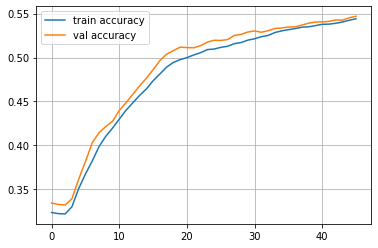

Epoch 46
Train accuracy: 0.5436595924400802
Val accuracy: 0.548768472906404


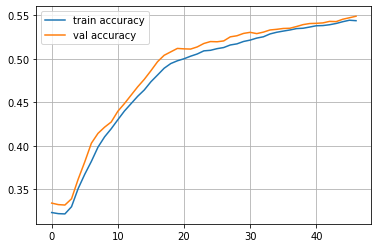

Epoch 47
Train accuracy: 0.5441875197972759
Val accuracy: 0.5485221674876847


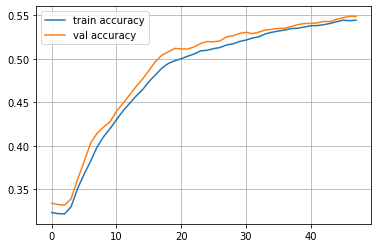

Epoch 48
Train accuracy: 0.5464048146974976
Val accuracy: 0.547783251231527


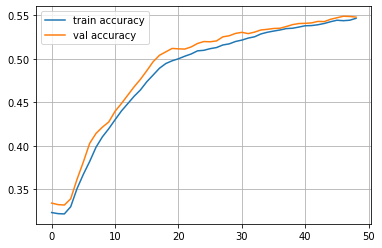

Epoch 49
Train accuracy: 0.5484109386548411
Val accuracy: 0.5472906403940887


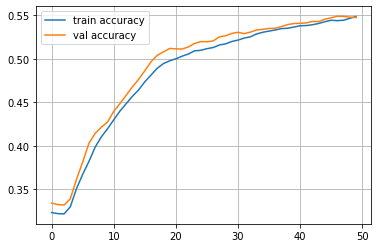

Epoch 50
Train accuracy: 0.5492556224263542
Val accuracy: 0.5497536945812808


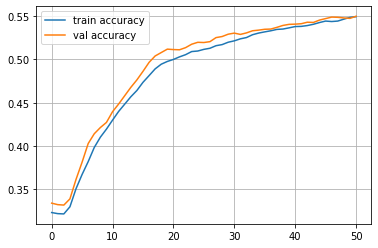

Epoch 51
Train accuracy: 0.5509449899693802
Val accuracy: 0.554679802955665


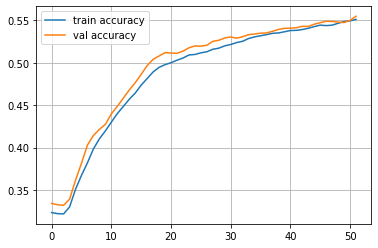

Epoch 52
Train accuracy: 0.5501003061978672
Val accuracy: 0.5536945812807882


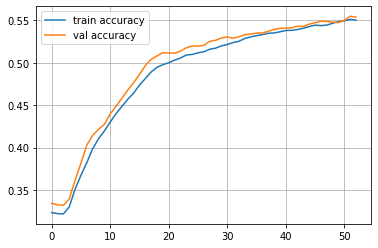

Epoch 53
Train accuracy: 0.5516840882694541
Val accuracy: 0.5556650246305419


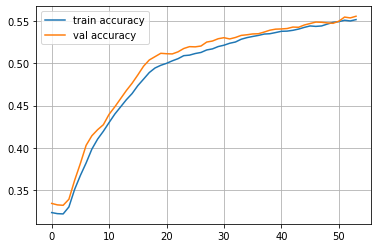

Epoch 54
Train accuracy: 0.551578502798015
Val accuracy: 0.5583743842364532


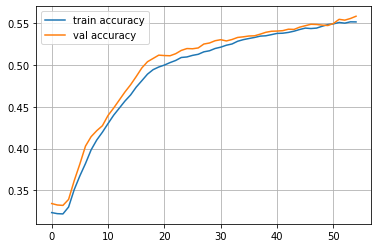

Epoch 55
Train accuracy: 0.5522120156266498
Val accuracy: 0.5588669950738916


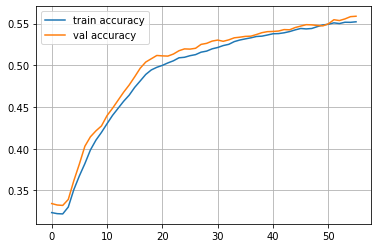

Epoch 56
Train accuracy: 0.5541125541125541
Val accuracy: 0.5613300492610838


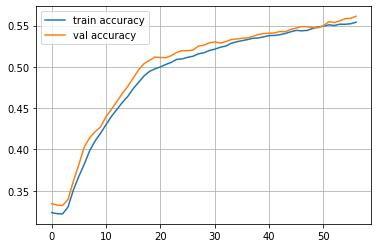

Epoch 57
Train accuracy: 0.555696336184141
Val accuracy: 0.5623152709359606


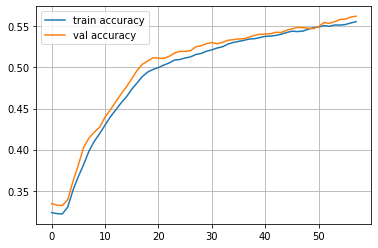

Epoch 58
Train accuracy: 0.5550628233555063
Val accuracy: 0.5625615763546798


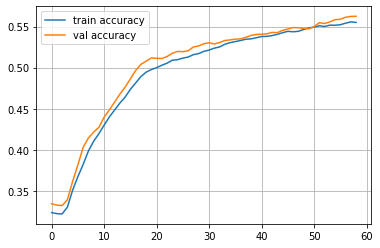

Epoch 59
Train accuracy: 0.5566466054270932
Val accuracy: 0.5620689655172414


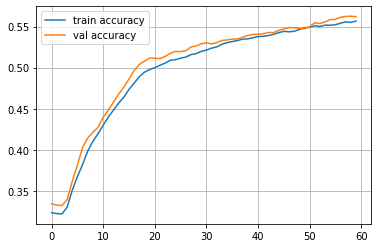

Epoch 60
Train accuracy: 0.5578080456129236
Val accuracy: 0.5633004926108375


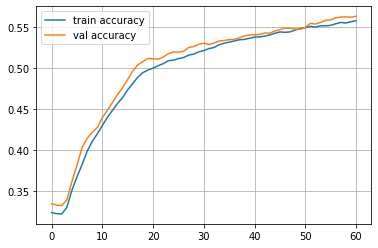

Epoch 61
Train accuracy: 0.5596029986273888
Val accuracy: 0.5635467980295567


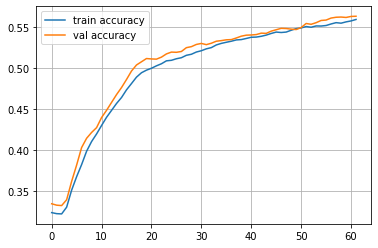

Epoch 62
Train accuracy: 0.5598141695702671
Val accuracy: 0.5652709359605911


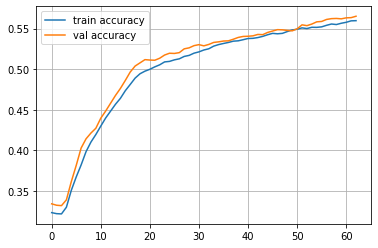

Epoch 63
Train accuracy: 0.5593918276845106
Val accuracy: 0.5665024630541872


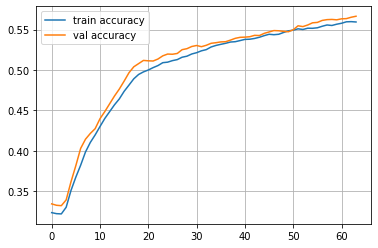

Epoch 64
Train accuracy: 0.5609756097560976
Val accuracy: 0.569704433497537


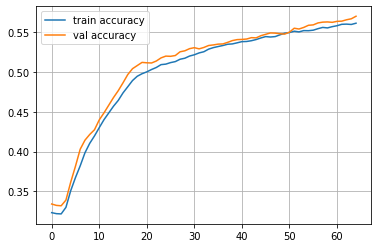

Epoch 65
Train accuracy: 0.5608700242846585
Val accuracy: 0.5684729064039409


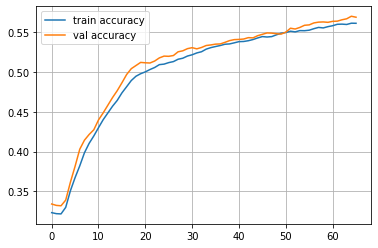

Epoch 66
Train accuracy: 0.5616091225847324
Val accuracy: 0.569704433497537


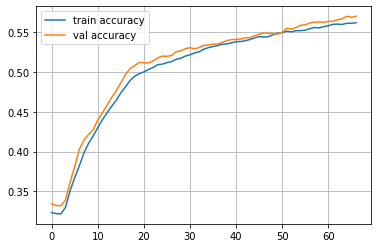

Epoch 67
Train accuracy: 0.5632984901277585
Val accuracy: 0.5694581280788177


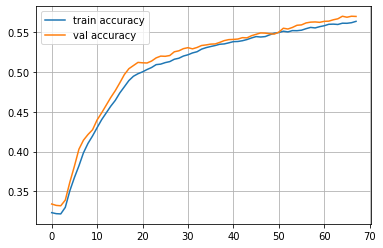

Epoch 68
Train accuracy: 0.563720832013515
Val accuracy: 0.569704433497537


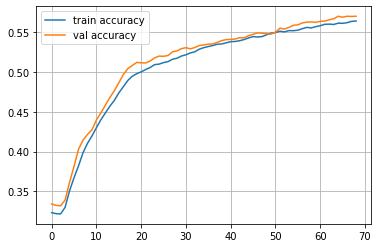

Epoch 69
Train accuracy: 0.5642487593707106
Val accuracy: 0.5706896551724138


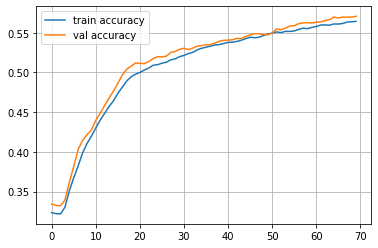

Epoch 70
Train accuracy: 0.5651990286136628
Val accuracy: 0.5729064039408867


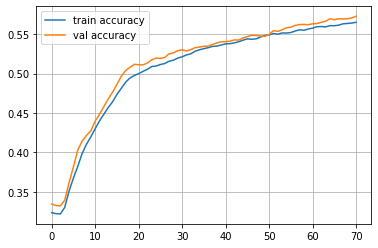

Epoch 71
Train accuracy: 0.565410199556541
Val accuracy: 0.5733990147783251


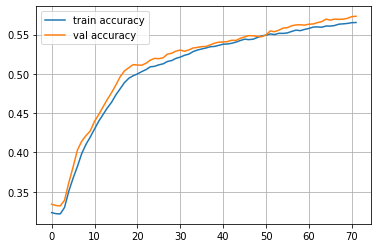

Epoch 72
Train accuracy: 0.5667828106852497
Val accuracy: 0.5726600985221675


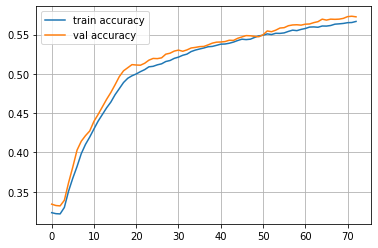

Epoch 73
Train accuracy: 0.5666772252138106
Val accuracy: 0.5733990147783251


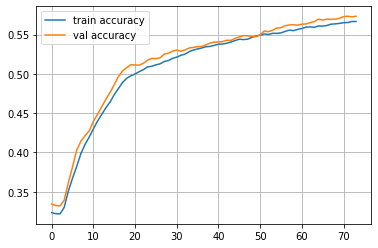

Epoch 74
Train accuracy: 0.5672051525710062
Val accuracy: 0.5733990147783251


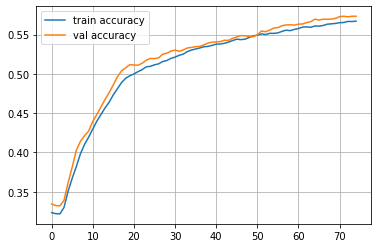

Epoch 75
Train accuracy: 0.5682610072853975
Val accuracy: 0.5741379310344827


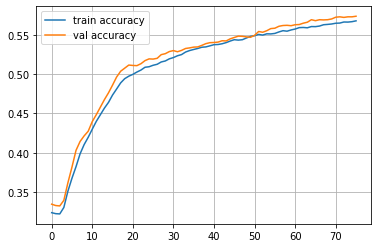

Epoch 76
Train accuracy: 0.5692112765283497
Val accuracy: 0.5729064039408867


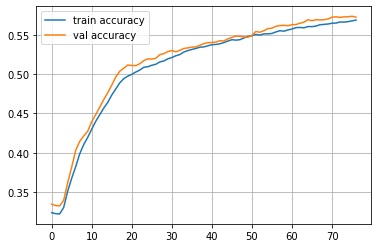

Epoch 77
Train accuracy: 0.5712174004856931
Val accuracy: 0.5753694581280788


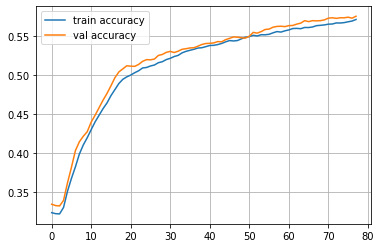

Epoch 78
Train accuracy: 0.5718509133143279
Val accuracy: 0.5763546798029556


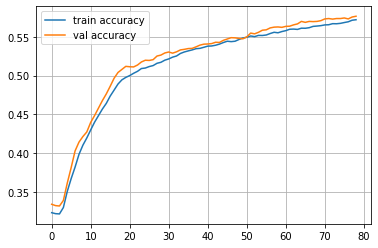

Epoch 79
Train accuracy: 0.5731179389715975
Val accuracy: 0.5763546798029556


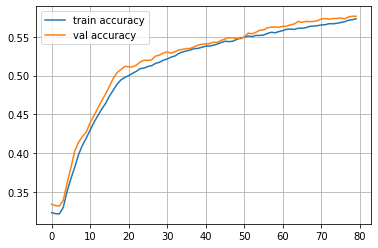

Epoch 80
Train accuracy: 0.5741737936859888
Val accuracy: 0.5766009852216749


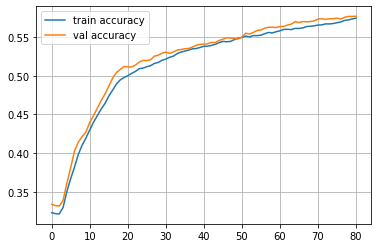

Epoch 81
Train accuracy: 0.5756519902861367
Val accuracy: 0.5785714285714286


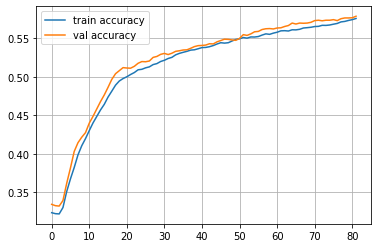

Epoch 82
Train accuracy: 0.5763910885862106
Val accuracy: 0.5788177339901478


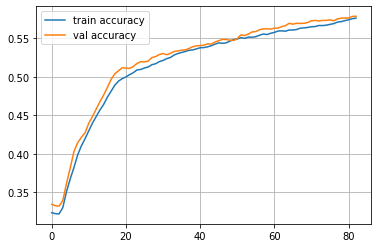

Epoch 83
Train accuracy: 0.5762855031147714
Val accuracy: 0.5785714285714286


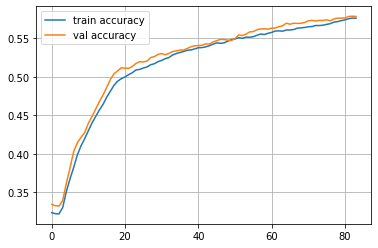

Epoch 84
Train accuracy: 0.5763910885862106
Val accuracy: 0.5780788177339902


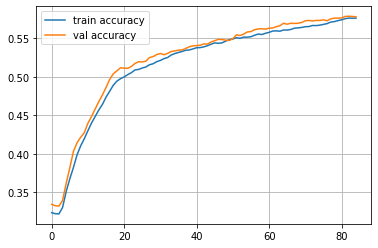

Epoch 85
Train accuracy: 0.5771301868862845
Val accuracy: 0.5773399014778325


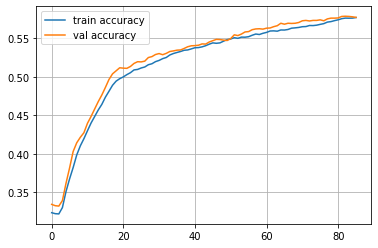

Epoch 86
Train accuracy: 0.5786083834864323
Val accuracy: 0.5785714285714286


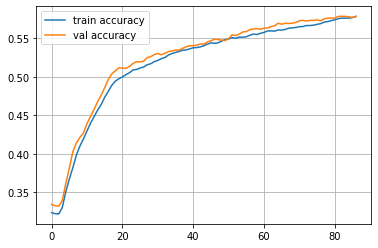

Epoch 87
Train accuracy: 0.5786083834864323
Val accuracy: 0.5802955665024631


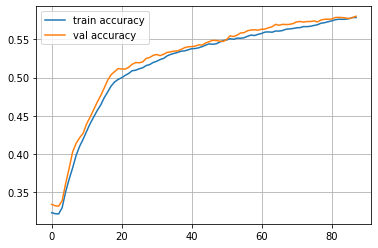

Epoch 88
Train accuracy: 0.5792418963150671
Val accuracy: 0.5800492610837439


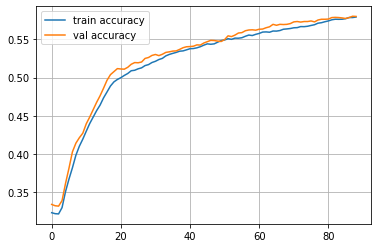

Epoch 89
Train accuracy: 0.5794530672579453
Val accuracy: 0.5812807881773399


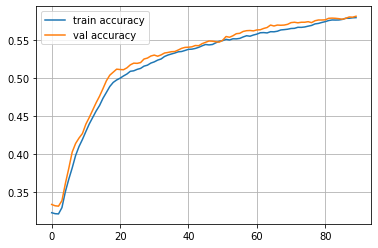

precision: 0.5753595832083325
recall: 0.5802182438345677
f1: 0.5655075428967368
accuracy: 0.5812807881773399
Confusion matrix: 
[[ 853  257  260]
 [ 330  437  571]
 [  87  195 1070]]


In [ ]:
from IPython.display import clear_output
import numpy as np

network = MLP([10, 15, 20, 3], len(inputs))

train_log = []
val_log = []

for epoch in range(90):
    network.fit(x_train.astype(float), y_train)
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test) == y_test))
    #clear_output()
    print("Epoch", epoch)
    print("Train accuracy:", train_log[-1])
    print("Val accuracy:", val_log[-1])
    plt.plot(train_log,label = 'train accuracy')
    plt.plot(val_log,label = 'val accuracy')
    plt.legend(loc = 'best')
    plt.grid()
    plt.show()

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

In [ ]:
%%time
from IPython.display import clear_output
import numpy as np

network = MLP([10, 15, 20, 3], len(inputs))

train_log = []
val_log = []

for epoch in range(90):
    network.fit(x_train.astype(float), y_train)
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test) == y_test))

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred)

CPU times: user 41.2 s, sys: 11.4 s, total: 52.6 s
Wall time: 40.3 s


Epoch 0
Train accuracy: 0.34389188047724634
Val accuracy: 0.35467980295566504


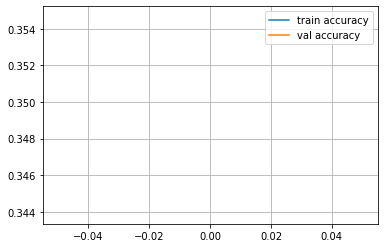

Epoch 1
Train accuracy: 0.3681765389082462
Val accuracy: 0.38029556650246304


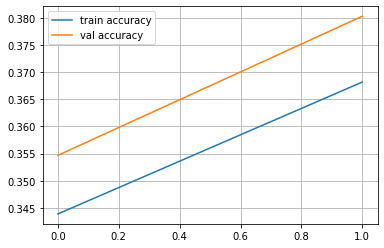

Epoch 2
Train accuracy: 0.38961038961038963
Val accuracy: 0.40320197044334977


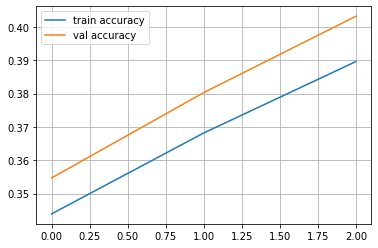

Epoch 3
Train accuracy: 0.4122056804983634
Val accuracy: 0.42512315270935963


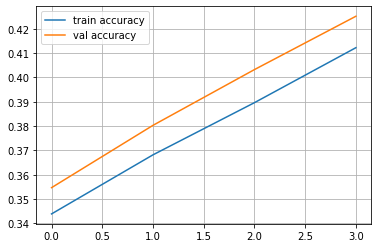

Epoch 4
Train accuracy: 0.43564565515785025
Val accuracy: 0.4541871921182266


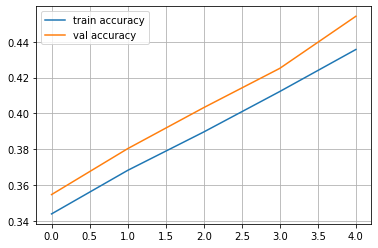

Epoch 5
Train accuracy: 0.4575018477457502
Val accuracy: 0.48004926108374385


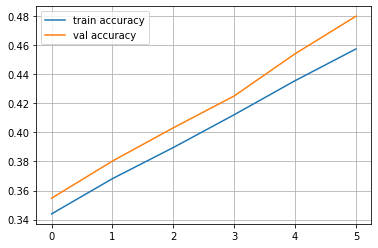

Epoch 6
Train accuracy: 0.47914686939077183
Val accuracy: 0.5


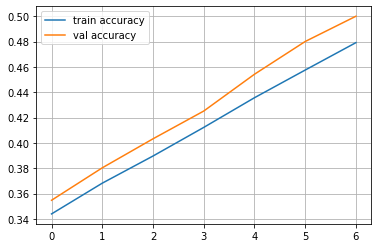

Epoch 7
Train accuracy: 0.5025868440502587
Val accuracy: 0.5229064039408867


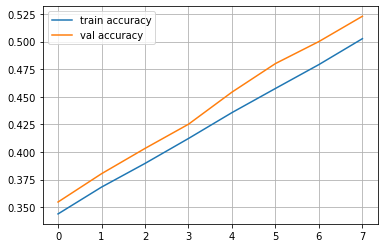

Epoch 8
Train accuracy: 0.5209587160806674
Val accuracy: 0.5366995073891626


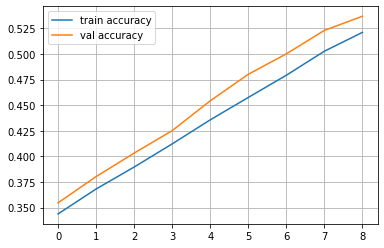

Epoch 9
Train accuracy: 0.5396473445253933
Val accuracy: 0.5492610837438424


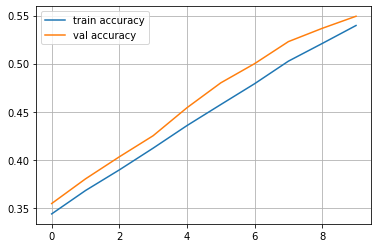

Epoch 10
Train accuracy: 0.554851652412628
Val accuracy: 0.5645320197044335


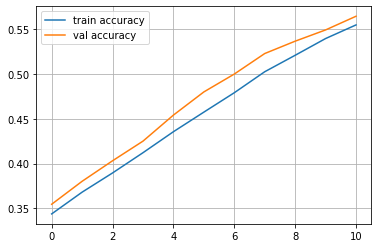

Epoch 11
Train accuracy: 0.5664660542709323
Val accuracy: 0.5793103448275863


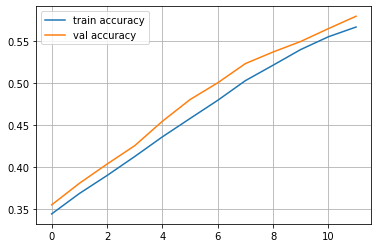

Epoch 12
Train accuracy: 0.579980994615141
Val accuracy: 0.5972906403940886


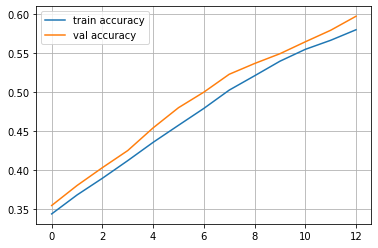

Epoch 13
Train accuracy: 0.5939182768451061
Val accuracy: 0.6086206896551725


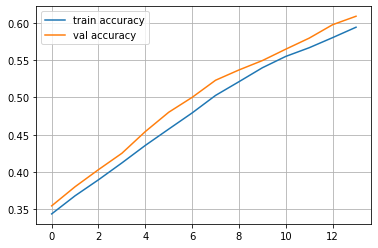

Epoch 14
Train accuracy: 0.6034209692746278
Val accuracy: 0.6206896551724138


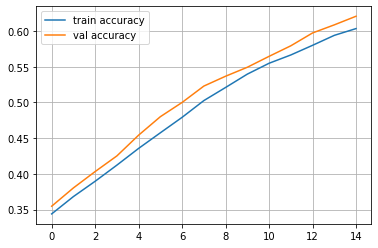

precision: 0.6262732536245955
recall: 0.6196164765479506
f1: 0.6156499610479168
accuracy: 0.6206896551724138
Confusion matrix: 
[[1018  156  196]
 [ 499  625  214]
 [ 250  225  877]]


In [ ]:
from IPython.display import clear_output
import numpy as np

network = MLP([100, 150, 200, 3], len(inputs))

train_log = []
val_log = []

for epoch in range(15):
    network.fit(x_train.astype(float), y_train)
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test) == y_test))
    #clear_output()
    print("Epoch", epoch)
    print("Train accuracy:", train_log[-1])
    print("Val accuracy:", val_log[-1])
    plt.plot(train_log,label = 'train accuracy')
    plt.plot(val_log,label = 'val accuracy')
    plt.legend(loc = 'best')
    plt.grid()
    plt.show()

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

In [ ]:
%%time
from IPython.display import clear_output
import numpy as np

network = MLP([100, 150, 200, 3], len(inputs))

train_log = []
val_log = []

for epoch in range(15):
    network.fit(x_train.astype(float), y_train)
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test) == y_test))

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred)

CPU times: user 7min 26s, sys: 6.34 s, total: 7min 33s
Wall time: 7min 27s


### Βήμα εκπαίδευσης



#### learning_rate = 0.01





Epoch 0
Train accuracy: 0.3403019744483159
Val accuracy: 0.3295566502463054


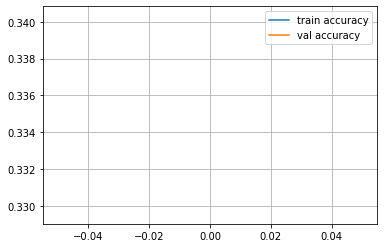

Epoch 1
Train accuracy: 0.3403019744483159
Val accuracy: 0.3295566502463054


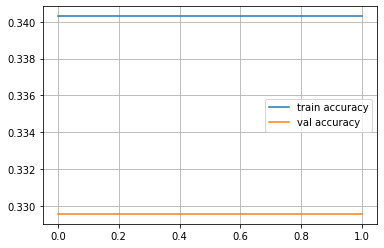

Epoch 2
Train accuracy: 0.34051314539119415
Val accuracy: 0.3293103448275862


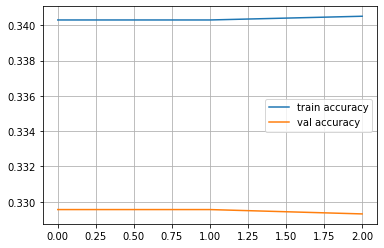

Epoch 3
Train accuracy: 0.34051314539119415
Val accuracy: 0.33004926108374383


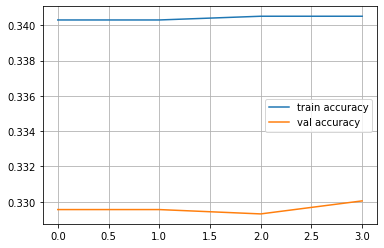

Epoch 4
Train accuracy: 0.4713335445042762
Val accuracy: 0.4766009852216749


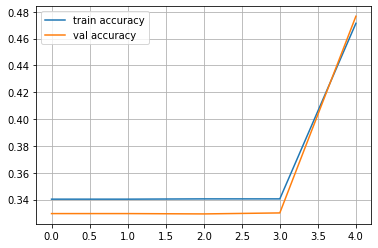

Epoch 5
Train accuracy: 0.47186147186147187
Val accuracy: 0.4770935960591133


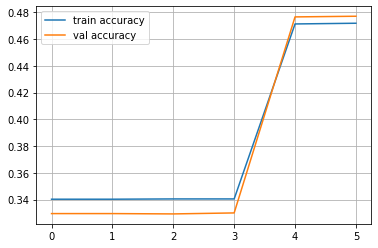

Epoch 6
Train accuracy: 0.4716503009185936
Val accuracy: 0.47586206896551725


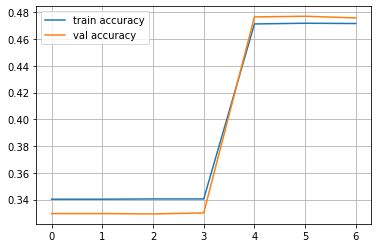

Epoch 7
Train accuracy: 0.4708056171470806
Val accuracy: 0.47339901477832513


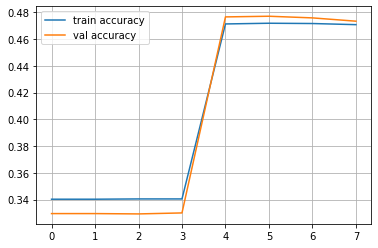

Epoch 8
Train accuracy: 0.47038327526132406
Val accuracy: 0.47586206896551725


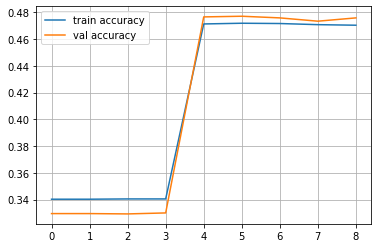

Epoch 9
Train accuracy: 0.4704888607327632
Val accuracy: 0.47339901477832513


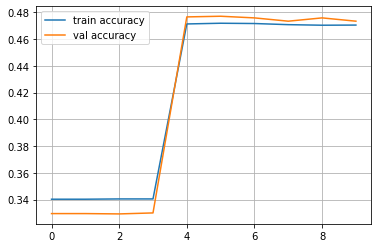

Epoch 10
Train accuracy: 0.4697497624326893
Val accuracy: 0.4719211822660099


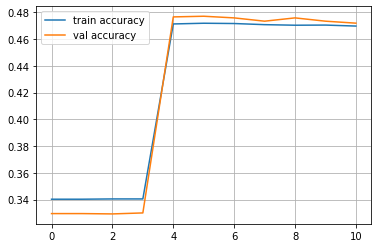

Epoch 11
Train accuracy: 0.46911624960405446
Val accuracy: 0.47216748768472905


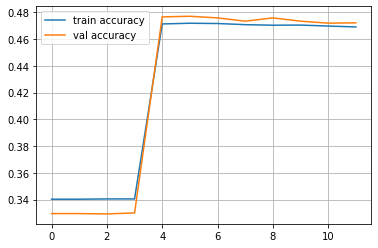

Epoch 12
Train accuracy: 0.46763805300390665
Val accuracy: 0.46995073891625616


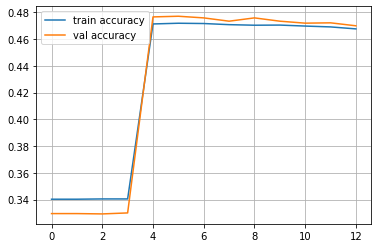

Epoch 13
Train accuracy: 0.4670045401752719
Val accuracy: 0.46921182266009853


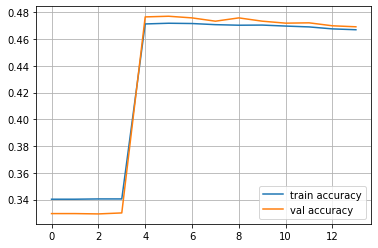

Epoch 14
Train accuracy: 0.4663710273466371
Val accuracy: 0.46748768472906405


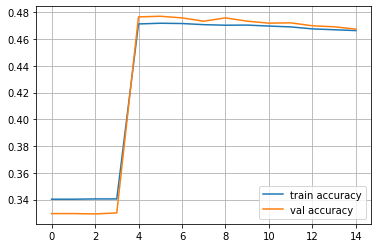

Epoch 15
Train accuracy: 0.46552634357512407
Val accuracy: 0.46921182266009853


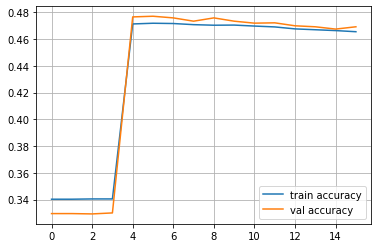

Epoch 16
Train accuracy: 0.4657375145180023
Val accuracy: 0.4672413793103448


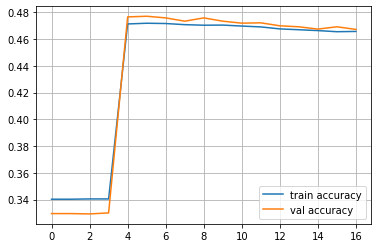

Epoch 17
Train accuracy: 0.4652095871608067
Val accuracy: 0.4667487684729064


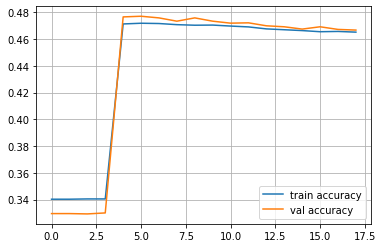

Epoch 18
Train accuracy: 0.46468165980361104
Val accuracy: 0.4682266009852217


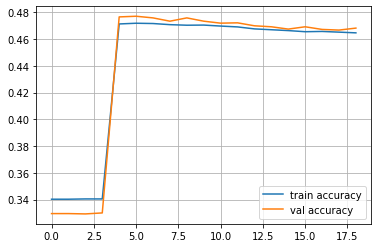

Epoch 19
Train accuracy: 0.4657375145180023
Val accuracy: 0.4677339901477833


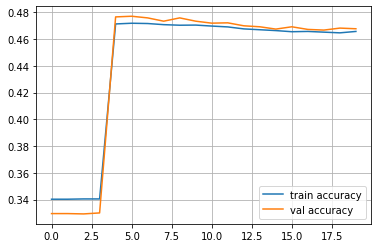

Epoch 20
Train accuracy: 0.4657375145180023
Val accuracy: 0.4677339901477833


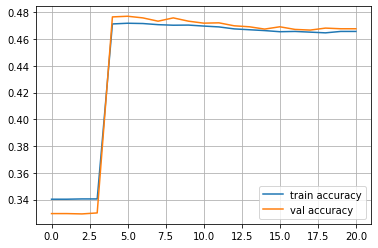

Epoch 21
Train accuracy: 0.4657375145180023
Val accuracy: 0.4667487684729064


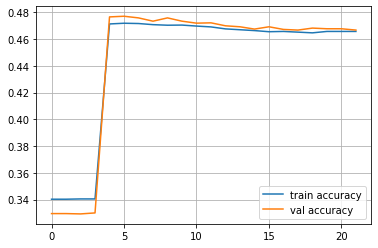

Epoch 22
Train accuracy: 0.4657375145180023
Val accuracy: 0.4660098522167488


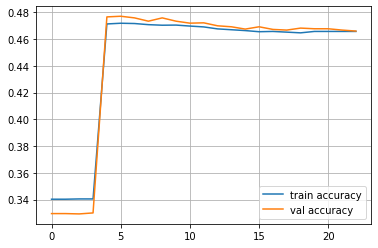

Epoch 23
Train accuracy: 0.4660542709323197
Val accuracy: 0.4647783251231527


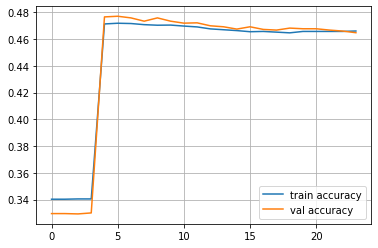

Epoch 24
Train accuracy: 0.46584309998944146
Val accuracy: 0.4640394088669951


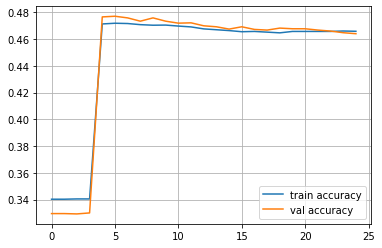

precision: 0.6139045780096081
recall: 0.46688749679322816
f1: 0.3847623363050918
accuracy: 0.4640394088669951
Confusion matrix: 
[[  21 1074  275]
 [   3  953  382]
 [   0  442  910]]


In [ ]:
from IPython.display import clear_output
import numpy as np

network = MLP([10, 15, 20, 3], len(inputs))

train_log = []
val_log = []

for epoch in range(25):
    network.fit(x_train.astype(float), y_train)
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test) == y_test))
    #clear_output()
    print("Epoch", epoch)
    print("Train accuracy:", train_log[-1])
    print("Val accuracy:", val_log[-1])
    plt.plot(train_log,label = 'train accuracy')
    plt.plot(val_log,label = 'val accuracy')
    plt.legend(loc = 'best')
    plt.grid()
    plt.show()

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

In [ ]:
%%time
from IPython.display import clear_output
import numpy as np

network = MLP([10, 15, 20, 3], len(inputs))

train_log = []
val_log = []

for epoch in range(25):
    network.fit(x_train.astype(float), y_train)
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test) == y_test))

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred)

CPU times: user 10.6 s, sys: 2.9 s, total: 13.5 s
Wall time: 10.2 s




#### learning_rate = 0.025





Epoch 0
Train accuracy: 0.30556435434484214
Val accuracy: 0.30935960591133005


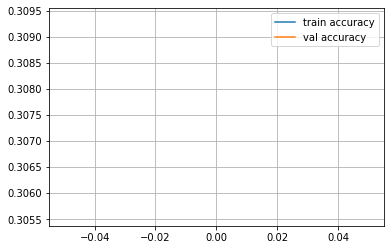

Epoch 1
Train accuracy: 0.31717875620314645
Val accuracy: 0.32142857142857145


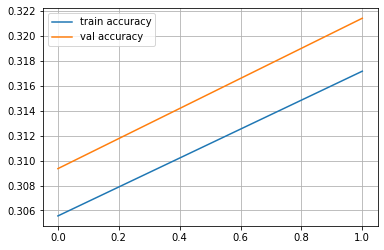

Epoch 2
Train accuracy: 0.32530883750395945
Val accuracy: 0.3246305418719212


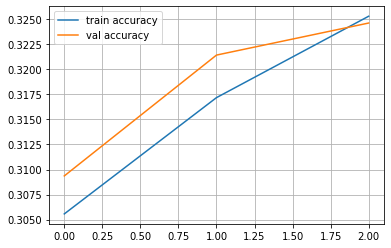

Epoch 3
Train accuracy: 0.33132720937598986
Val accuracy: 0.33029556650246306


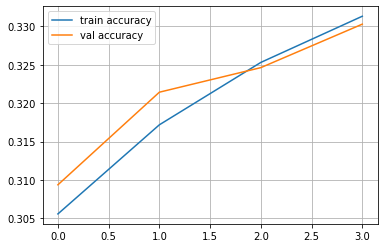

Epoch 4
Train accuracy: 0.3343891880477246
Val accuracy: 0.33399014778325126


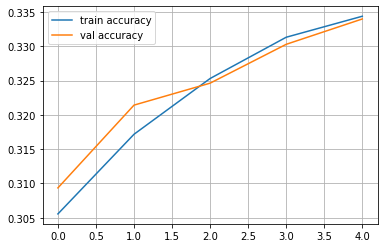

Epoch 5
Train accuracy: 0.3380846795480942
Val accuracy: 0.3374384236453202


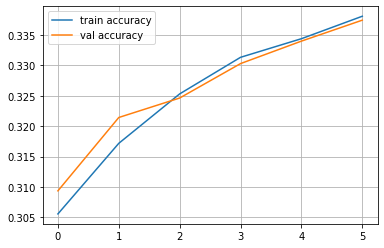

Epoch 6
Train accuracy: 0.34494773519163763
Val accuracy: 0.34064039408867


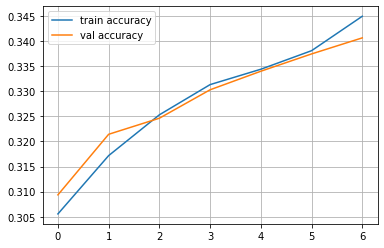

Epoch 7
Train accuracy: 0.35286664554957237
Val accuracy: 0.3458128078817734


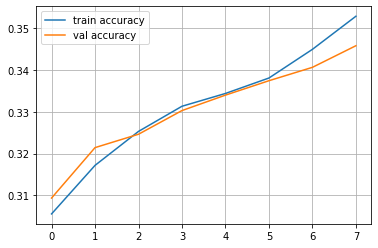

Epoch 8
Train accuracy: 0.360679970436068
Val accuracy: 0.35467980295566504


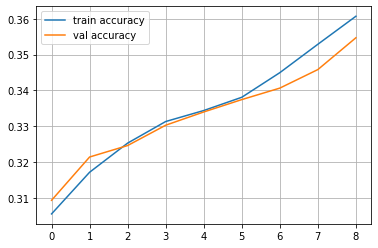

Epoch 9
Train accuracy: 0.3700770773941506
Val accuracy: 0.3625615763546798


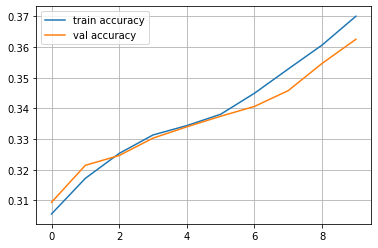

Epoch 10
Train accuracy: 0.38137472283813745
Val accuracy: 0.37561576354679804


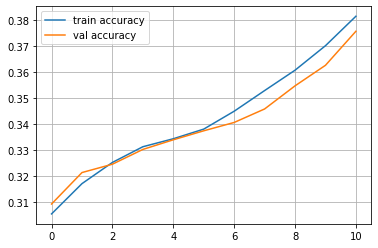

Epoch 11
Train accuracy: 0.3909830007390983
Val accuracy: 0.3852216748768473


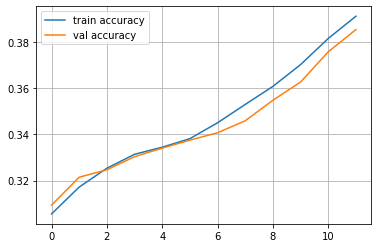

Epoch 12
Train accuracy: 0.40038010769718085
Val accuracy: 0.3958128078817734


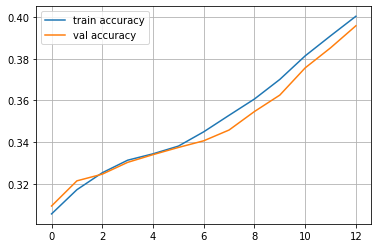

Epoch 13
Train accuracy: 0.40819343258367646
Val accuracy: 0.4041871921182266


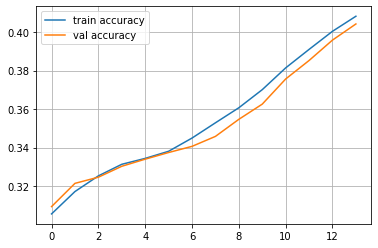

Epoch 14
Train accuracy: 0.41452856087002427
Val accuracy: 0.4100985221674877


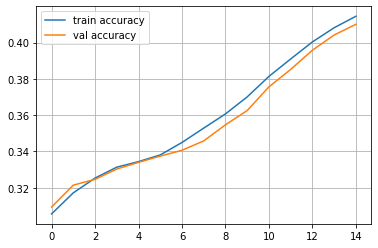

Epoch 15
Train accuracy: 0.41927990708478513
Val accuracy: 0.4169950738916256


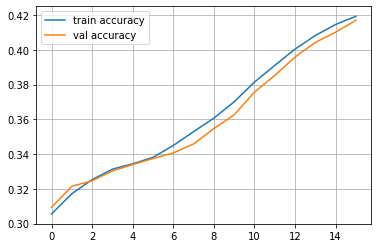

Epoch 16
Train accuracy: 0.42392566782810687
Val accuracy: 0.4204433497536946


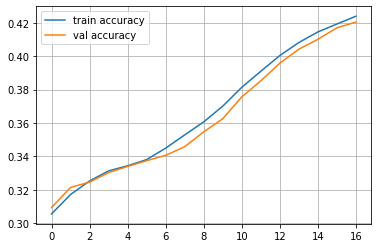

Epoch 17
Train accuracy: 0.4280435012142329
Val accuracy: 0.4270935960591133


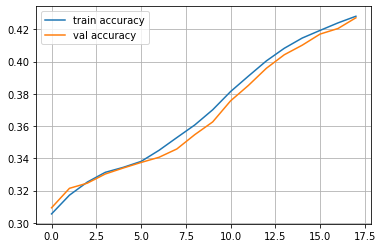

Epoch 18
Train accuracy: 0.43237250554323725
Val accuracy: 0.4330049261083744


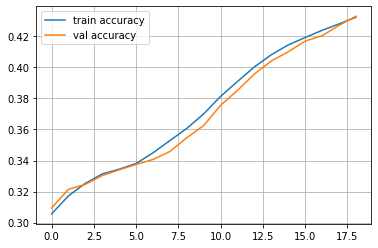

Epoch 19
Train accuracy: 0.4355400696864111
Val accuracy: 0.437192118226601


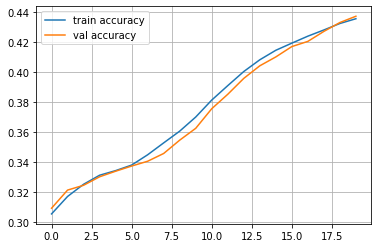

Epoch 20
Train accuracy: 0.43828529194382854
Val accuracy: 0.4396551724137931


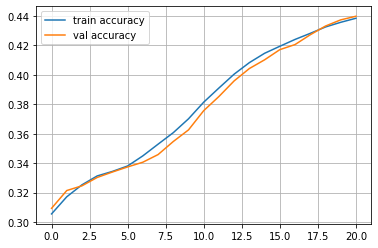

Epoch 21
Train accuracy: 0.4414528560870024
Val accuracy: 0.4413793103448276


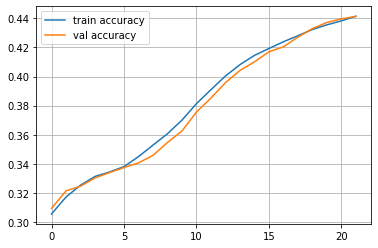

Epoch 22
Train accuracy: 0.4458874458874459
Val accuracy: 0.44285714285714284


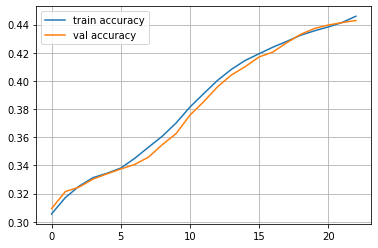

Epoch 23
Train accuracy: 0.448421497201985
Val accuracy: 0.44532019704433495


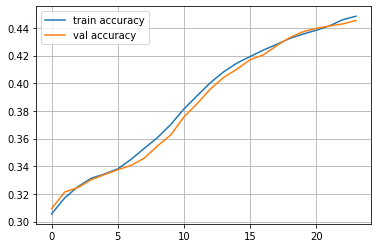

Epoch 24
Train accuracy: 0.45127230493084153
Val accuracy: 0.4480295566502463


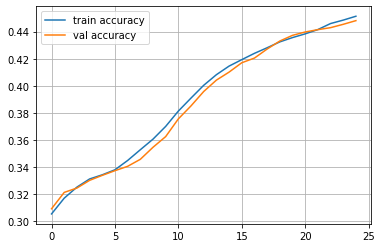

precision: 0.495160815793051
recall: 0.45145479731663496
f1: 0.3839256487803369
accuracy: 0.4480295566502463
Confusion matrix: 
[[  92 1208   70]
 [  41 1272   25]
 [ 229  668  455]]


In [ ]:
from IPython.display import clear_output
import numpy as np

network = MLP([10, 15, 20, 3], len(inputs))

train_log = []
val_log = []

for epoch in range(25):
    network.fit(x_train.astype(float), y_train)
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test) == y_test))
    #clear_output()
    print("Epoch", epoch)
    print("Train accuracy:", train_log[-1])
    print("Val accuracy:", val_log[-1])
    plt.plot(train_log,label = 'train accuracy')
    plt.plot(val_log,label = 'val accuracy')
    plt.legend(loc = 'best')
    plt.grid()
    plt.show()

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

In [ ]:
%%time
from IPython.display import clear_output
import numpy as np

network = MLP([10, 15, 20, 3], len(inputs))

train_log = []
val_log = []

for epoch in range(25):
    network.fit(x_train.astype(float), y_train)
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test) == y_test))

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred)

CPU times: user 10.9 s, sys: 2.88 s, total: 13.8 s
Wall time: 10.5 s




#### learning_rate = 0.05





Epoch 0
Train accuracy: 0.4579241896315067
Val accuracy: 0.46133004926108373


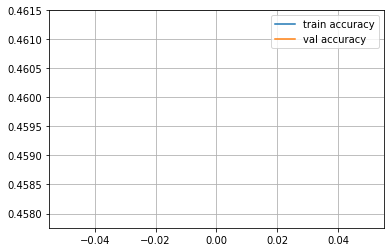

Epoch 1
Train accuracy: 0.47027768978988493
Val accuracy: 0.47167487684729065


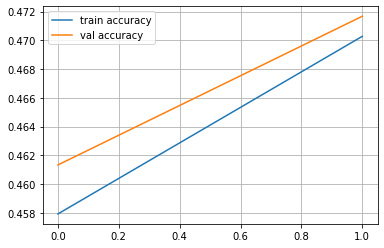

Epoch 2
Train accuracy: 0.4758737197761588
Val accuracy: 0.48201970443349756


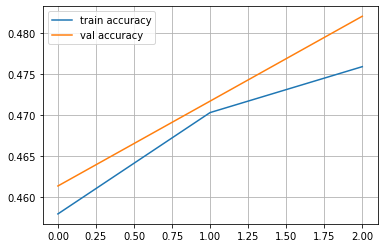

Epoch 3
Train accuracy: 0.4827367754197022
Val accuracy: 0.49014778325123154


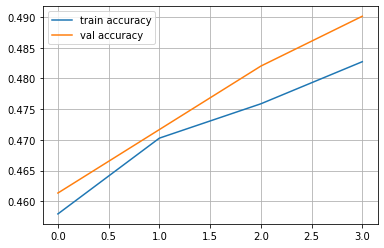

Epoch 4
Train accuracy: 0.4889663182346109
Val accuracy: 0.5017241379310344


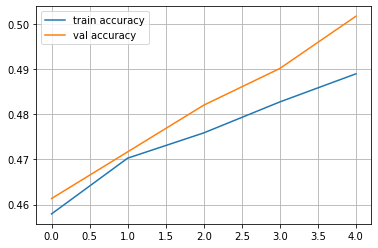

Epoch 5
Train accuracy: 0.49857459613557176
Val accuracy: 0.5105911330049261


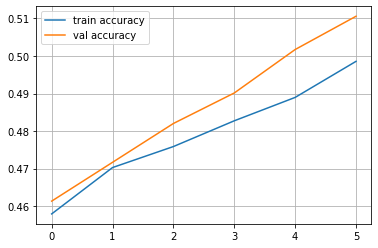

Epoch 6
Train accuracy: 0.5100834125224369
Val accuracy: 0.524384236453202


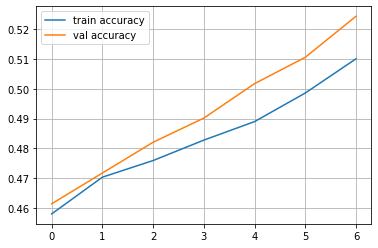

Epoch 7
Train accuracy: 0.5232815964523282
Val accuracy: 0.537192118226601


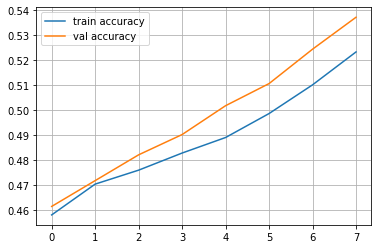

Epoch 8
Train accuracy: 0.5362686094393412
Val accuracy: 0.5480295566502463


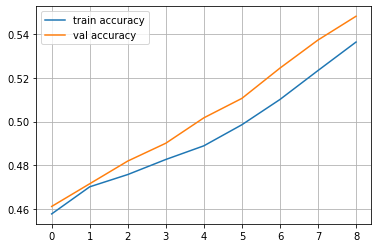

Epoch 9
Train accuracy: 0.554851652412628
Val accuracy: 0.5699507389162561


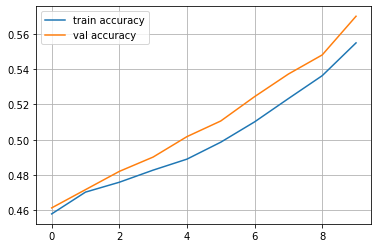

Epoch 10
Train accuracy: 0.5674163235138845
Val accuracy: 0.5842364532019705


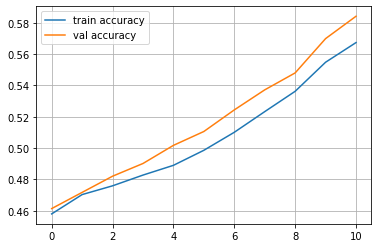

Epoch 11
Train accuracy: 0.5835709006440714
Val accuracy: 0.5967980295566503


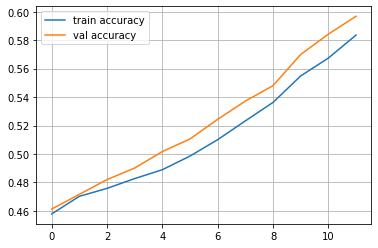

Epoch 12
Train accuracy: 0.5919121528877627
Val accuracy: 0.6002463054187193


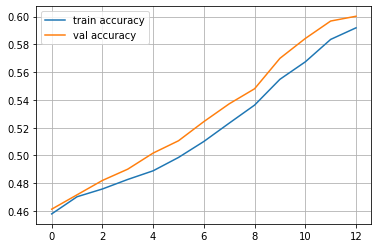

Epoch 13
Train accuracy: 0.59708584098828
Val accuracy: 0.5997536945812808


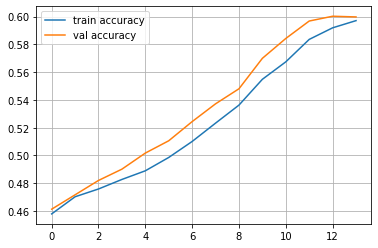

Epoch 14
Train accuracy: 0.5988807940027452
Val accuracy: 0.6064039408866995


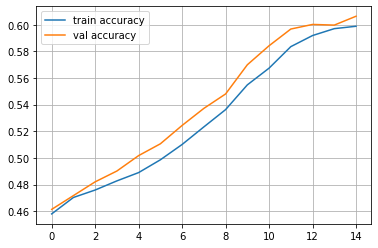

Epoch 15
Train accuracy: 0.6025762855031148
Val accuracy: 0.6093596059113301


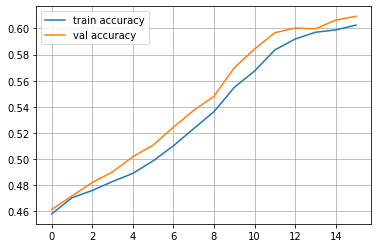

Epoch 16
Train accuracy: 0.6044768239890191
Val accuracy: 0.6108374384236454


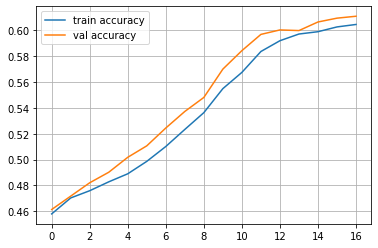

Epoch 17
Train accuracy: 0.6018371872030409
Val accuracy: 0.6098522167487684


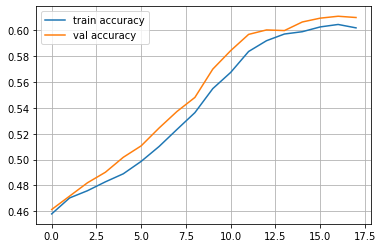

Epoch 18
Train accuracy: 0.6002534051314539
Val accuracy: 0.6064039408866995


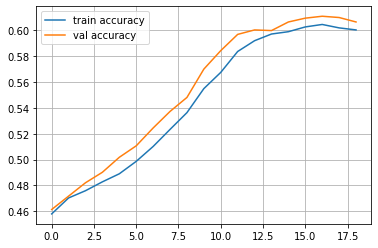

Epoch 19
Train accuracy: 0.5965579136310843
Val accuracy: 0.6022167487684729


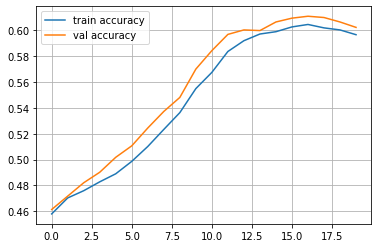

Epoch 20
Train accuracy: 0.5939182768451061
Val accuracy: 0.5972906403940886


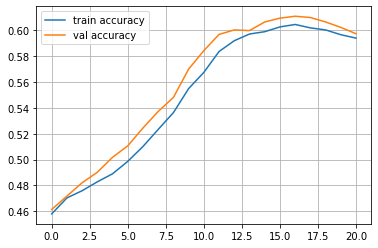

Epoch 21
Train accuracy: 0.5904339562876149
Val accuracy: 0.5955665024630542


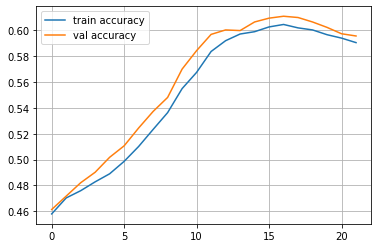

Epoch 22
Train accuracy: 0.5876887340301974
Val accuracy: 0.5926108374384237


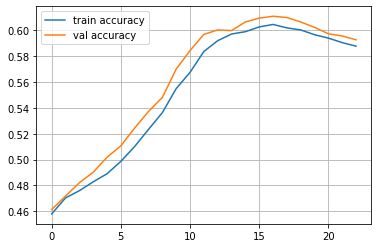

Epoch 23
Train accuracy: 0.5859993664871713
Val accuracy: 0.59064039408867


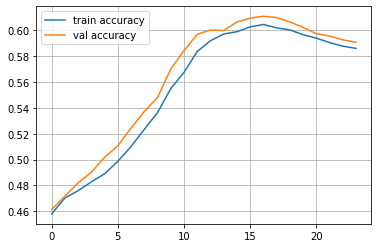

Epoch 24
Train accuracy: 0.5831485587583148
Val accuracy: 0.5881773399014778


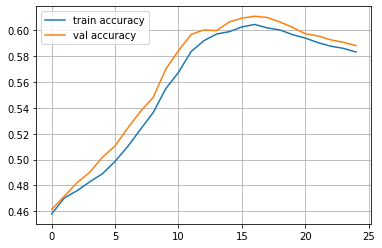

precision: 0.6471227473923032
recall: 0.589857091872826
f1: 0.5817069383817884
accuracy: 0.5881773399014778
Confusion matrix: 
[[ 566  710   94]
 [ 114 1137   87]
 [ 171  496  685]]


In [ ]:
from IPython.display import clear_output
import numpy as np

network = MLP([10, 15, 20, 3], len(inputs))

train_log = []
val_log = []

for epoch in range(25):
    network.fit(x_train.astype(float), y_train)
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test) == y_test))
    #clear_output()
    print("Epoch", epoch)
    print("Train accuracy:", train_log[-1])
    print("Val accuracy:", val_log[-1])
    plt.plot(train_log,label = 'train accuracy')
    plt.plot(val_log,label = 'val accuracy')
    plt.legend(loc = 'best')
    plt.grid()
    plt.show()

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

In [ ]:
%%time
from IPython.display import clear_output
import numpy as np

network = MLP([10, 15, 20, 3], len(inputs))

train_log = []
val_log = []

for epoch in range(25):
    network.fit(x_train.astype(float), y_train)
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test) == y_test))

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred)

CPU times: user 11.1 s, sys: 2.89 s, total: 14 s
Wall time: 10.7 s


#### learning_rate = 0.075

Epoch 0
Train accuracy: 0.35466159856403756
Val accuracy: 0.35960591133004927


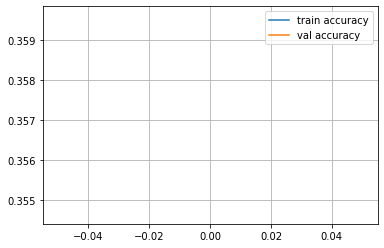

Epoch 1
Train accuracy: 0.3674374406081723
Val accuracy: 0.36551724137931035


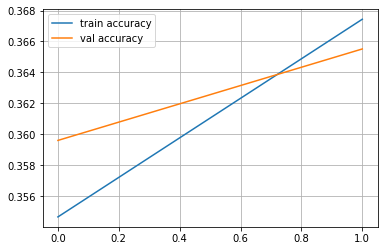

Epoch 2
Train accuracy: 0.3814803083095766
Val accuracy: 0.37857142857142856


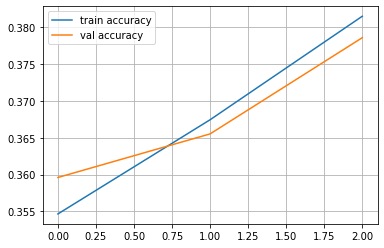

Epoch 3
Train accuracy: 0.39679020166825046
Val accuracy: 0.3958128078817734


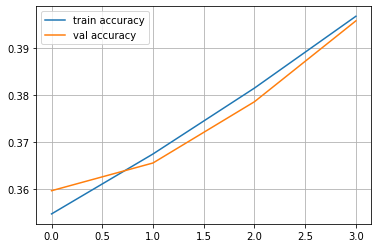

Epoch 4
Train accuracy: 0.4088269454123113
Val accuracy: 0.40935960591133


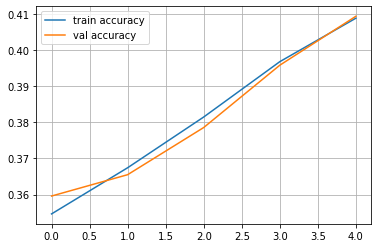

Epoch 5
Train accuracy: 0.43015521064301554
Val accuracy: 0.42167487684729066


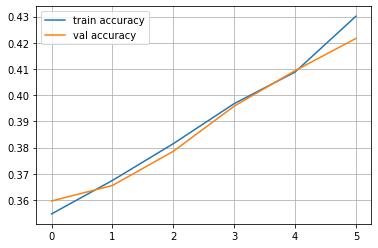

Epoch 6
Train accuracy: 0.445993031358885
Val accuracy: 0.43596059113300495


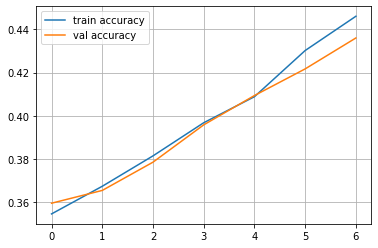

Epoch 7
Train accuracy: 0.4551789673740893
Val accuracy: 0.44285714285714284


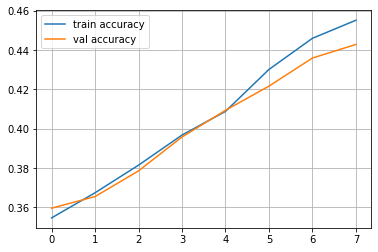

Epoch 8
Train accuracy: 0.4656319290465632
Val accuracy: 0.4576354679802956


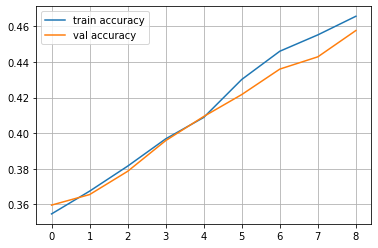

Epoch 9
Train accuracy: 0.475240206947524
Val accuracy: 0.4623152709359606


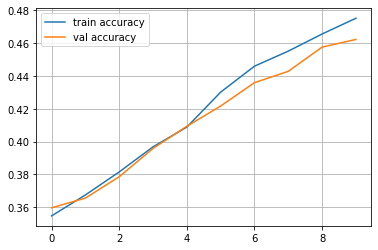

Epoch 10
Train accuracy: 0.4812585788195544
Val accuracy: 0.4687192118226601


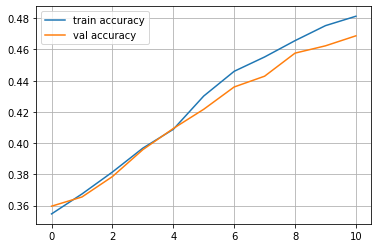

Epoch 11
Train accuracy: 0.4865378523915109
Val accuracy: 0.4768472906403941


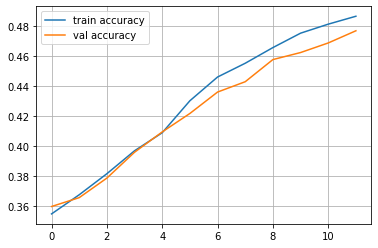

Epoch 12
Train accuracy: 0.49266180973498047
Val accuracy: 0.4795566502463054


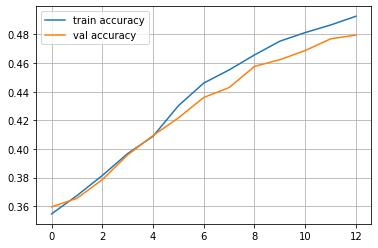

Epoch 13
Train accuracy: 0.4942455918065674
Val accuracy: 0.4802955665024631


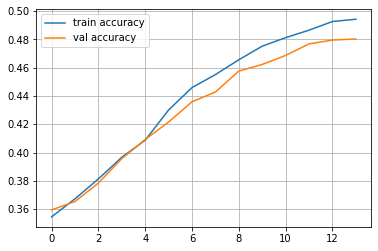

Epoch 14
Train accuracy: 0.4972019850068631
Val accuracy: 0.4812807881773399


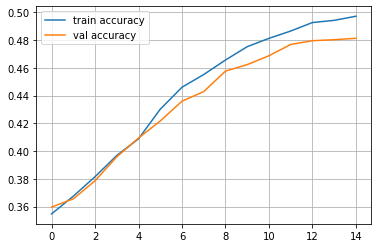

Epoch 15
Train accuracy: 0.5000527927357196
Val accuracy: 0.483743842364532


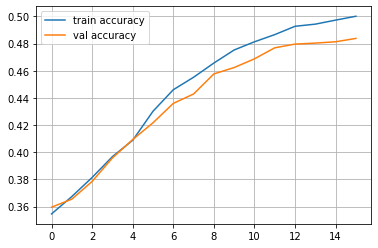

Epoch 16
Train accuracy: 0.5013198183929891
Val accuracy: 0.48891625615763545


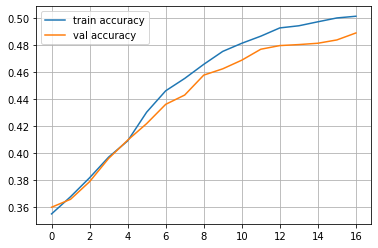

Epoch 17
Train accuracy: 0.5024812585788195
Val accuracy: 0.4911330049261084


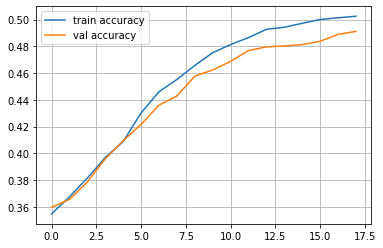

Epoch 18
Train accuracy: 0.502058916693063
Val accuracy: 0.4933497536945813


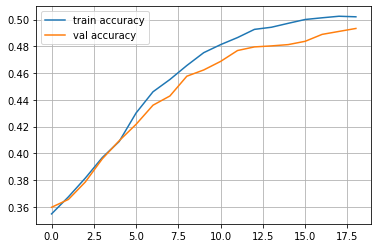

Epoch 19
Train accuracy: 0.5040650406504065
Val accuracy: 0.49507389162561577


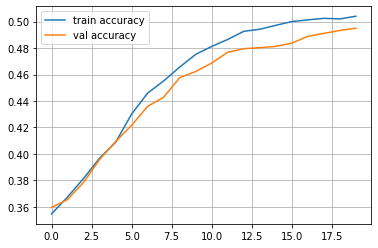

Epoch 20
Train accuracy: 0.5052264808362369
Val accuracy: 0.49556650246305417


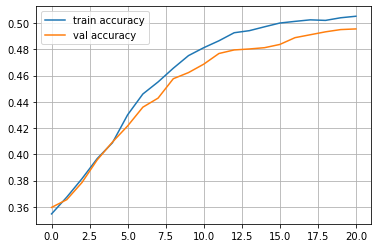

Epoch 21
Train accuracy: 0.5071270193221413
Val accuracy: 0.4963054187192118


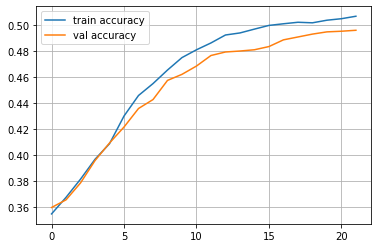

Epoch 22
Train accuracy: 0.5078661176222152
Val accuracy: 0.4975369458128079


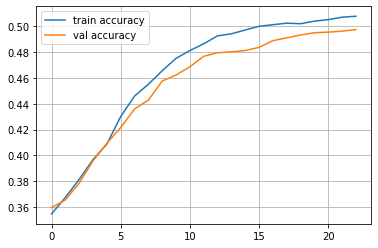

Epoch 23
Train accuracy: 0.5088163868651674
Val accuracy: 0.49852216748768474


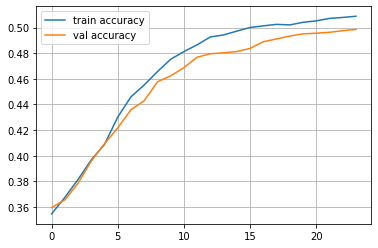

Epoch 24
Train accuracy: 0.509344314222363
Val accuracy: 0.4982758620689655


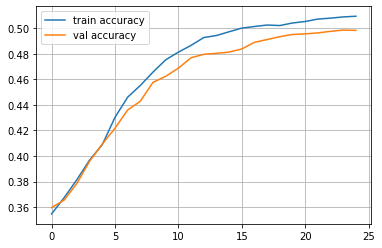

precision: 0.5798095761843428
recall: 0.4994964547807461
f1: 0.48358111223266875
accuracy: 0.4982758620689655
Confusion matrix: 
[[ 631  573  166]
 [  95 1075  168]
 [  17 1018  317]]


In [ ]:
from IPython.display import clear_output
import numpy as np

network = MLP([10, 15, 20, 3], len(inputs))

train_log = []
val_log = []

for epoch in range(25):
    network.fit(x_train.astype(float), y_train)
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test) == y_test))
    #clear_output()
    print("Epoch", epoch)
    print("Train accuracy:", train_log[-1])
    print("Val accuracy:", val_log[-1])
    plt.plot(train_log,label = 'train accuracy')
    plt.plot(val_log,label = 'val accuracy')
    plt.legend(loc = 'best')
    plt.grid()
    plt.show()

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

In [ ]:
%%time
from IPython.display import clear_output
import numpy as np

network = MLP([10, 15, 20, 3], len(inputs))

train_log = []
val_log = []

for epoch in range(25):
    network.fit(x_train.astype(float), y_train)
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test) == y_test))

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred)

CPU times: user 10.7 s, sys: 2.95 s, total: 13.6 s
Wall time: 10.4 s


### Κάποια από τα καλύτερα δικά μας αποτελέσματα (training_rate = 0.1)

#### Πείραμα για όλα τα δεδομένα ( νευρωνικό δίκτυο [40, 60, 80, 3] για 30 εποχές )

Epoch 0
Train accuracy: 0.46552634357512407
Val accuracy: 0.46921182266009853


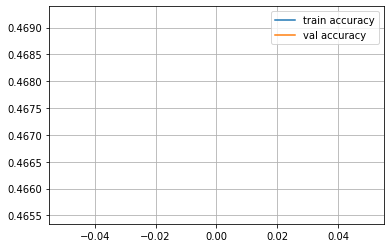

Epoch 1
Train accuracy: 0.4712279590328371
Val accuracy: 0.4726600985221675


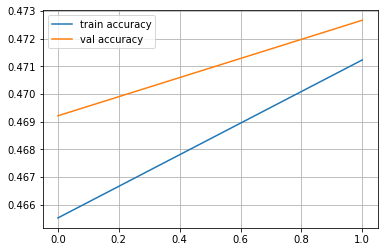

Epoch 2
Train accuracy: 0.47323408299018055
Val accuracy: 0.4714285714285714


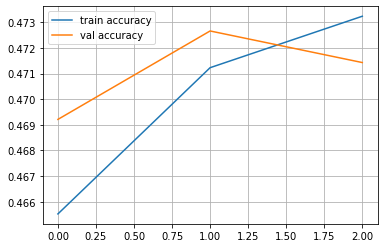

Epoch 3
Train accuracy: 0.47038327526132406
Val accuracy: 0.46970443349753693


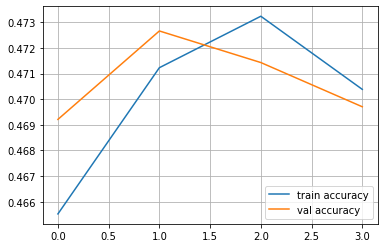

Epoch 4
Train accuracy: 0.47661281807623274
Val accuracy: 0.475615763546798


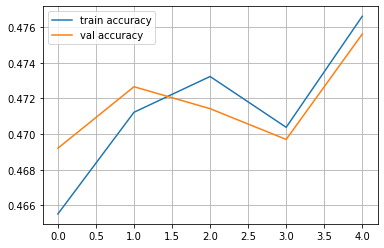

Epoch 5
Train accuracy: 0.4964628867067891
Val accuracy: 0.4928571428571429


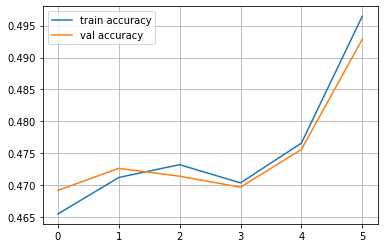

Epoch 6
Train accuracy: 0.5185302502375673
Val accuracy: 0.5135467980295566


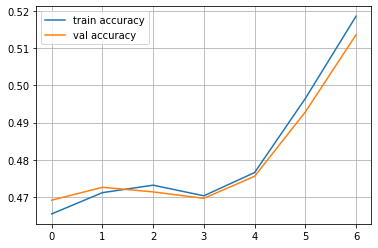

Epoch 7
Train accuracy: 0.5319396051103368
Val accuracy: 0.5283251231527094


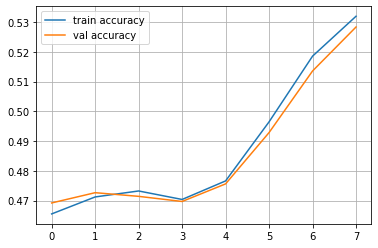

Epoch 8
Train accuracy: 0.5405976137683455
Val accuracy: 0.5352216748768472


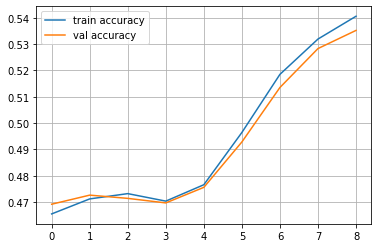

Epoch 9
Train accuracy: 0.5455601309259845
Val accuracy: 0.5463054187192118


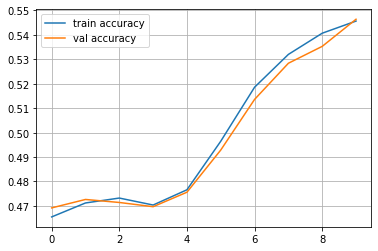

Epoch 10
Train accuracy: 0.5518952592123324
Val accuracy: 0.5519704433497536


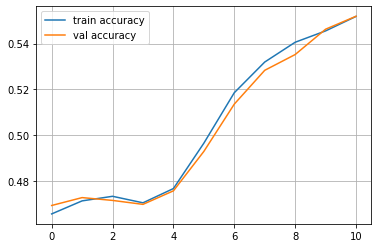

Epoch 11
Train accuracy: 0.5596029986273888
Val accuracy: 0.5566502463054187


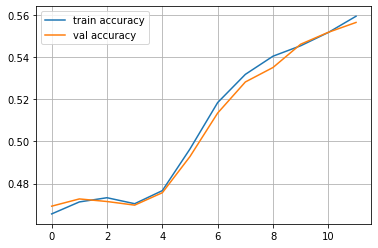

Epoch 12
Train accuracy: 0.5685777636997149
Val accuracy: 0.5630541871921182


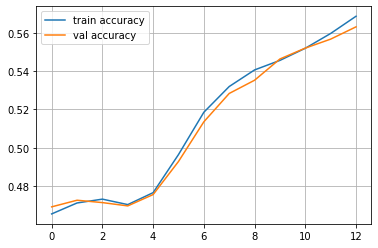

Epoch 13
Train accuracy: 0.5734346953859148
Val accuracy: 0.5674876847290641


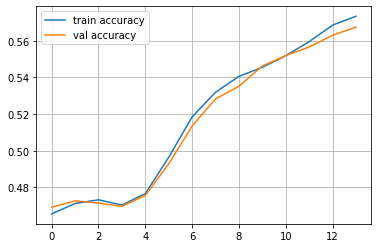

Epoch 14
Train accuracy: 0.5777636997149193
Val accuracy: 0.5738916256157636


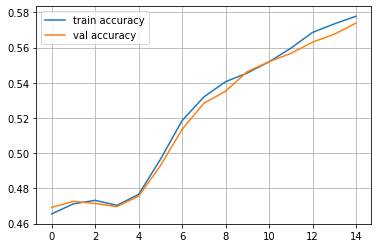

Epoch 15
Train accuracy: 0.5834653151726322
Val accuracy: 0.5817733990147783


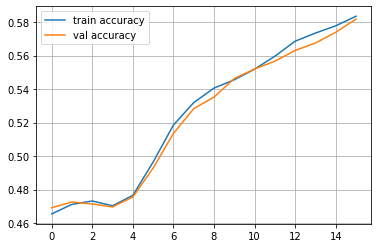

Epoch 16
Train accuracy: 0.5886390032731497
Val accuracy: 0.5899014778325123


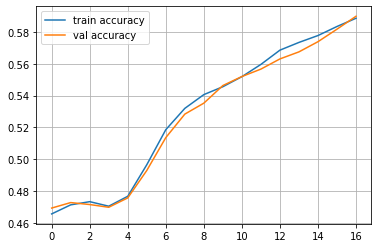

Epoch 17
Train accuracy: 0.5930735930735931
Val accuracy: 0.5953201970443349


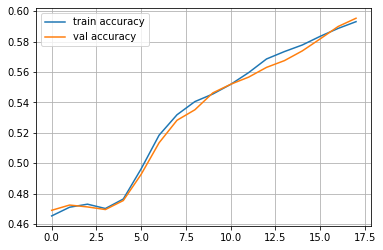

Epoch 18
Train accuracy: 0.5980361102312322
Val accuracy: 0.5975369458128079


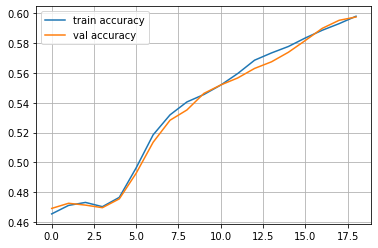

Epoch 19
Train accuracy: 0.6027874564459931
Val accuracy: 0.6036945812807881


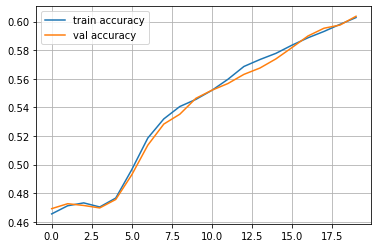

Epoch 20
Train accuracy: 0.6098616830324147
Val accuracy: 0.6108374384236454


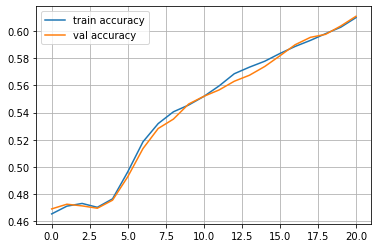

Epoch 21
Train accuracy: 0.6150353711329322
Val accuracy: 0.6177339901477833


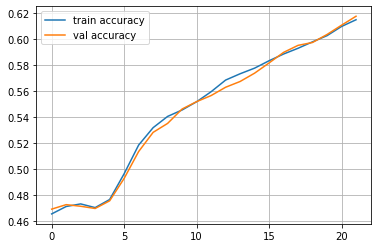

Epoch 22
Train accuracy: 0.6191532045190582
Val accuracy: 0.6224137931034482


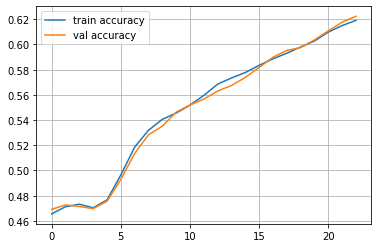

Epoch 23
Train accuracy: 0.6215816703621582
Val accuracy: 0.6270935960591133


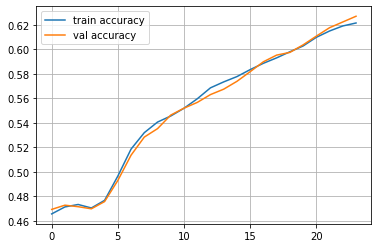

Epoch 24
Train accuracy: 0.6259106746911625
Val accuracy: 0.6298029556650246


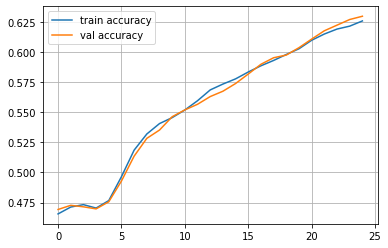

Epoch 25
Train accuracy: 0.6319290465631929
Val accuracy: 0.6339901477832512


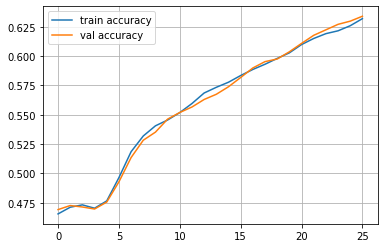

Epoch 26
Train accuracy: 0.6328793158061451
Val accuracy: 0.6364532019704433


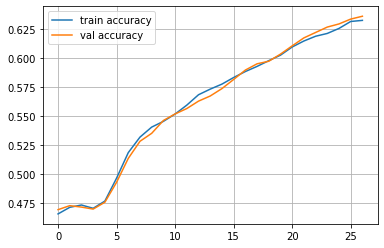

Epoch 27
Train accuracy: 0.6352021961778059
Val accuracy: 0.6396551724137931


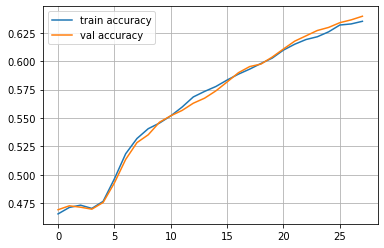

Epoch 28
Train accuracy: 0.6371027346637103
Val accuracy: 0.6411330049261084


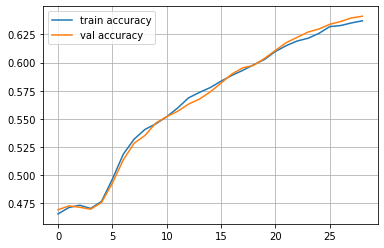

Epoch 29
Train accuracy: 0.6363636363636364
Val accuracy: 0.6421182266009853


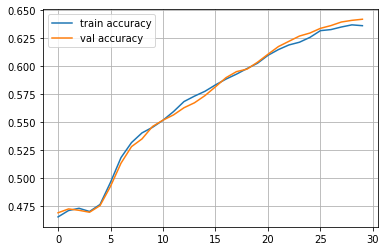

precision: 0.6756062190455089
recall: 0.6429618716042679
f1: 0.641984318237801
accuracy: 0.6421182266009853
Confusion matrix: 
[[694 429 247]
 [119 953 266]
 [ 22 370 960]]


In [ ]:
from IPython.display import clear_output
import numpy as np

network = MLP([40, 60, 80, 3], len(inputs))

train_log = []
val_log = []

for epoch in range(30):
    network.fit(x_train.astype(float), y_train)
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test) == y_test))
    #clear_output()
    print("Epoch", epoch)
    print("Train accuracy:", train_log[-1])
    print("Val accuracy:", val_log[-1])
    plt.plot(train_log,label = 'train accuracy')
    plt.plot(val_log,label = 'val accuracy')
    plt.legend(loc = 'best')
    plt.grid()
    plt.show()

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

In [ ]:
%%time
from IPython.display import clear_output
import numpy as np

network = MLP([40, 60, 80, 3], len(inputs))

train_log = []
val_log = []

for epoch in range(30):
    network.fit(x_train.astype(float), y_train)
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test[:100]) == y_test[:100]))

y_pred = network.predict(x_test[:100])

eval = Evaluate(y_test[:100], y_pred)

CPU times: user 1min 35s, sys: 5.39 s, total: 1min 40s
Wall time: 1min 35s


In [ ]:
%%time
from IPython.display import clear_output
import numpy as np

network = MLP([40, 60, 80, 3], len(inputs))

train_log = []
val_log = []

for epoch in range(30):
    network.fit(x_train.astype(float), y_train)
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test[:1000]) == y_test[:1000]))

y_pred = network.predict(x_test[:1000])

eval = Evaluate(y_test[:1000], y_pred)

CPU times: user 1min 45s, sys: 5.43 s, total: 1min 51s
Wall time: 1min 45s


#### Πείραμα για 300 δεδομένα ( νευρωνικό δίκτυο [40, 60, 80, 3] για 20 εποχές )

Epoch 0
Train accuracy: 0.33692323936226376
Val accuracy: 0.3433333333333333


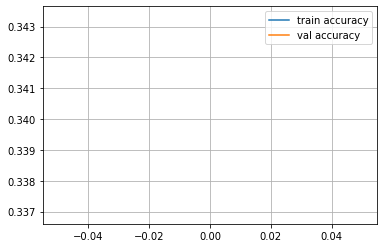

Epoch 1
Train accuracy: 0.34315278217717243
Val accuracy: 0.35


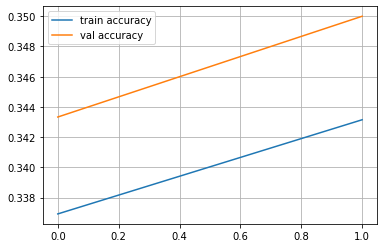

Epoch 2
Train accuracy: 0.35508394044979413
Val accuracy: 0.35333333333333333


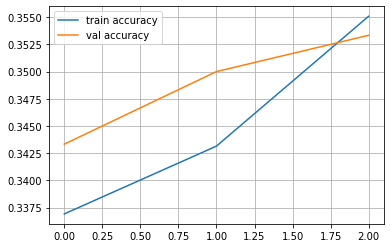

Epoch 3
Train accuracy: 0.3734558124802027
Val accuracy: 0.37333333333333335


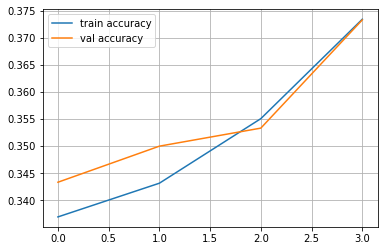

Epoch 4
Train accuracy: 0.40228064618308523
Val accuracy: 0.41333333333333333


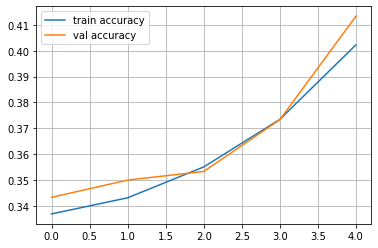

Epoch 5
Train accuracy: 0.4497941083306937
Val accuracy: 0.4866666666666667


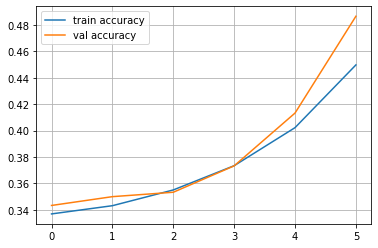

Epoch 6
Train accuracy: 0.511772780065463
Val accuracy: 0.5633333333333334


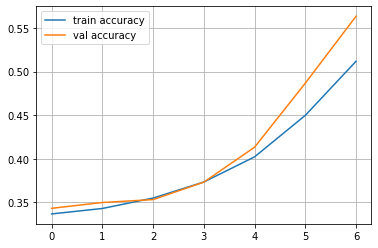

Epoch 7
Train accuracy: 0.5579136310843628
Val accuracy: 0.61


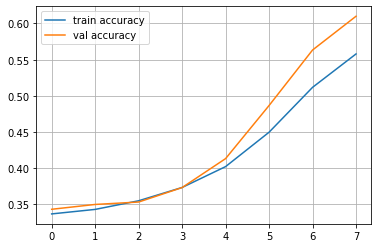

Epoch 8
Train accuracy: 0.5793474817865062
Val accuracy: 0.6433333333333333


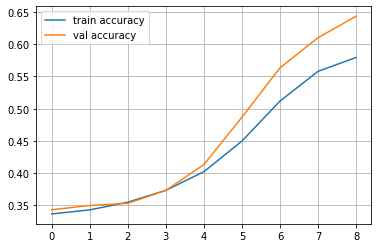

Epoch 9
Train accuracy: 0.5952908879738148
Val accuracy: 0.66


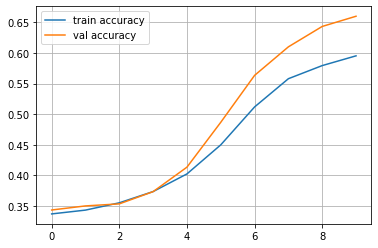

Epoch 10
Train accuracy: 0.6047935804033365
Val accuracy: 0.68


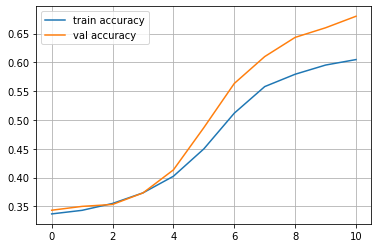

Epoch 11
Train accuracy: 0.6128180762327103
Val accuracy: 0.6933333333333334


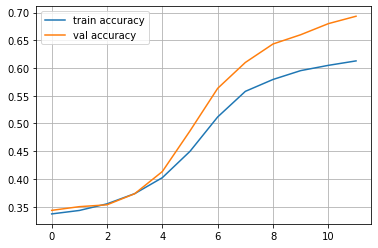

Epoch 12
Train accuracy: 0.6172526660331539
Val accuracy: 0.7066666666666667


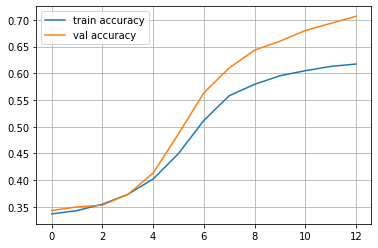

Epoch 13
Train accuracy: 0.623059866962306
Val accuracy: 0.7033333333333334


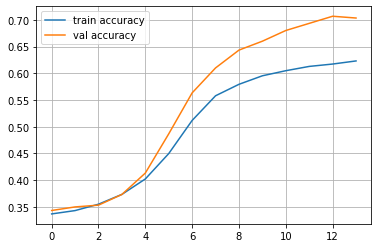

Epoch 14
Train accuracy: 0.6277056277056277
Val accuracy: 0.7


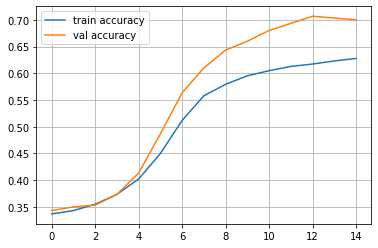

Epoch 15
Train accuracy: 0.6304508499630451
Val accuracy: 0.7033333333333334


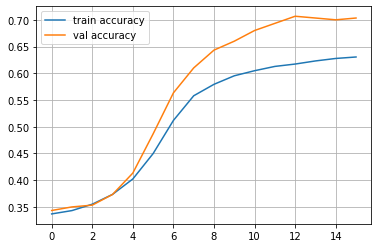

Epoch 16
Train accuracy: 0.6310843627916799
Val accuracy: 0.7066666666666667


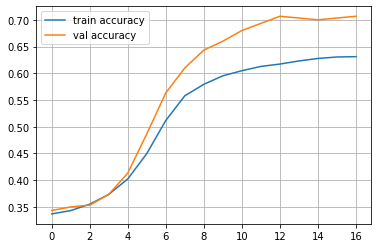

Epoch 17
Train accuracy: 0.6338295850490973
Val accuracy: 0.7066666666666667


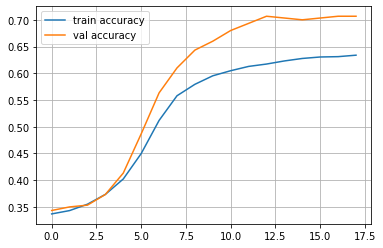

Epoch 18
Train accuracy: 0.6363636363636364
Val accuracy: 0.7066666666666667


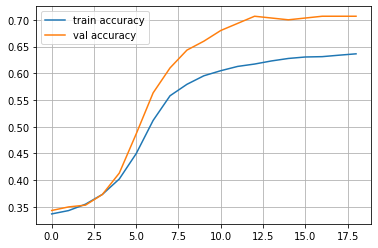

Epoch 19
Train accuracy: 0.6378418329637842
Val accuracy: 0.71


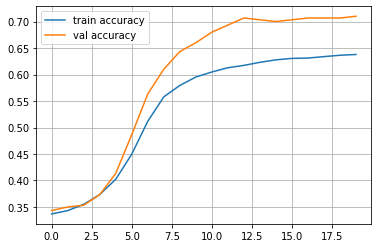

precision: 0.724232170744404
recall: 0.7074898934068165
f1: 0.7071449156017198
accuracy: 0.71
Confusion matrix: 
[[55 24 17]
 [11 77 15]
 [ 2 18 81]]


In [ ]:
from IPython.display import clear_output
import numpy as np

network = MLP([40, 60, 80, 3], len(inputs))

train_log = []
val_log = []

for epoch in range(20):
    network.fit(x_train.astype(float), y_train)
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test[:300]) == y_test[:300]))
    #clear_output()
    print("Epoch", epoch)
    print("Train accuracy:", train_log[-1])
    print("Val accuracy:", val_log[-1])
    plt.plot(train_log,label = 'train accuracy')
    plt.plot(val_log,label = 'val accuracy')
    plt.legend(loc = 'best')
    plt.grid()
    plt.show()

y_pred = network.predict(x_test[:300])

eval = Evaluate(y_test[:300], y_pred)
eval.get_evaluation_report()

In [ ]:
%%time
from IPython.display import clear_output
import numpy as np

network = MLP([40, 60, 80, 3], len(inputs))

train_log = []
val_log = []

for epoch in range(20):
    network.fit(x_train.astype(float), y_train)
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test[:100]) == y_test[:100]))

y_pred = network.predict(x_test[:100])

eval = Evaluate(y_test[:100], y_pred)

CPU times: user 1min 3s, sys: 3.65 s, total: 1min 7s
Wall time: 1min 3s


In [ ]:
%%time
from IPython.display import clear_output
import numpy as np

network = MLP([40, 60, 80, 3], len(inputs))

train_log = []
val_log = []

for epoch in range(20):
    network.fit(x_train.astype(float), y_train)
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test[:1000]) == y_test[:1000]))

y_pred = network.predict(x_test[:1000])

eval = Evaluate(y_test[:1000], y_pred)

CPU times: user 1min 10s, sys: 3.7 s, total: 1min 14s
Wall time: 1min 10s


## Έτοιμο Multi-Layer Perceptron

Όπως και με τις τεχνικές των παραπάνω ερωτημάτων έτσι και εδώ υπάρχει έτοιμη η παραπάνω κλάση σε διάφορες βιβλιοθήκες. Έτσι στο δεύτερο μέρος του ερωτήματος αυτού θα κατασκευάσετε το ίδιο MLP χρησιμοποιώντας όμως την έτοιμη κλάση [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)  της βιβλιοθήκης scikit-learn. Παρακάτω παρουσιάζεται ένα παράδειγμα χρήσης της κλάσης αυτής.

### Μέγεθος ενδιάμεσων επιπέδων

In [ ]:
%%time
from sklearn.neural_network import MLPClassifier

epochs = 25
mlp = MLPClassifier(hidden_layer_sizes=(10, 15, 20), max_iter = epochs)

mlp.fit(x_train,y_train)

y_pred = mlp.predict(x_test)
eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

precision: 0.75789259032264
recall: 0.7364468669250334
f1: 0.73496142379098
accuracy: 0.7354679802955665
Confusion matrix: 
[[ 828  376  166]
 [ 101 1138   99]
 [  49  283 1020]]
CPU times: user 882 ms, sys: 21 ms, total: 903 ms
Wall time: 896 ms


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
%%time
from sklearn.neural_network import MLPClassifier

epochs = 25
mlp = MLPClassifier(hidden_layer_sizes=(20, 30, 40), max_iter = epochs)

mlp.fit(x_train,y_train)

y_pred = mlp.predict(x_test)
eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

precision: 0.7559378082159011
recall: 0.7459575608378494
f1: 0.7455385051639905
accuracy: 0.7453201970443349
Confusion matrix: 
[[ 899  328  143]
 [ 131 1091  116]
 [  84  232 1036]]
CPU times: user 1.19 s, sys: 18.9 ms, total: 1.21 s
Wall time: 1.2 s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
%%time
from sklearn.neural_network import MLPClassifier

epochs = 25
mlp = MLPClassifier(hidden_layer_sizes=(50, 75, 100), max_iter = epochs)

mlp.fit(x_train,y_train)

y_pred = mlp.predict(x_test)
eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

precision: 0.7636081711653321
recall: 0.7512081435444135
f1: 0.7504514239251975
accuracy: 0.7504926108374385
Confusion matrix: 
[[ 886  328  156]
 [ 116 1103  119]
 [  59  235 1058]]
CPU times: user 4.09 s, sys: 2.39 s, total: 6.48 s
Wall time: 3.34 s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
%%time
from sklearn.neural_network import MLPClassifier

epochs = 25
mlp = MLPClassifier(hidden_layer_sizes=(100, 150, 200), max_iter = epochs)

mlp.fit(x_train,y_train)

y_pred = mlp.predict(x_test)
eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

precision: 0.7659287425740106
recall: 0.7445250788439228
f1: 0.7437376930764588
accuracy: 0.7435960591133005
Confusion matrix: 
[[ 861  376  133]
 [  93 1157   88]
 [  70  281 1001]]
CPU times: user 9.07 s, sys: 4.46 s, total: 13.5 s
Wall time: 6.93 s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


### Αριθμός ενδιάμεσων επιπέδων

In [ ]:
%%time
from sklearn.neural_network import MLPClassifier

epochs = 25
mlp = MLPClassifier(hidden_layer_sizes=(10, 15, 15, 20), max_iter = epochs)

mlp.fit(x_train,y_train)

y_pred = mlp.predict(x_test)
eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

precision: 0.7437559320018998
recall: 0.7316250049415651
f1: 0.7298047290043704
accuracy: 0.7307881773399014
Confusion matrix: 
[[ 833  345  192]
 [ 139 1091  108]
 [  60  249 1043]]
CPU times: user 1.04 s, sys: 14.8 ms, total: 1.06 s
Wall time: 1.04 s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
%%time
from sklearn.neural_network import MLPClassifier

epochs = 25
mlp = MLPClassifier(hidden_layer_sizes=(50, 75, 75, 100), max_iter = epochs)

mlp.fit(x_train,y_train)

y_pred = mlp.predict(x_test)
eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

precision: 0.7639846755862941
recall: 0.7417268967330277
f1: 0.7379465680285632
accuracy: 0.74064039408867
Confusion matrix: 
[[ 786  380  204]
 [  76 1125  137]
 [  33  223 1096]]
CPU times: user 5.4 s, sys: 3.32 s, total: 8.71 s
Wall time: 4.5 s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


### Αριθμός εποχών

In [ ]:
%%time
from sklearn.neural_network import MLPClassifier

epochs = 15
mlp = MLPClassifier(hidden_layer_sizes=(10, 15, 20), max_iter = epochs)

mlp.fit(x_train,y_train)

y_pred = mlp.predict(x_test)
eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

precision: 0.7342724675930293
recall: 0.7228033664233663
f1: 0.7193180090831639
accuracy: 0.7219211822660099
Confusion matrix: 
[[ 794  306  270]
 [ 128 1063  147]
 [  50  228 1074]]
CPU times: user 522 ms, sys: 18 ms, total: 540 ms
Wall time: 530 ms


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
%%time
from sklearn.neural_network import MLPClassifier

epochs = 50
mlp = MLPClassifier(hidden_layer_sizes=(10, 15, 20), max_iter = epochs)

mlp.fit(x_train,y_train)

y_pred = mlp.predict(x_test)
eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

precision: 0.7518542499200093
recall: 0.7478791819225722
f1: 0.7478414363670133
accuracy: 0.7475369458128078
Confusion matrix: 
[[ 943  281  146]
 [ 173 1031  134]
 [  85  206 1061]]
CPU times: user 1.74 s, sys: 17.8 ms, total: 1.76 s
Wall time: 1.75 s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
%%time
from sklearn.neural_network import MLPClassifier

epochs = 15
mlp = MLPClassifier(hidden_layer_sizes=(100, 150, 200), max_iter = epochs)

mlp.fit(x_train,y_train)

y_pred = mlp.predict(x_test)
eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

precision: 0.7496176518897499
recall: 0.7444919399602363
f1: 0.7445184488052693
accuracy: 0.744088669950739
Confusion matrix: 
[[ 947  287  136]
 [ 156 1061  121]
 [ 121  218 1013]]
CPU times: user 5.53 s, sys: 2.59 s, total: 8.11 s
Wall time: 4.17 s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


### Κάποια από τα καλύτερα δικά μας αποτελέσματα

#### Πείραμα για όλα τα δεδομένα ( νευρωνικό δίκτυο [40, 60, 80, 3] για 30 εποχές )

In [ ]:
from sklearn.neural_network import MLPClassifier

epochs = 30
mlp = MLPClassifier(hidden_layer_sizes=(40, 60, 80), max_iter = epochs)

mlp.fit(x_train,y_train)

y_pred = mlp.predict(x_test)
eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

precision: 0.7636566226830794
recall: 0.7480811840672276
f1: 0.747426888103312
accuracy: 0.7472906403940887
Confusion matrix: 
[[ 877  348  145]
 [ 107 1122  109]
 [  64  253 1035]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
%%time
from sklearn.neural_network import MLPClassifier

epochs = 30
mlp = MLPClassifier(hidden_layer_sizes=(40, 60, 80), max_iter = epochs)

mlp.fit(x_train,y_train)

y_pred = mlp.predict(x_test[:100])
eval = Evaluate(y_test[:100], y_pred)

CPU times: user 4.42 s, sys: 3.14 s, total: 7.56 s
Wall time: 3.94 s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
%%time
from sklearn.neural_network import MLPClassifier

epochs = 30
mlp = MLPClassifier(hidden_layer_sizes=(40, 60, 80), max_iter = epochs)

mlp.fit(x_train,y_train)

y_pred = mlp.predict(x_test[:1000])
eval = Evaluate(y_test[:1000], y_pred)

CPU times: user 4.32 s, sys: 3.19 s, total: 7.51 s
Wall time: 3.88 s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


#### Πείραμα για 300 δεδομένα ( νευρωνικό δίκτυο [40, 60, 80, 3] για 20 εποχές )

In [ ]:
from sklearn.neural_network import MLPClassifier

epochs = 20
mlp = MLPClassifier(hidden_layer_sizes=(40, 60, 80), max_iter = epochs)

mlp.fit(x_train,y_train)

y_pred = mlp.predict(x_test[:300])
eval = Evaluate(y_test[:300], y_pred)
eval.get_evaluation_report()

precision: 0.8064107618355983
recall: 0.7954719925876083
f1: 0.7976516865967915
accuracy: 0.7966666666666666
Confusion matrix: 
[[71 16  9]
 [ 8 86  9]
 [ 2 17 82]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
%%time
from sklearn.neural_network import MLPClassifier

epochs = 20
mlp = MLPClassifier(hidden_layer_sizes=(40, 60, 80), max_iter = epochs)

mlp.fit(x_train,y_train)

y_pred = mlp.predict(x_test[:100])
eval = Evaluate(y_test[:100], y_pred)

CPU times: user 2.86 s, sys: 2.12 s, total: 4.99 s
Wall time: 2.57 s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
%%time
from sklearn.neural_network import MLPClassifier

epochs = 20
mlp = MLPClassifier(hidden_layer_sizes=(40, 60, 80), max_iter = epochs)

mlp.fit(x_train,y_train)

y_pred = mlp.predict(x_test[:1000])
eval = Evaluate(y_test[:1000], y_pred)

CPU times: user 2.84 s, sys: 2.14 s, total: 4.99 s
Wall time: 2.62 s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


## Σχολιασμός και Σύγκριση υλοποιήσεων

Η απόδοση του πολυεπίπεδου νευρωνικού δικτύου που κατασκευάσαμε εξαρτάται γενικά από ασαφείς παραμέτρους. Ωστόσο γνωρίζουμε ότι την απόδοσή του σίγουρα επηρεάζουν οι υπερπαράμετροι:

*   Αριθμός Νευρώνων (Μέγεθος ενδιάμεσων επιπέδων)
*   Πλήθος των ενδιάμεσων επιπέδων
*   Αριθμός εποχών
*   Βήμα εκπαίδευσης (learning rate)

Για τον λόγο αυτό έγιναν αρκετά πειράματα με πολλούς διαφορετικούς συνδυασμούς τιμών για τις παραπάνω υπερπαραμέτρους, ώστε να καταλήξουμε στην καλύτερη απόδοση που προέκυψε από το πολυεπίπεδο νευρωνικό μας δίκτυο. Παρακάτω εξετάζουμε μια προς μια τις μεταβολές στις τιμές των παραμέτρων αυτών και εξάγουμε τα συμπεράσματά μας.
<br></br>

**Αριθμός νευρώνων**

Από τα πειράματα που παρατίθενται παραπάνω, παρατηρείται ότι όσο μεγαλώνει ο αριθμός των νευρώνων, και κρατώντας σταθέρες τις άλλες υπερπαραμέτρους, τόσο καλύτερα αποτελέσματα παίρνουμε. Συγκεκριμένα βλέπουμε ότι για την μικρότερη τιμή νευρώνων που δοκιμάστηκε, δηλαδή [10,15,20] είχαμε precision 57 %, recall: 52 %, f1: 46 % και accuracy 52 % , τιμές αρκετά χαμηλές, το οποίο οφείλεται στο γεγονός ότι το νευρωνικό μας δίκτυο δεν είναι αρκετά "μεγάλο" (δεν έχουμε αρκετές παραμέτρους ανά επίπεδο) ώστε να μας επιτρεπεται επαρκής μοντελοποίηση με βάση τα δεδομένα μας. Ωστόσο με την αύξηση των νευρώνων οι τιμές αυτές βελτιώνονται σημαντικά και φτάνουμε για το πείραμα με ενδιάμεσα επίπεδα [100,150,200], τον μέγιστο αριθμό νευρώνων που δοκιμάστηκε, να έχουμε precision 69 %, recall: 65,9 %, f1: 65,2 % και accuracy 65,8 % , τιμές σημαντικά καλύτερες. Ωστόσο πρέπει να αναφερθεί για τόσο μεγάλο αριθμό νευρώνων αυξάνεται σημαντικά ο χρόνος εκτέλεσης, το οποίο ειναι λογικό, αφού έχει αυξηθεί πολύ η πολυπλοκότητα του νευρωνικού δικτύου. Επίσης, με την υπερβολική αύξηση του μεγέθους του νευρωνικού μας δικτύου θα προστεθούν υπερβολίκά πολλές παράμετροι (βάρη) σε κάθε επίπεδο με αποτέλεσμα να υπάρχει κίνδυνος να έχουμε overfitting.

Για τους παραπάνω λόγους και σε πειραματισμούς για το καλύτερο δυνατό αποτέλεσμα προτιμήθηκαν ενδιάμεσοι αριθμοί νευρώνων.

**Πλήθος ενδιάμεσων επιπέδων**

Δοκιμασάμε να αυξήσουμε τον αριθμό των επιπέδων απο 3 σε 4 και παρατηρήθηκε ότι ενώ φαίνεται να γίνεται γρηγορότερα σύγκλιση στο καλύτερο δυνατό αποτέλεσμα, οι αποδόσεις του πολυεπίπεδου νευρωνικού δικτύου δεν ήταν τόσο καλές όσο αυτές που παρατηρήθηκαν για 3 επίπεδα, για αυτό και επιλέχθηκε εν τέλει να κρατήσουμε την δομή των 3 επιπέδων.

**Αριθμός εποχών**

Προφανώς για τον αριθμό των εποχών θέλουμε να επιλεχθεί επίσης μια ενδιάμεση τιμή, διότι μικρές τιμές θα έχουν ως αποτέλεσμα να μην προλάβουμε να εκπαιδεύσουμε επαρκώς το σύστημα και επομένως να μην έχουμε ικανοποιητικά αποτελέσματα. Από την άλλη, πολύ μεγάλες τιμές προσθέτουν αχρείαστη πολυπλοκότητα, αφού βλέπουμε ότι το πολυεπίπεδο νευρωνικό δίκτυο συγκλίνει στο καλύτερο αποτέλεσμα που γίνεται και από έναν αριθμό εποχών και πάνω οι μεταβολές είναι μηδαμινές, ενώ δεν πρέπει να ξεχνάμε ότι ένας πολύ μεγάλος αριθμός επόχων ενδέχεται να προκαλέσει ακόμα και overfitting. Επιπλέον αξίζει να αναφερθεί ότι για μεγαλύτερο αριθμό νευρώνων παρατηρούμε ότι το δίκτυο συγκλίνει για αρκετά μικρότερο αριθμό εποχών στην μέγιστη δυνατή απόδοση, ενώ για μικρότερο αριθμό νευρώνων στα ενδιάμεσα επίπεδα χρειάζεται μεγαλύτερος αριθμός εποχών για να εκπαιδευτεί ικανοποιητικά το σύστημα και να πάρουμε τα βέλτιστα αποτελέσματα.

**Βήμα εκπαίδευσης**

Δοκιμάστηκαν βήματα εκπαίδευσης από 0.01 έως και 0.1. Παρατηρήθηκε ότι καλύτερα αποτέλεσματα πήραμε για τιμή 0.1, οπότε για τα καλύτερα αποτελέσματα μας χρησιμοποιήθηκε αυτή η τιμή. Πρέπει να αναφερθεί ότι για μικρές τιμές του βήματος εκπαίδευσης έχουμε πιο αργή σύγκλιση στο βέλτιστο αποτέλεσμα, ενώ για μεγαλύτερα βήματα εκπαίδευσης έχουμε πιο γρήγορη σύγκλιση αλλά προστίθεται και μεγαλύτερο σφάλμα στα αποτέλεσματα, οπότε θεωρητικά έχουμε απομάκρυνση από τις βέλτιστες αποδόσεις.
<br></br>

**Σύγκριση με το έτοιμο νευρωνικό δίκτυο**

Παρατηρείται ότι η έτοιμη κλάση έχει αρκετά καλύτερες αποδόσεις απο την δική μας, λόγω του ότι έχουν γίνει αρκετές βελτιστοποιήσεις στην λειτουργία, στον τρόπο εκπαίδευσης κ.α. με αποτέλεσμα να προκύπτουν εν τέλει καλύτερα αποτέλεσματα. Παρόλα αυτά στην δική μας κλάση έχουμε καλύτερο έλεγχο και έχουμε την δυνατότητα να σχεδιάσουμε πιο σύνθετες αρχιτεκτονικές καθώς να αλλάξουμε τις τιμές παραμέτρων, όπως του βήματος εκπαίδευσης, που στην έτοιμη κλάση δεν μας δίνεται η δυνατότητα.

Γενικά δοκιμάζοντας πάνω στα test δεδομένα παρατηρείται ότι το έτοιμο νευρωνικό δίκτυο δίνει πολύ παρόμοιες βέλτιστες αποδόσεις ακόμα και αν αλλάζουν οι υπερπαράμετροι του πλήθους των ενδιάμεσων επιπέδων, ο αριθμός των νευρώνων ή οι εποχές.


**1.   Για όλα τα test δεδομένα**

Όπως αναφέρθηκε παραπάνω χρησιμοποιείται το πολυεπίπεδο νευρωνικό δίκτυο [40,60,80,3] με 30 εποχές.

Η έτοιμη κλάση δίνει  precision: 76.3%,  recall: 74.80%,  συνολικό f1: 74.7% και accuracy: 74.7%. Από την άλλη η δική μας υλοποίηση δίνει βέλτιστα αποτέλεσματα  precision: 67.5%,  recall: 64.3%,  f1: 64.19% και accuracy: 64.2%.

Ο χρόνοι εκτέλεσης ελήφθησαν για το ίδιο πείραμα με 100 και 1000 δεδομένα. Στην δική μας υλοποίηση ο συνολικός χρόνος για 100 δεδομένα ήταν 1min 40s και για 1000 ήταν 1min 51s, ενώ για την έτοιμη κλάση οι αντίστοιχοι χρόνοι ήταν 7.56 s και 7.51 s.

Παρατηρείται ότι τα δικά μας αποτελέσματα είναι γύρω στο 9-10% μικρότερα από αυτά της έτοιμης κλάσης, ενώ οι δικοί μας χρόνοι εκτέλεσης είναι αρκετά μεγαλύτεροι για τα ίδια πειράματα. Όλα αυτά, όπως εξηγήθηκε παραπάνω, οφείλονται στην βελτιστοποίηση που έχει υποστεί η έτοιμη κλάση.

**2.   Για 300 test δεδομένα**

Όπως αναφέρθηκε παραπάνω χρησιμοποιείται επίσης το πολυεπίπεδο νευρωνικό δίκτυο [40,60,80,3] αλλά με 20 εποχές.

Σε αυτήν την περίπτωση η έτοιμη κλάση δίνει  precision: 80.6%,  recall: 79.5%,  συνολικό f1: 79.7% και accuracy: 79.7%. Από την άλλη η δική μας υλοποίηση δίνει βέλτιστα αποτέλεσματα precision: 72.4%,  recall: 70.7 %,  f1: 70.7% και accuracy: 71%. Προφανως τα αποτελέσματα αυτά δεν είναι το ίδιο αντιπροσωπευτικά με το να χρησιμοποιηθούν όλα τα test δεδομένων

Ο χρόνοι εκτέλεσης ελήφθησαν για το ίδιο πείραμα με 100 και 1000 δεδομένα. Στην δική μας υλοποίηση ο συνολικός χρόνος για 100 δεδομένα ήταν 1min 7s και για 1000 ήταν 1min 14s, ενώ για την έτοιμη κλάση και οι δύο αντίστοιχοι χρόνοι ήταν 4.99 s.

Παρατηρείται ότι και σε αυτή την περίπτωση τα δικά μας αποτελέσματα είναι γύρω στο 8-9% χειρότερα από αυτά της έτοιμης κλάσης, ενώ οι δικό μας χρόνοι εκτέλεσης είναι ξανά σημαντικά μεγαλύτεροι για τα ίδια πειράματα.
<br></br>

***Παρατήρηση***

Αξίζει επίσης να αναφερθεί ότι οι χρόνοι εκτέλεσης της δικής μας υλοποίησης για όλα τα test δεδομένα και για 300 test δεδομένα είναι αρκετά παρόμοιοι (με 30 sec διαφορά), γεγονός λογικό, αφού τον περισσότερο χρόνο στην εκτέλεση παίρνει η εκπαίδευση του συστήματος που γίνεται με το ίδιο μέγεθος δεδομένων και όχι το η αηιολόγηση του συστήματος πάνω στα test δεδομένα.

# Αξιολόγηση- Συμπεράσματα

  

Τέλος στο σημείο αυτό καλείστε να αξιολογήσετε τις διάφορες τεχνικές ταξινόμησης (KNN, Naive Bayes, MLP), τα αποτελέσματά τους, τους χρόνους εκτέλεσης, και να παραθέσετε παρατηρήσεις καθώς και οτιδήποτε σας φάνηκε ενδιαφέρον ή ιδιαίτερο.



Απάντηση/Σχολιασμός:

Συγκρίνοντας αρχικά τους τρεις τύπους ταξινομητών ως προς τους χρόνους εκτέλεσης μπορούμε να παρατηρήσουμε τα εξής: Ο ταξινομητής Naive Bayes (τόσο αυτός που υλοποιήσαμε όσο και ο έτοιμος) είναι αισθητά πιο γρήγορος από τον kNN που υλοποιήσαμε καθώς και από το MLP (αυτό που υλοποιήσαμε και το έτοιμο). Συγκρίνοντας τον χρόνο που απαιτεί ο Naive Bayes με αυτόν του έτοιμου kNN, αυτός είναι υποπολλαπλάσιος, αν και αυτό δεν είναι ιδιαίτερα αισθητό, αφού και οι δύο χρόνοι είναι της τάξης των ms. Η μεγάλη ταχύτητα του Naive Bayes οφείλεται στην μεγάλη απλότητα του ταξινομητή αυτού, τόσο στο κομμάτι της εκπαίδευσης όσο και στην εξαγωγή προβλέψεων. Όσον αφορά τους άλλος δύο ταξινομητές (kNN και MLP), μπορούμε να παρατηρήσουμε ότι για πολύ μικρό πλήθος δεδομένων για τα οποία επιθυμούμε να λάβουμε προβλέψεις (test data) ο kNN είναι πιο γρήγορος. Ωστόσο, όσο αυξάνεται το πλήθος προβλέψεων που επιθυμούμε να λάβουμε, το MLP καθίσταται προτιμότερο. Ο λόγος γι' αυτό είναι ότι το MLP απαιτεί σχετικά μεγάλο χρόνο εκπαίδευσης, ο υπολογισμός όμως προβλέψεων δεν παίρνει πολύ χρόνο, και έτσι, εφόσον το έχουμε εκπαιδεύσει, μπορούμε να το χρησιμοποιήσουμε όσες φορές επιθυμούμε για ταξινόμηση, χωρίς μεγάλο χρονικό κόστος. Αντίθετα, ο kNN απαιτεί πολύ μεγάλο πλήθος υπολογισμών κάθε φορά προκειμένου να εξάγει μία πρόβλεψη, με αποτέλεσμα με αύξηση των test δεδομένων μας ο χρόνος που απαιτείται να αυξάνεται σημαντικά (ακόμα και για τον έτοιμο kNN, όπου ο χρόνος εκτέλεσης είναι πολύ μικρός, διαπιστώνουμε ότι συγκριτικά με μικρότερο πλήθος δεδομένων, όταν αυξάνεται αυτό ο χρόνος εκτέλεσης πολλαπλασιάζεται). Κάτι τέτοιο θα καθιστούσε τον kNN ως μη κατάλληλο στην περίπτωση που είχαμε πολύ μεγάλους όγκους test δεδομένων για τα οποία επιθυμούμε να εξάγουμε προβλέψεις.

Συγκρίνοντας τώρα τις επιδόσεις των τριών ταξινομητών παρατηρούμε ότι αυτές δεν απέχουν σημαντικά μεταξύ τους. Τις βέλτιστες επιδόσεις παρατηρούμε για το έτοιμο MLP καθώς και για τον ταξινομητή kNN, ωστόσο ο Naive Bayes ακολουθεί με μικρή διαφορά, το ίδιο και το MLP που υλοποιήσαμε εμείς.

Με βάση λοιπόν τις παραπάνω παρατηρήσεις, κάνοντας μία συνολική αξιολόγηση των τριών ειδών ταξινομητών, διαπιστώνουμε ότι αν και ο kNN έχει πολύ καλά αποτελέσματα, αυτά δεν έχουν αρκετά μεγάλη διαφορά από τα αποτελέσματα των υπολοίπων ταξινομητών, ώστε να τον καταστήσουν προτιμηταίο παρά την έντονη εξάρτηση του χρόνου εκτέλεσης από το πλήθος των δεδομένων προς ταξινόμηση. Έτσι, αν έπρεπε να επιλέξουμε έναν ταξινομητή για το πρόβλημά μας, για πολύ μεγάλη ταχύτητα εκαπίδευσης και πρόβλεψης καθώς και μεγάλη απλότητα υλοποίησης, ο Naive Bayes θα αποτελούσε μία καλή επιλογή, ενώ για την επίτευξη μίας ισορροπίας μεταξύ απιτούμενου χρόνου και όσο το δυνατόν καλύτερων επιδόσεων, θα επιλέγαμε το MLP.